# Context : Data Exploration




Source : 



**Competition Description**


xxxx



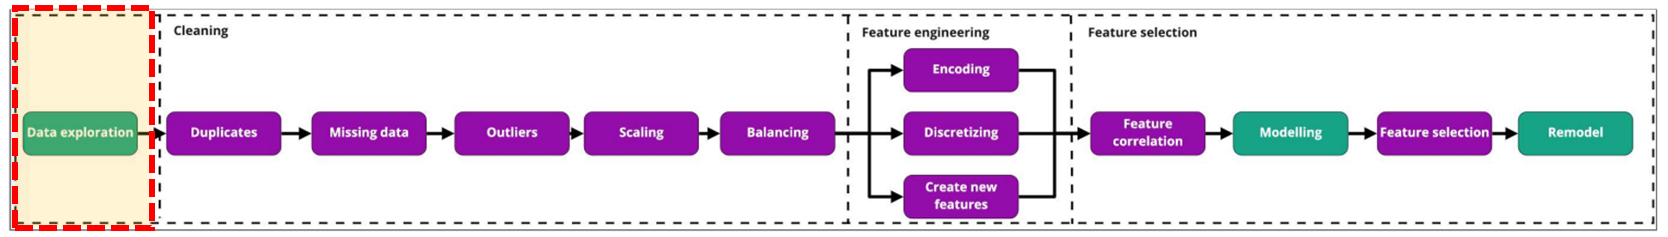


# Imports

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
# pd.options.display.max_columns = None

import pandas as pd
import numpy as np
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Models
from sklearn.model_selection import train_test_split


# Retrieve data

## Get the raw data


In [2]:
#Retrieve data
path_to_data = '../data/raw_data/'
data = pd.read_csv(path_to_data + 'train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

##  Traint test split


In [3]:
# Separating train set from test set
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

In [4]:
# Display shapes
print(f"Shape of train_set : {train_set.shape}")
print(f"Shape of test_set : {test_set.shape}")

Shape of train_set : (1022, 81)
Shape of test_set : (438, 81)


## Drop initial columns


In [5]:
#List the columns that won't be used (exemple : Id, Name, ...)
cols_to_drop = ['Id']

train_set = train_set.drop(columns=cols_to_drop)
train_set.shape

(1022, 80)

# Explore data


## Generic data

In [6]:
# Shape
train_set.shape

(1022, 80)

In [7]:
# Columns
train_set.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# Statistics
train_set.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1022.000000   832.000000    1022.000000  1022.000000  1022.000000   
mean     57.059687    70.375000   10745.437378     6.128180     5.564579   
std      42.669715    25.533607   11329.753423     1.371391     1.110557   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7564.250000     5.000000     5.000000   
50%      50.000000    70.000000    9600.000000     6.000000     5.000000   
75%      70.000000    80.000000   11692.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1022.000000   1022.000000  1019.000000  1022.000000  1022.000000  ...   
mean   1970.995108   1984.757339   105.261040   446.176125    42.368885  ...   
std      30.748816     20.747109   172.707705   459.971174   151.210531  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1953.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1994.000000     0.000000   390.000000     0.000000  ...   
75%    2001.000000   2004.000000   170.000000   724.000000     0.000000  ...   
max    2010.000000   2010.000000  1378.000000  5644.000000  1127.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1022.000000  1022.000000    1022.000000  1022.000000  1022.000000   
mean     97.548924    49.525440      21.303327     3.881605    15.565558   
std     131.691873    69.205968      61.534380    32.547722    56.445749   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    27.000000       0.000000     0.000000     0.000000   
75%     170.500000    73.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea      MiscVal       MoSold       YrSold      SalePrice  
count  1022.000000  1022.000000  1022.000000  1022.000000    1022.000000  
mean      2.743640    41.565558     6.363992  2007.814090  181312.692759  
std      39.671531   338.132358     2.650115     1.325807   77617.461005  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  130000.000000  
50%       0.000000     0.000000     6.000000  2008.000000  165000.000000  
75%       0.000000     0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  8300.000000    12.000000  2010.000000  745000.000000  

[8 rows x 37 columns]

In [9]:
# Data info
# train_set.info()

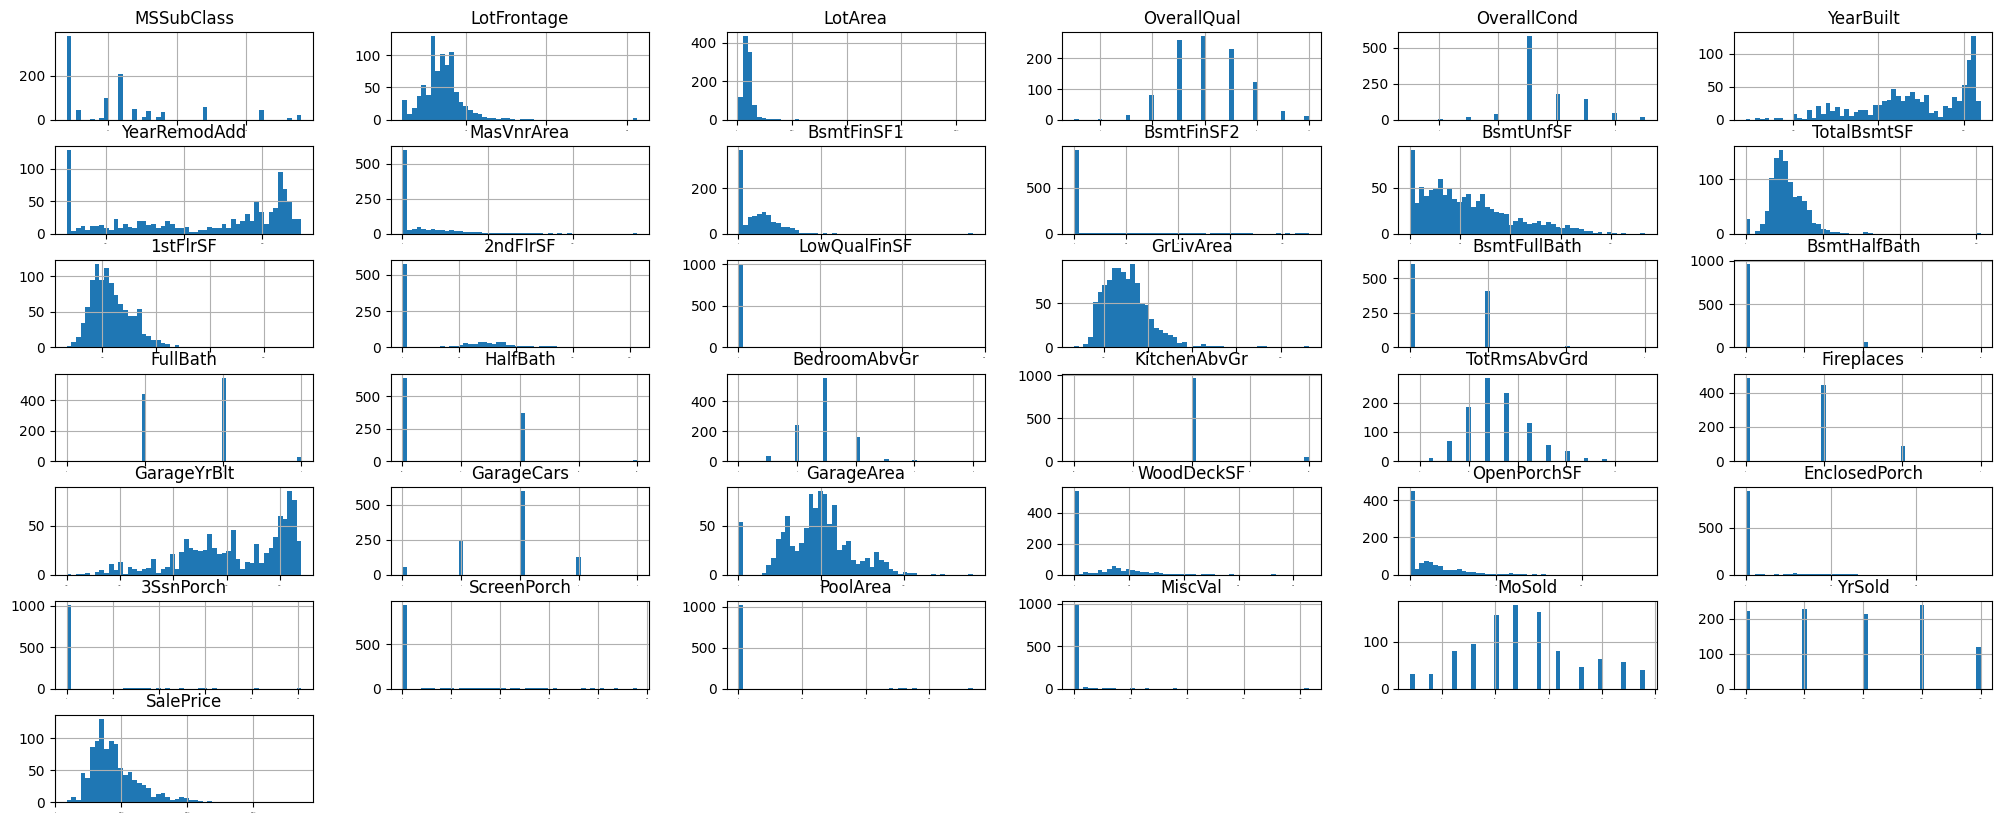

In [10]:
# Data histograms
train_set.hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()

## Visualization : Column histograms


<span style="font-family:Comic Sans MS; color:red">Input target name here : </span>



In [11]:
# Defining the target name
target_name = 'SalePrice'

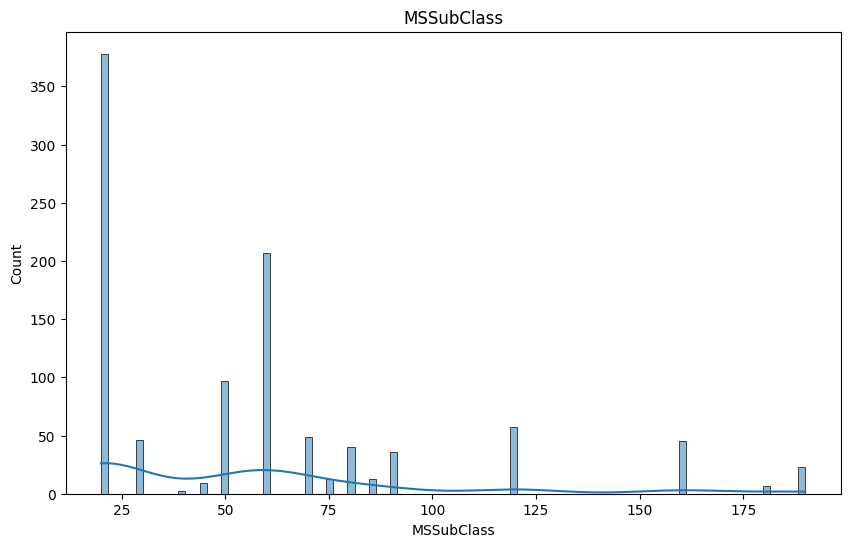

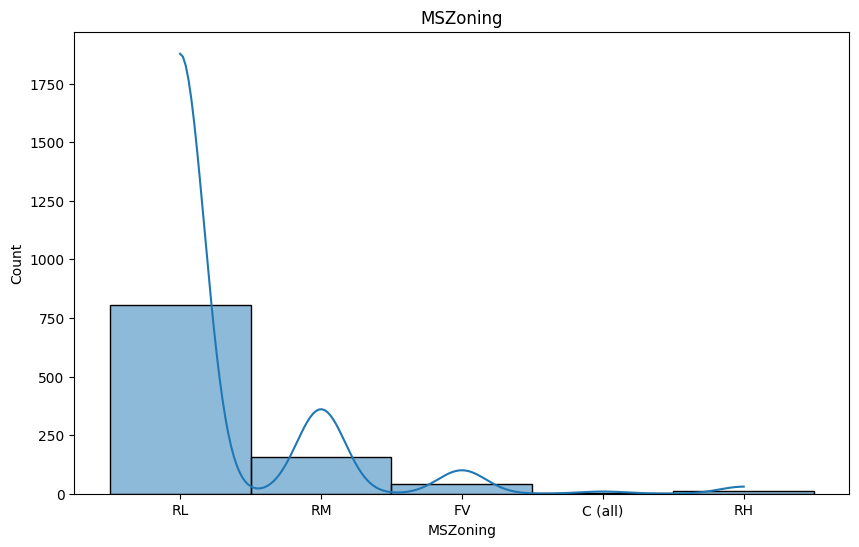

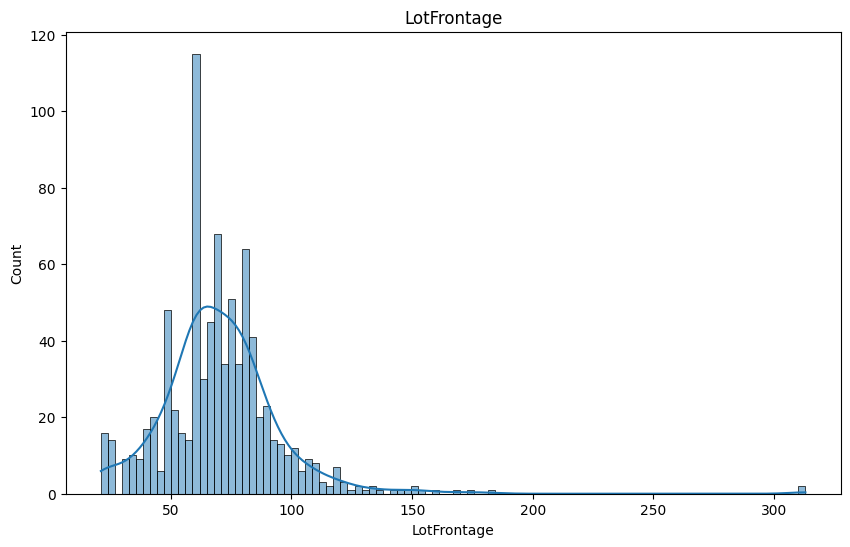

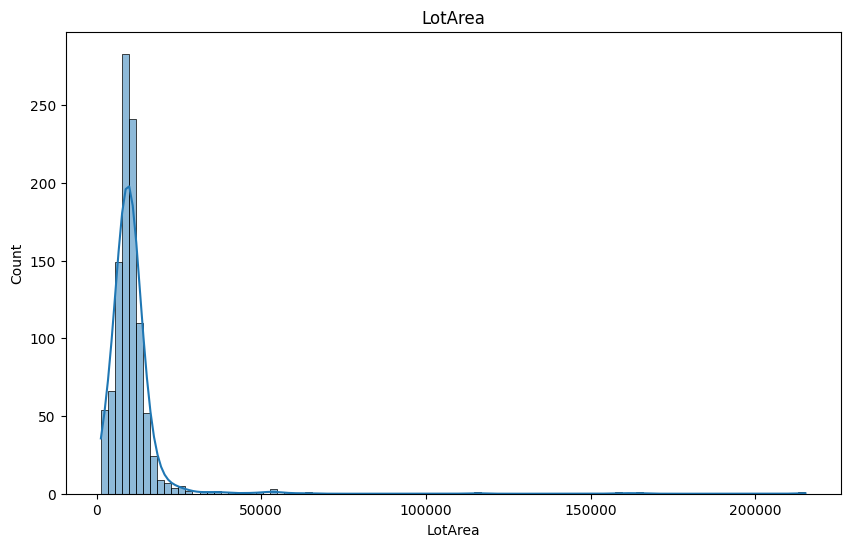

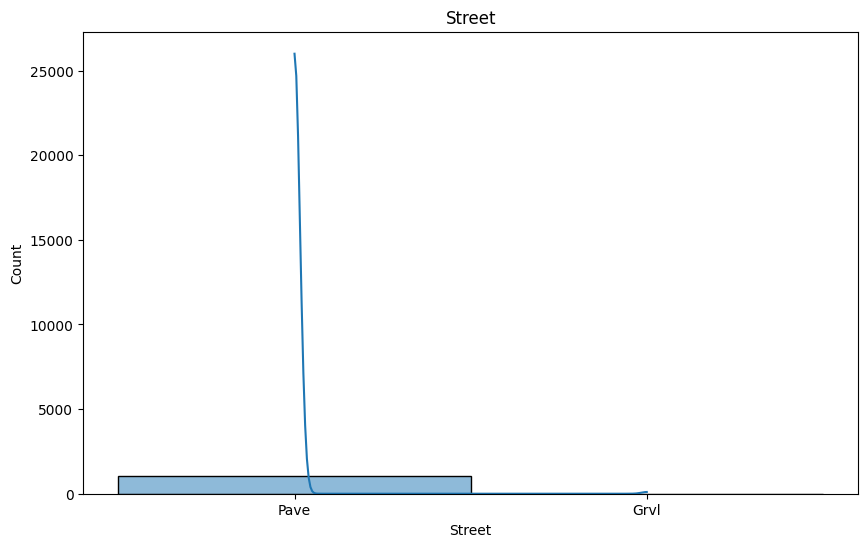

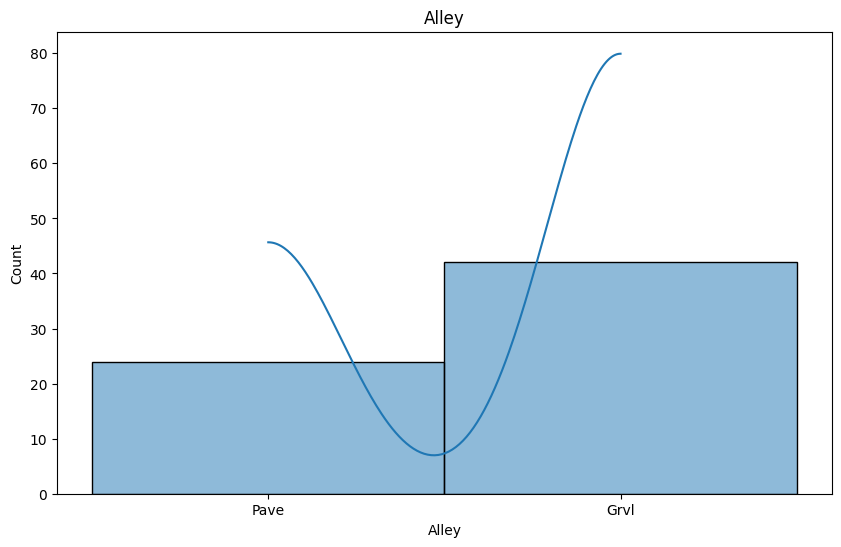

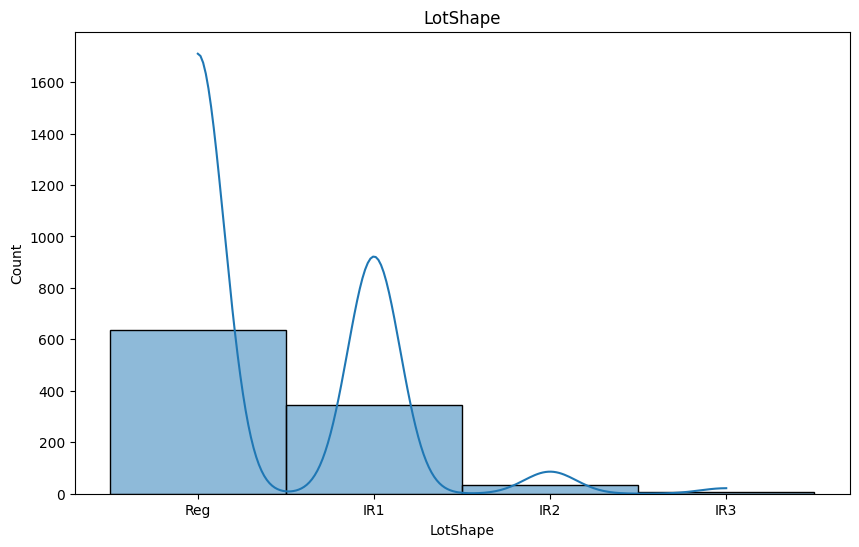

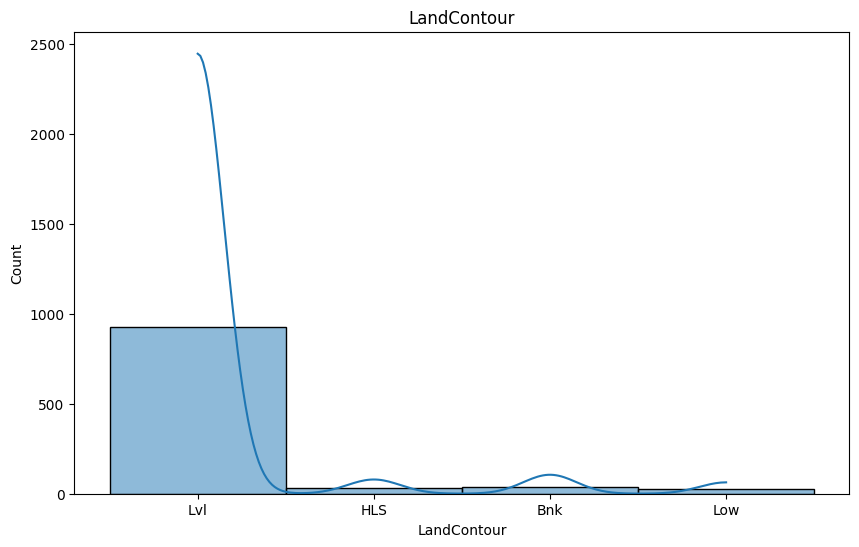

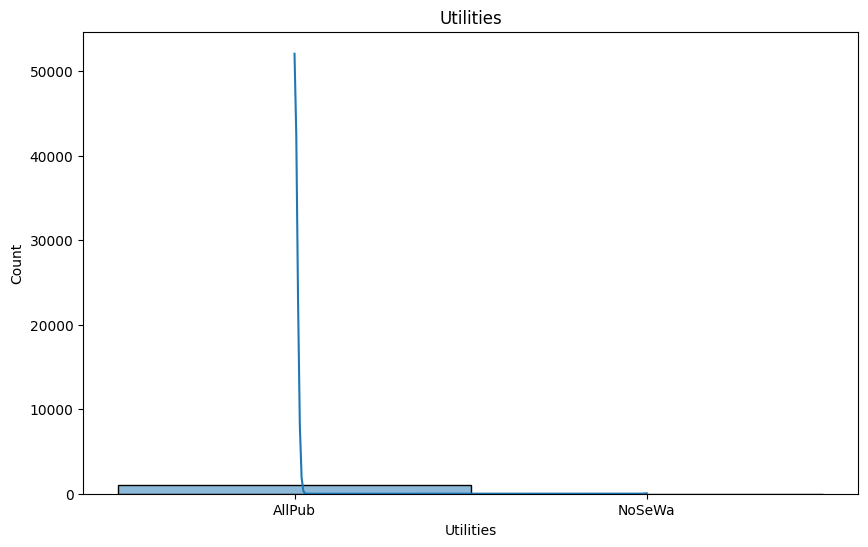

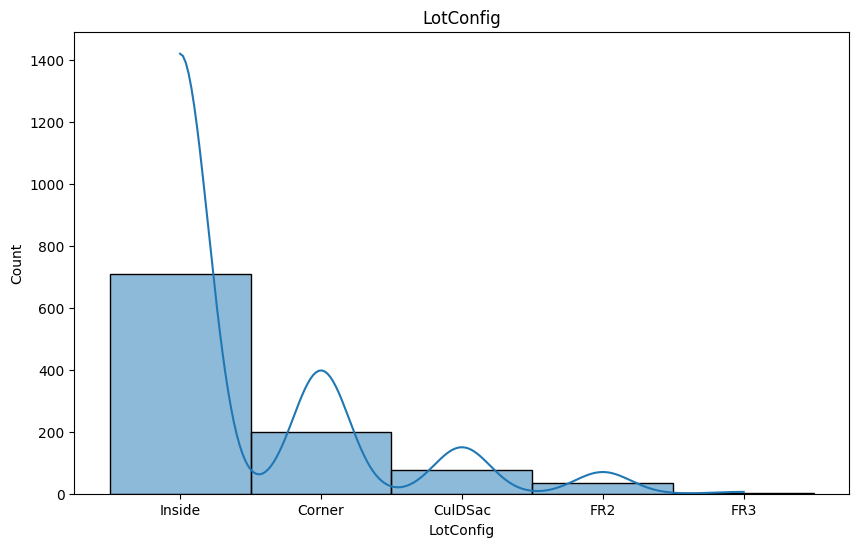

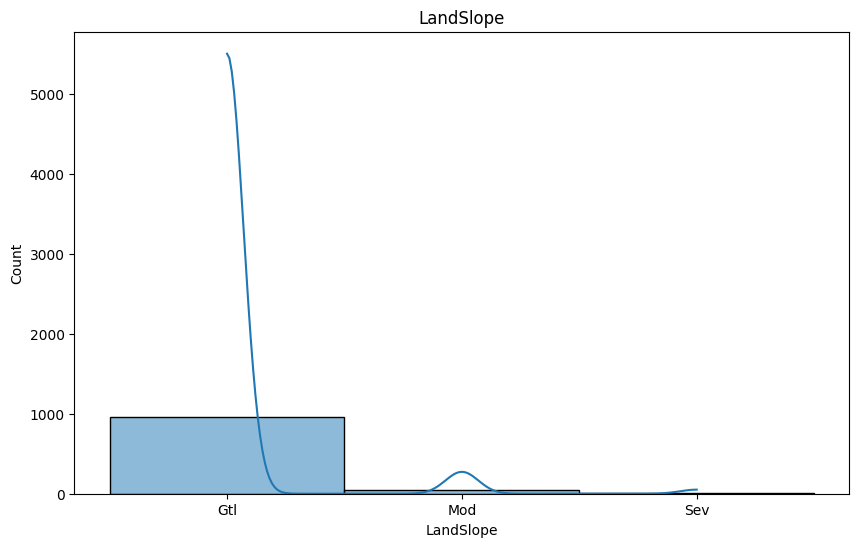

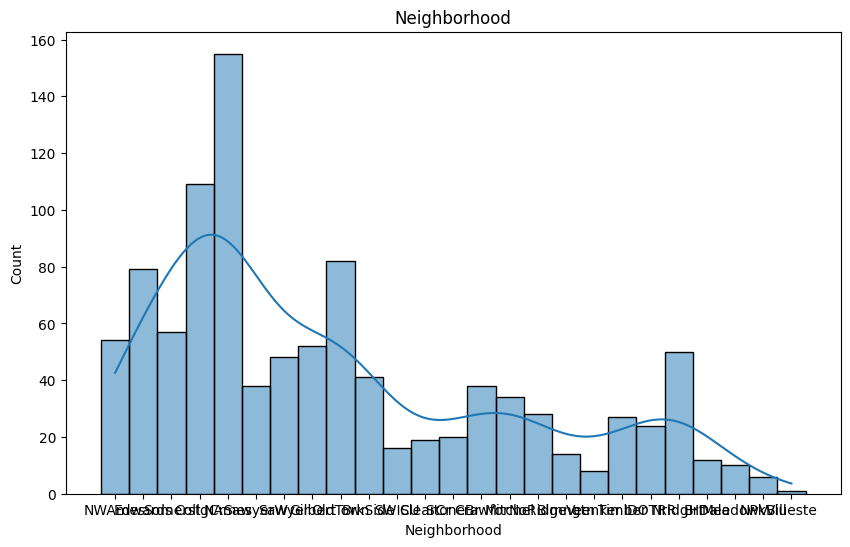

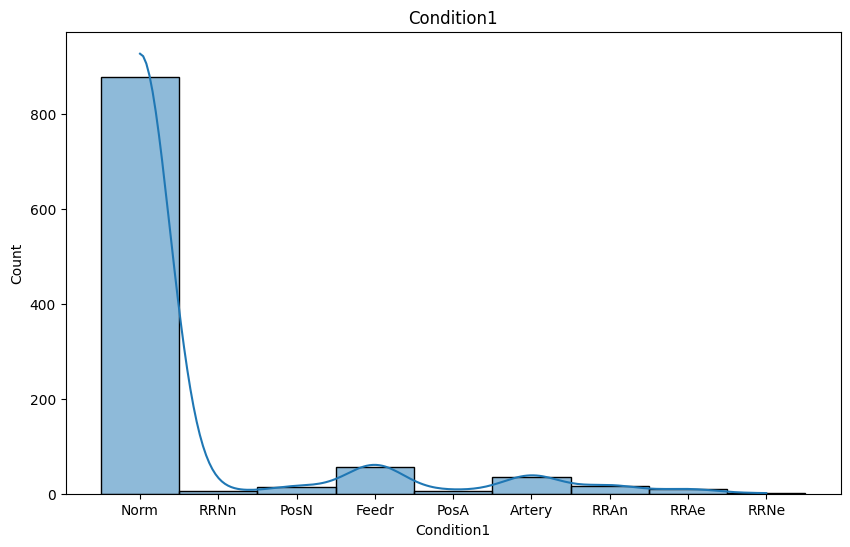

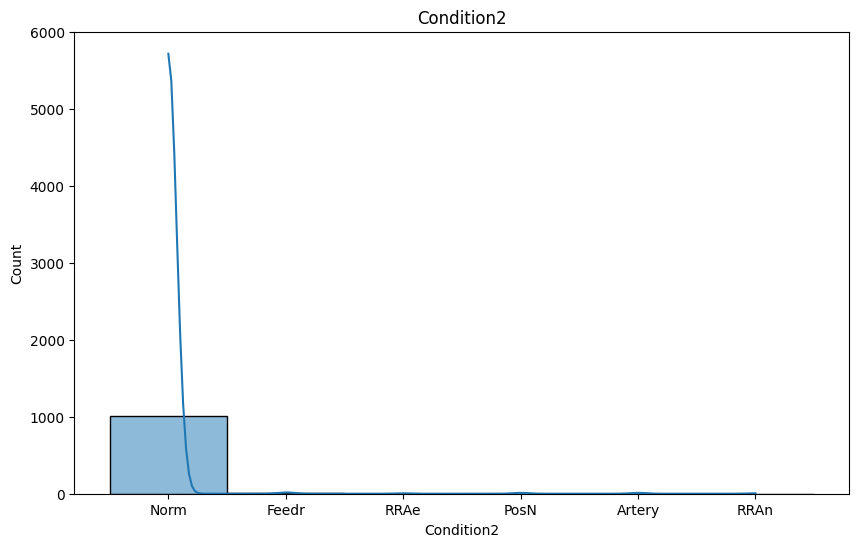

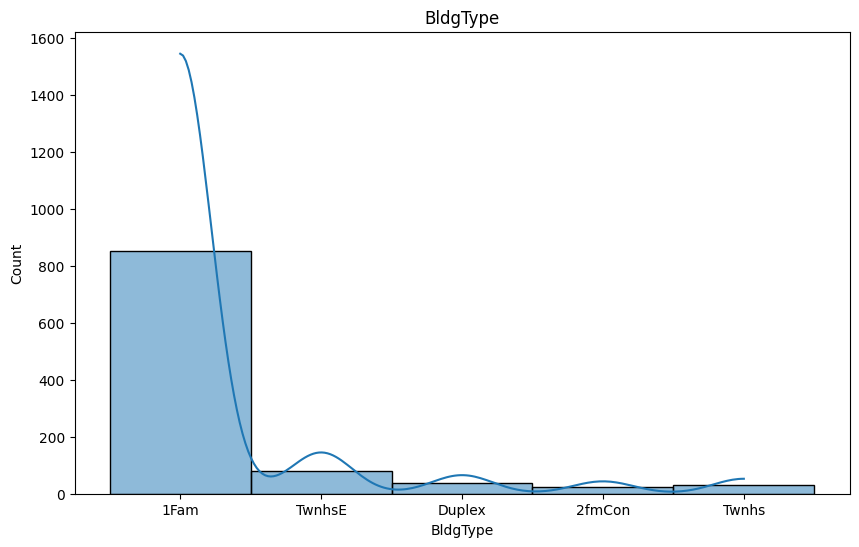

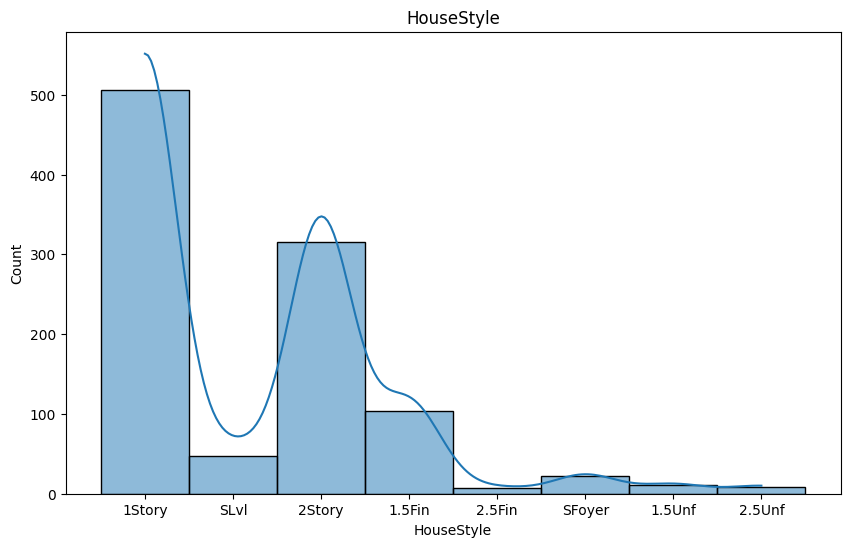

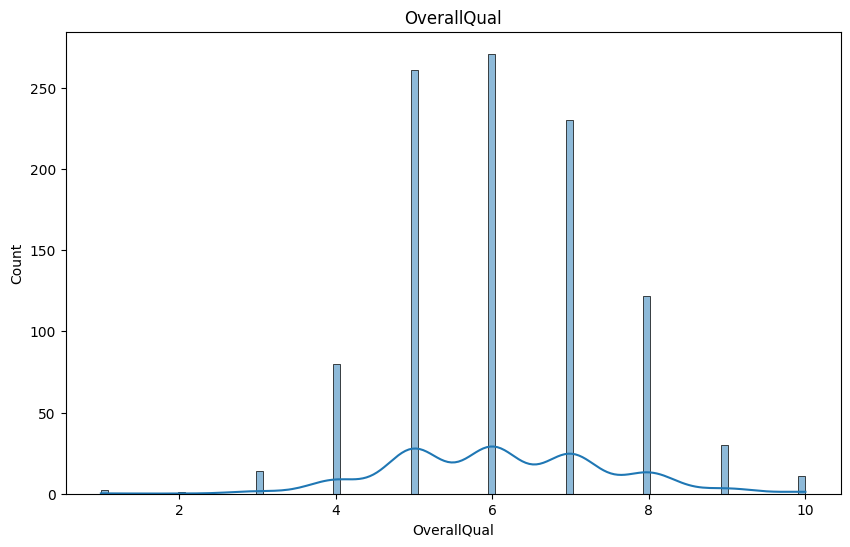

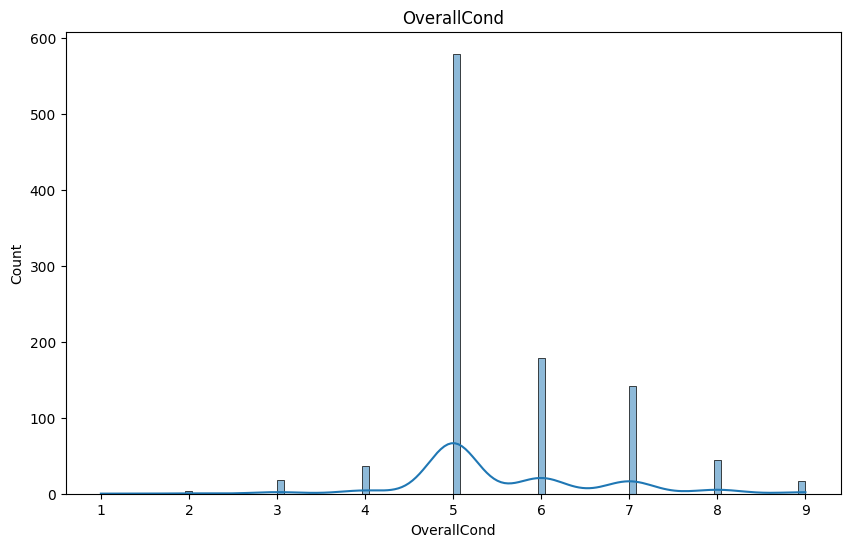

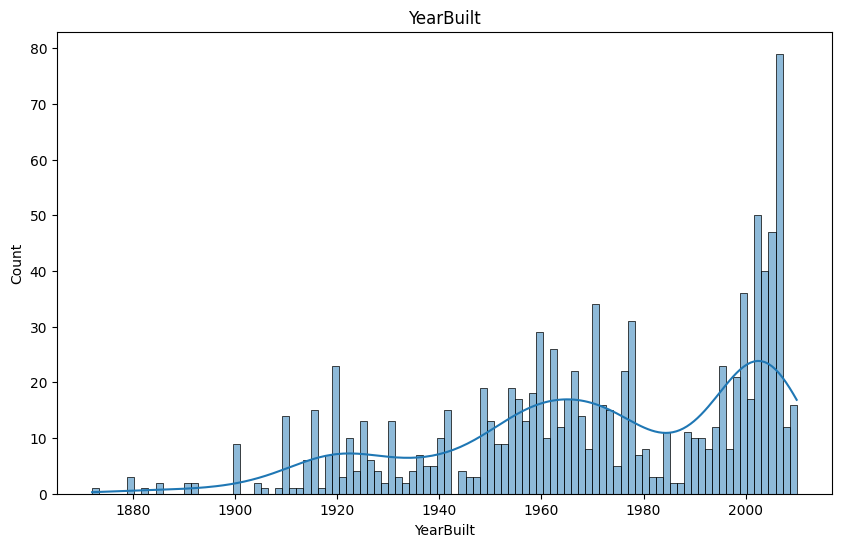

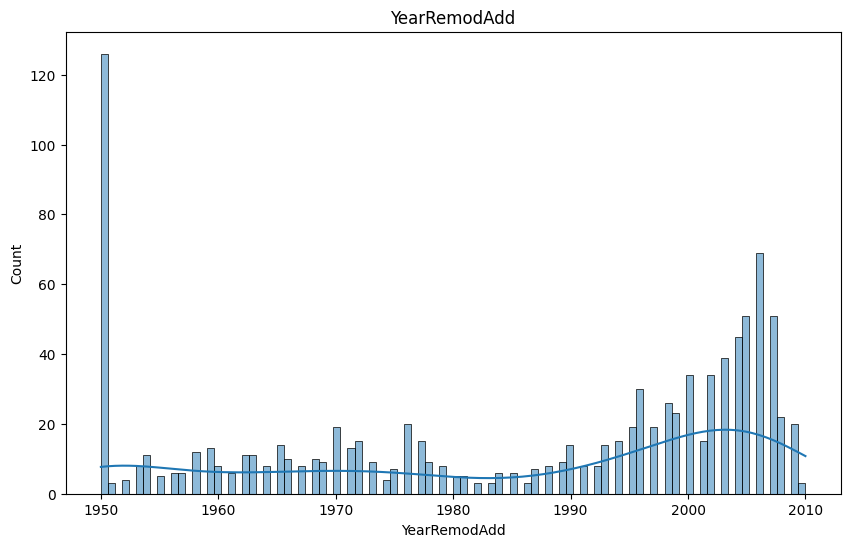

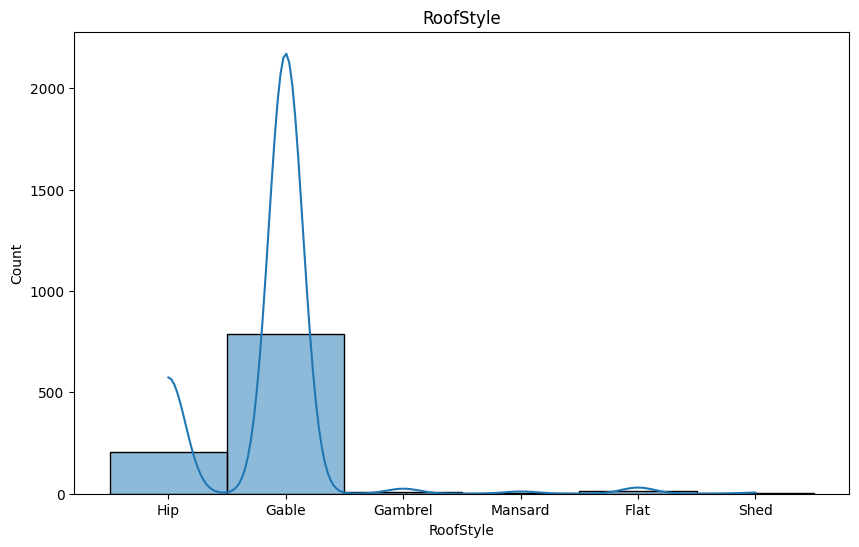

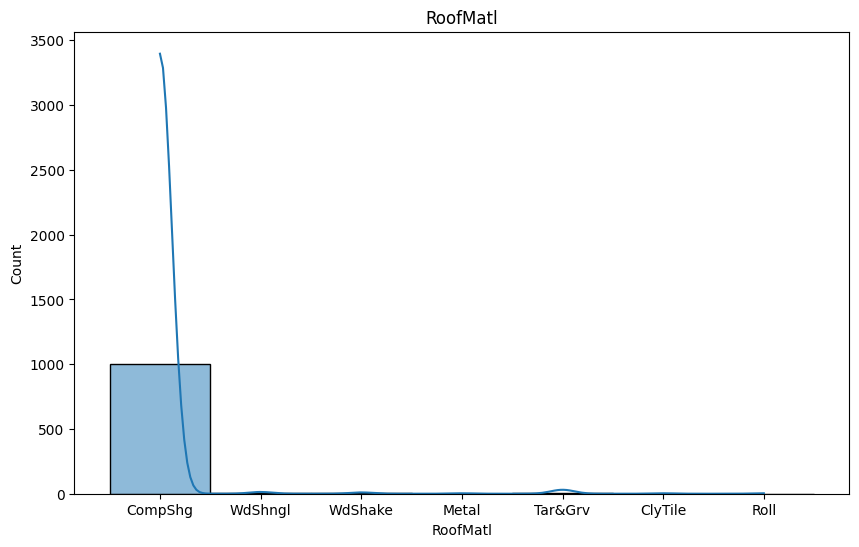

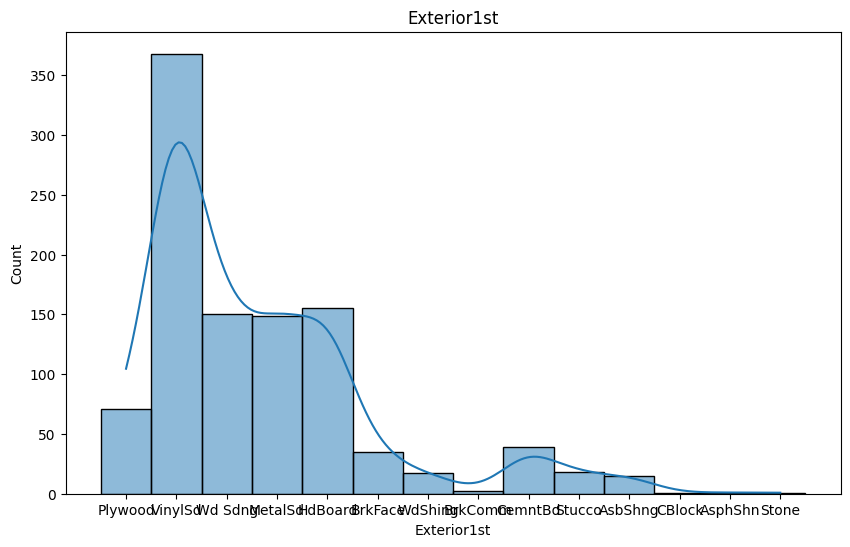

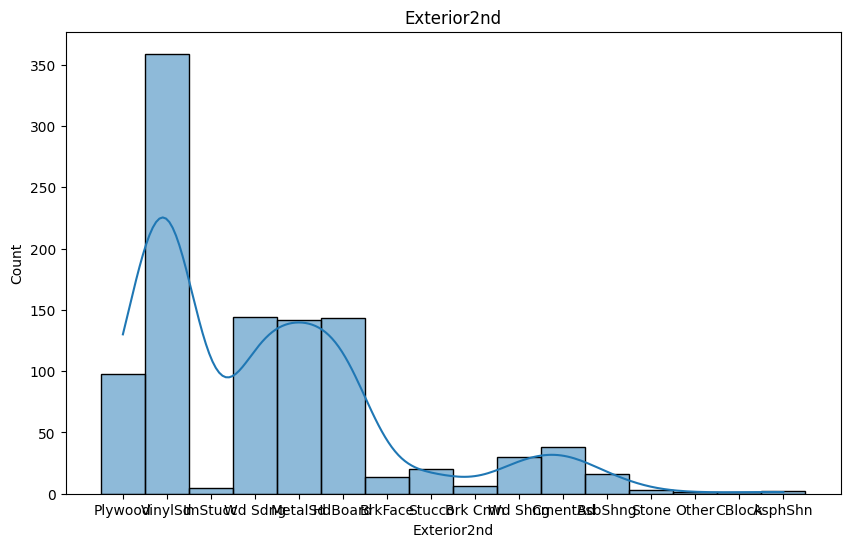

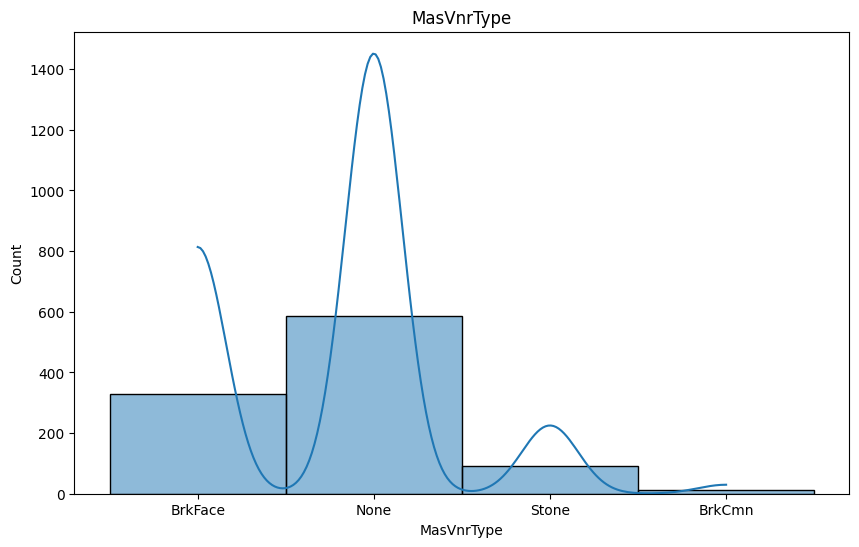

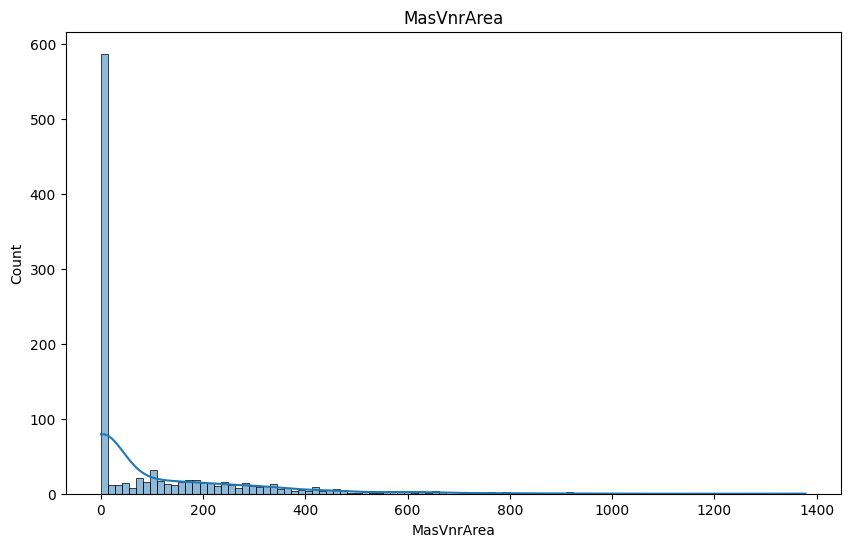

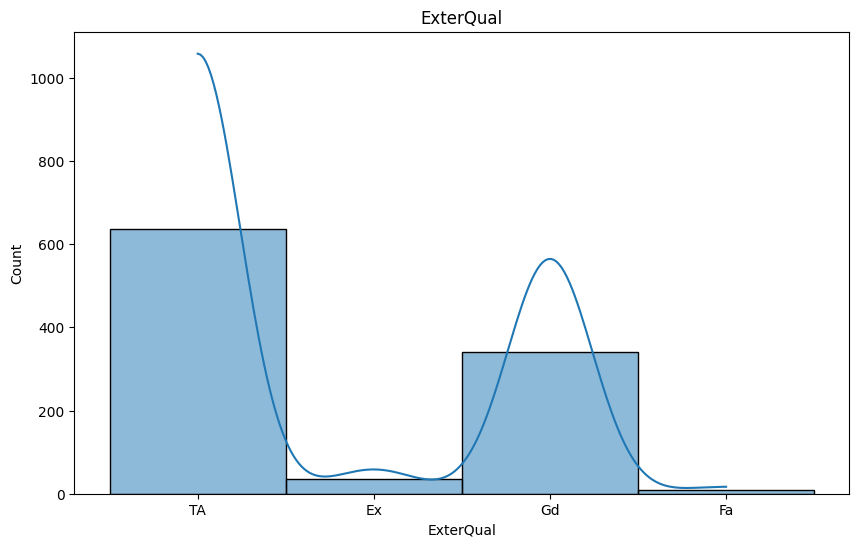

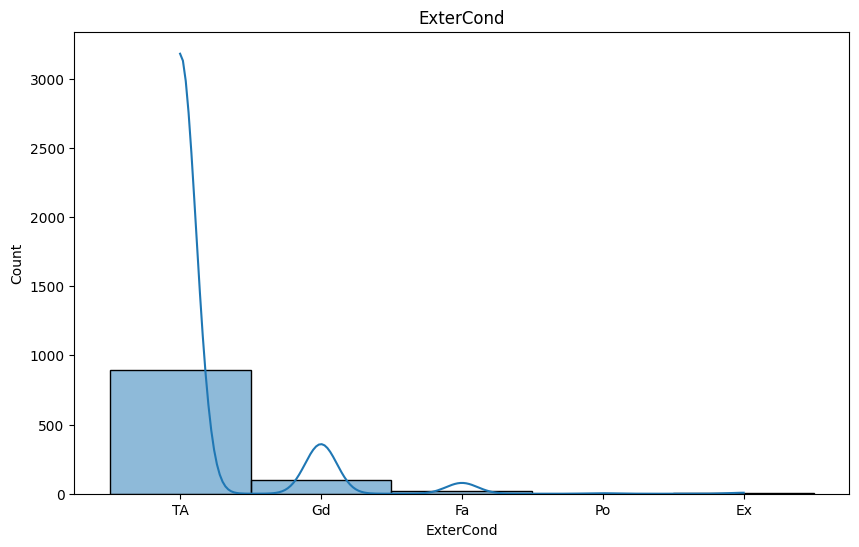

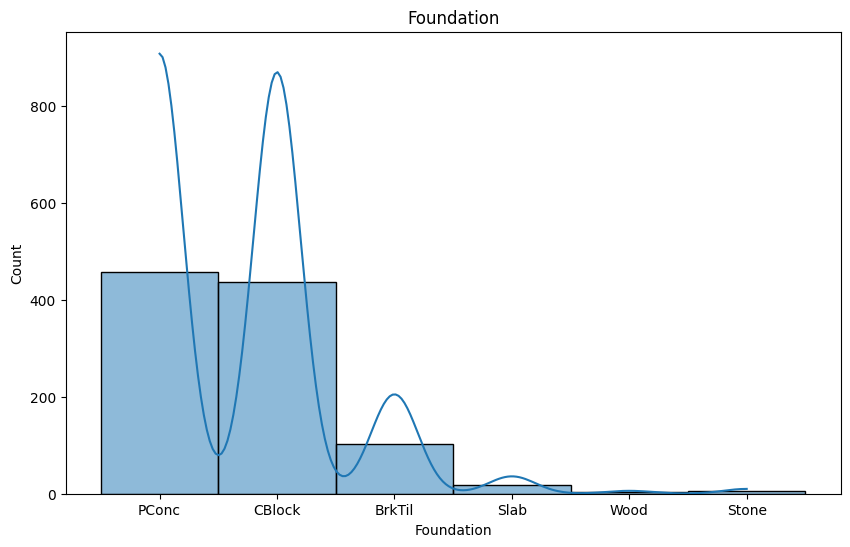

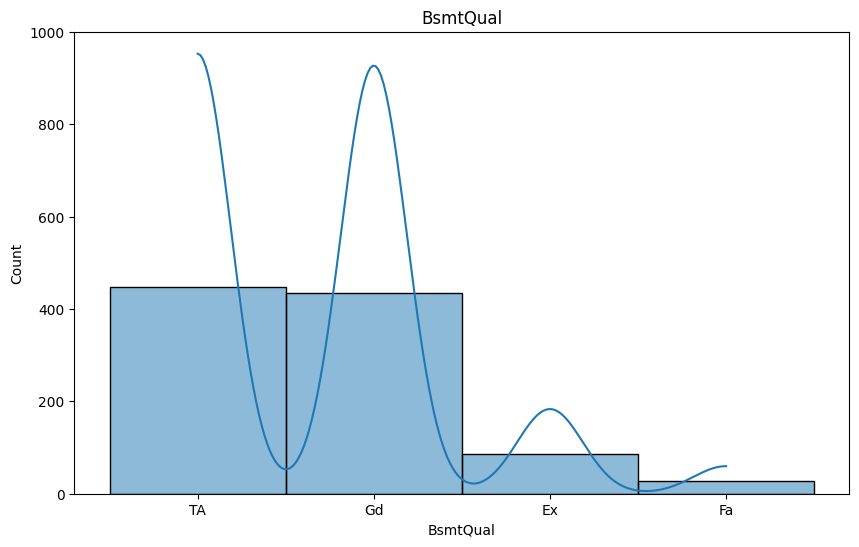

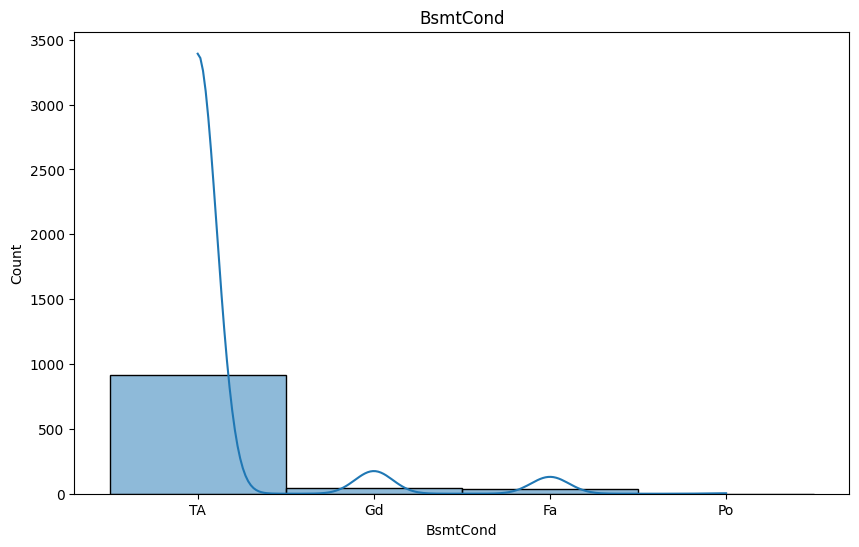

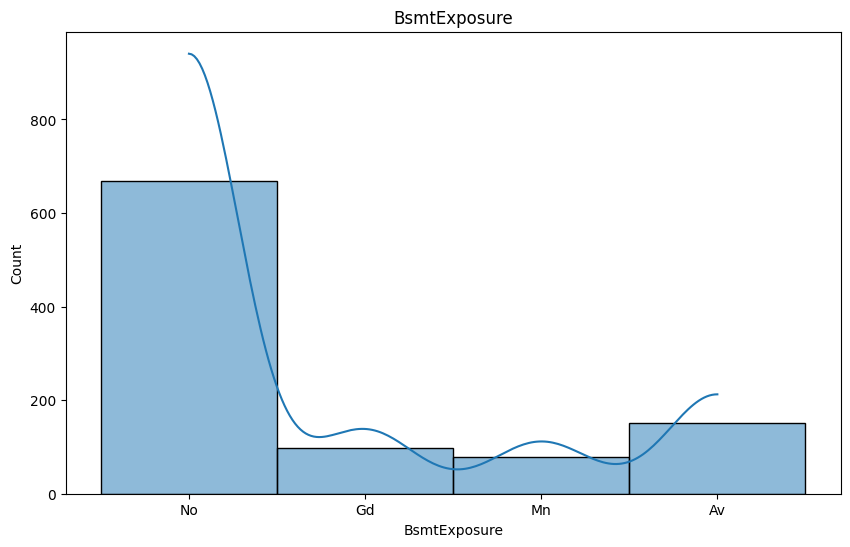

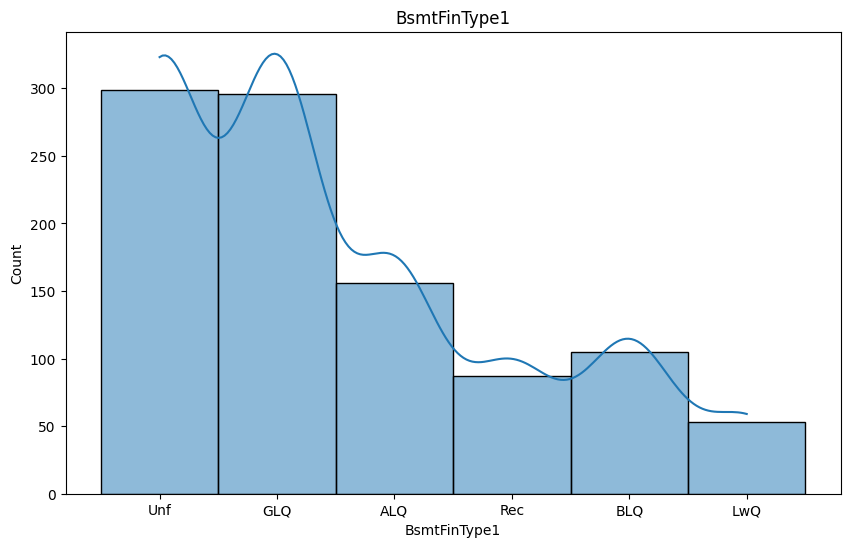

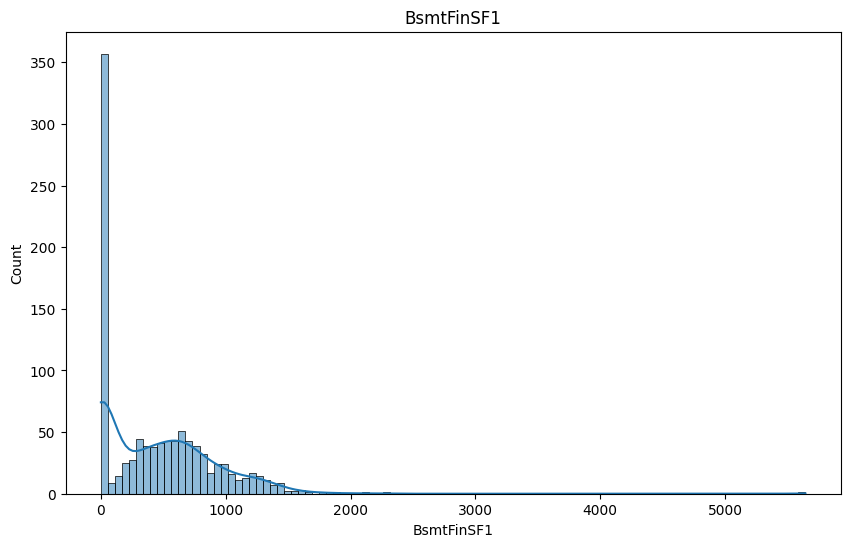

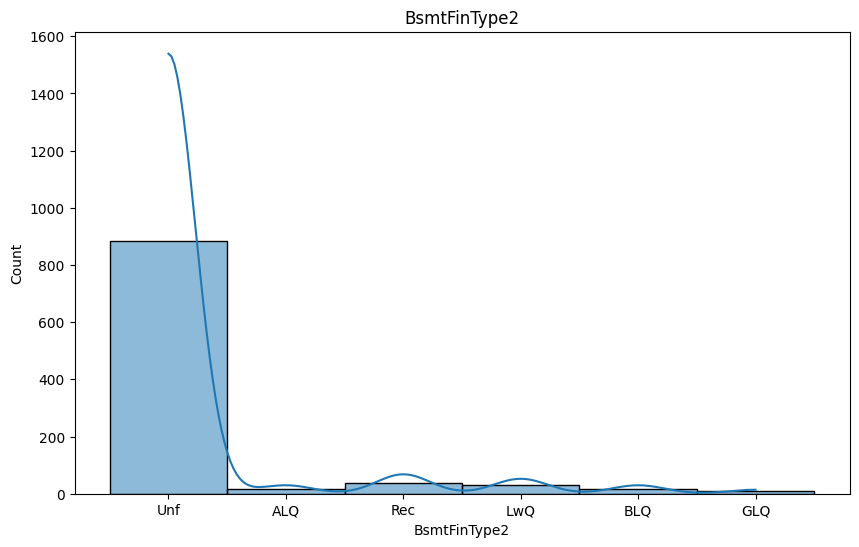

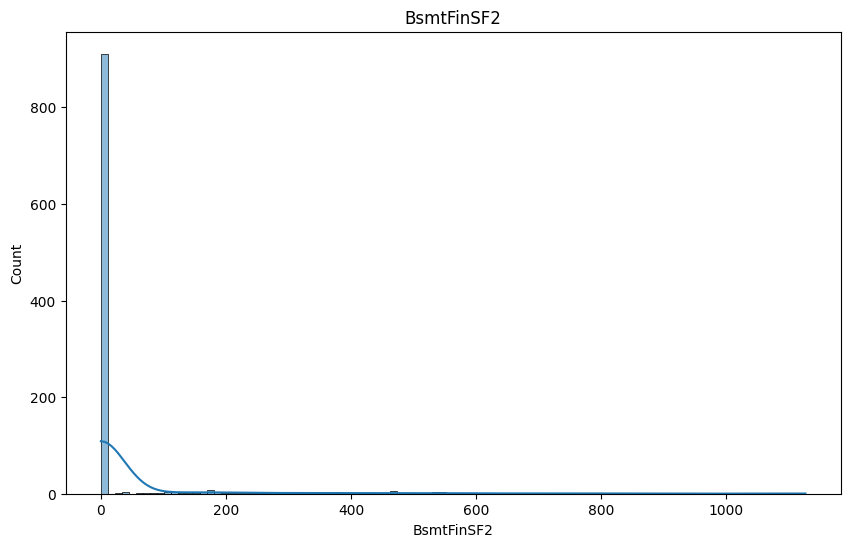

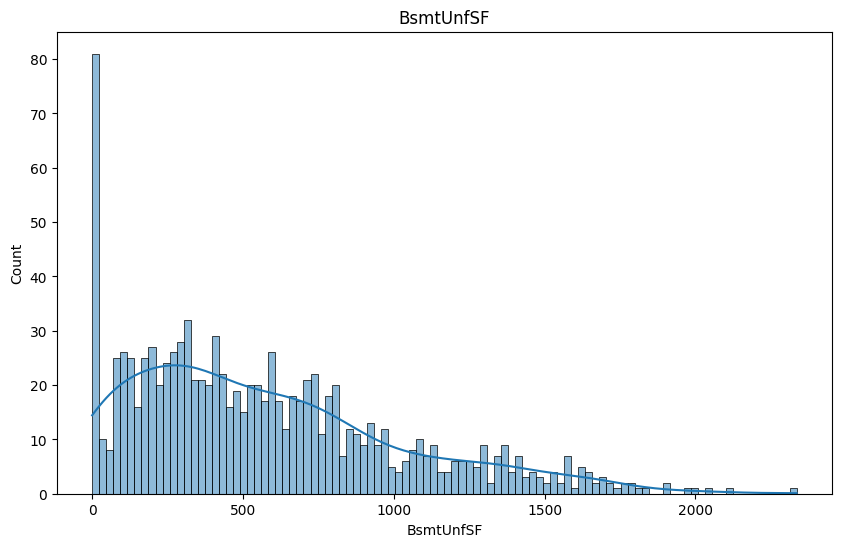

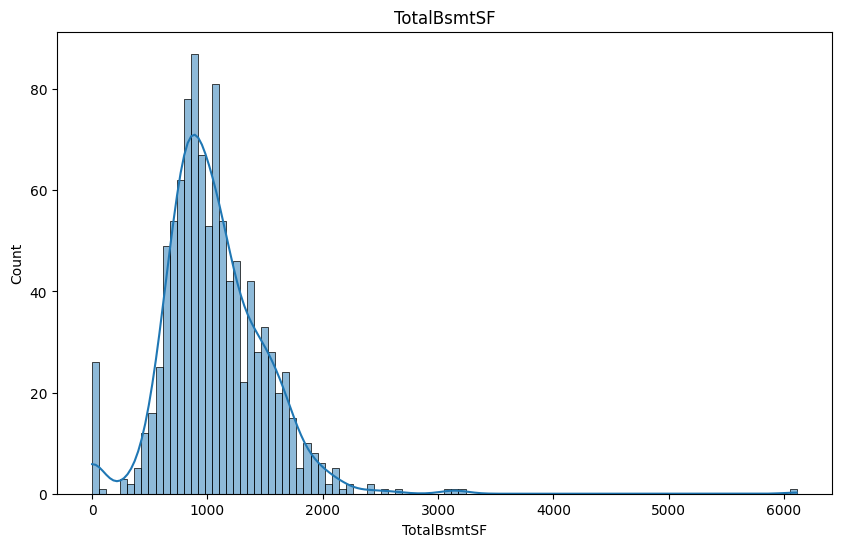

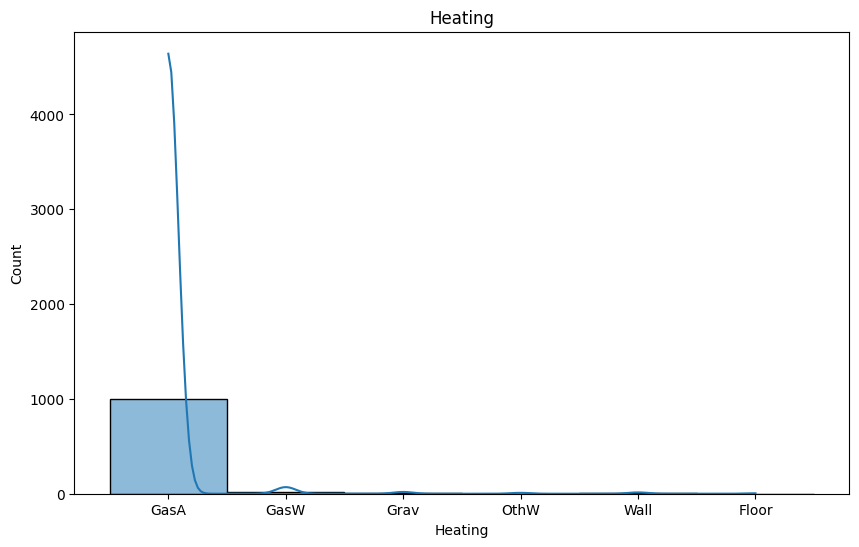

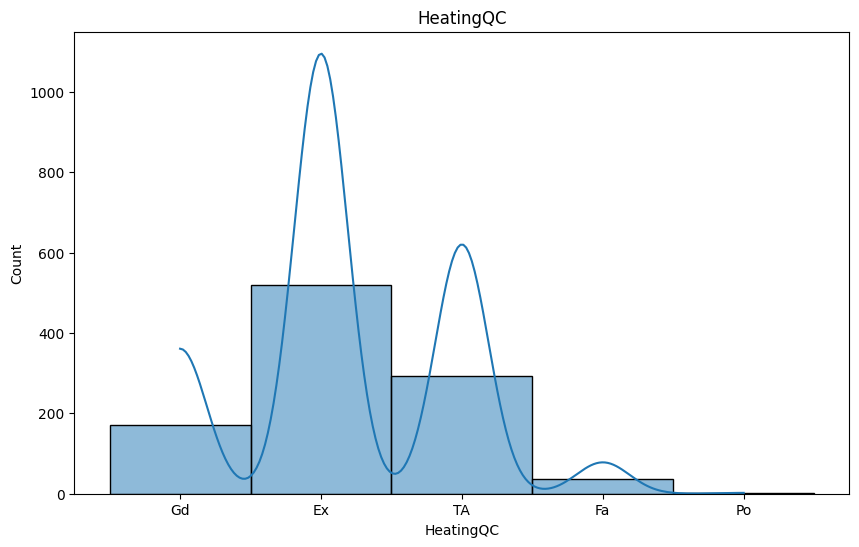

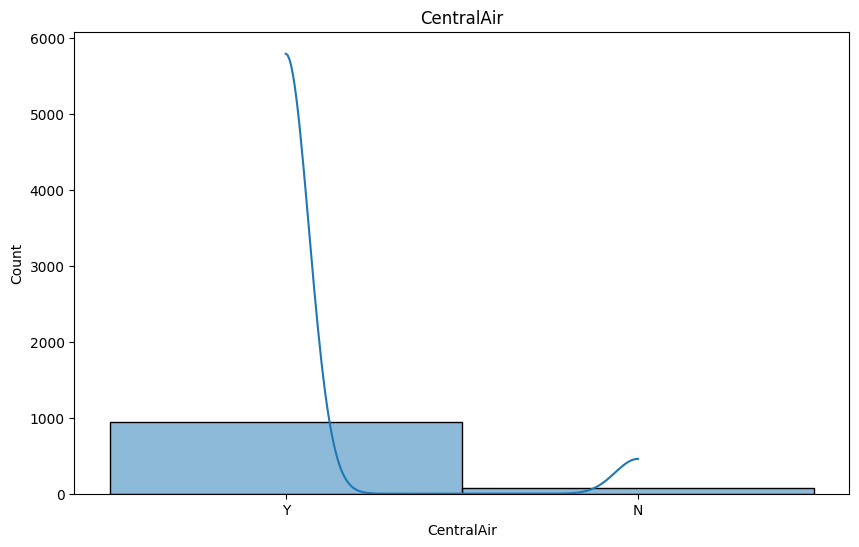

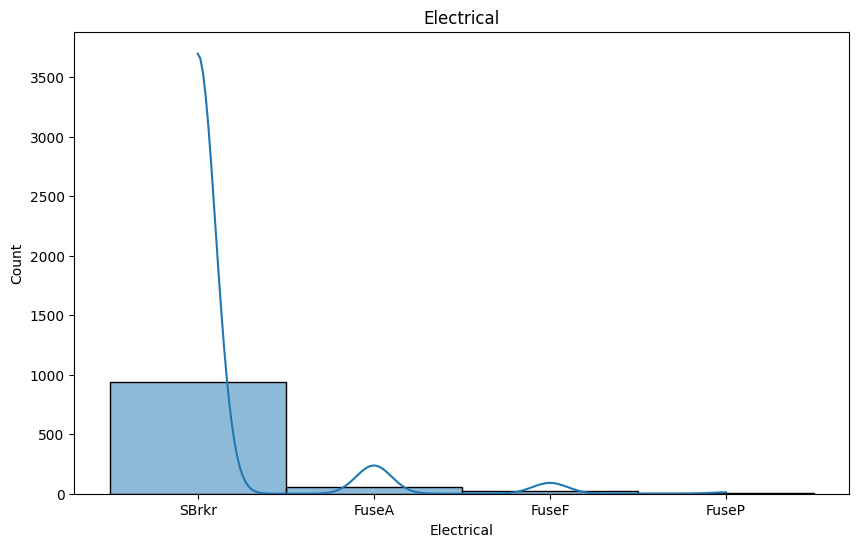

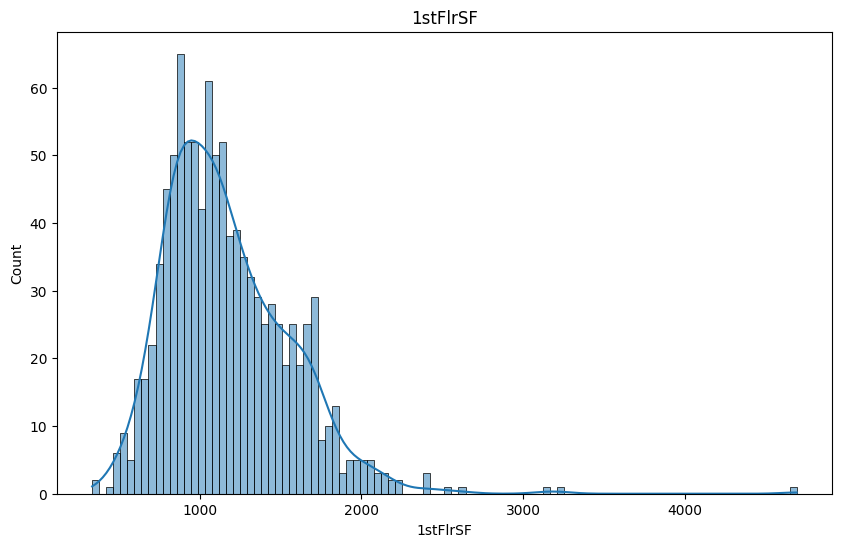

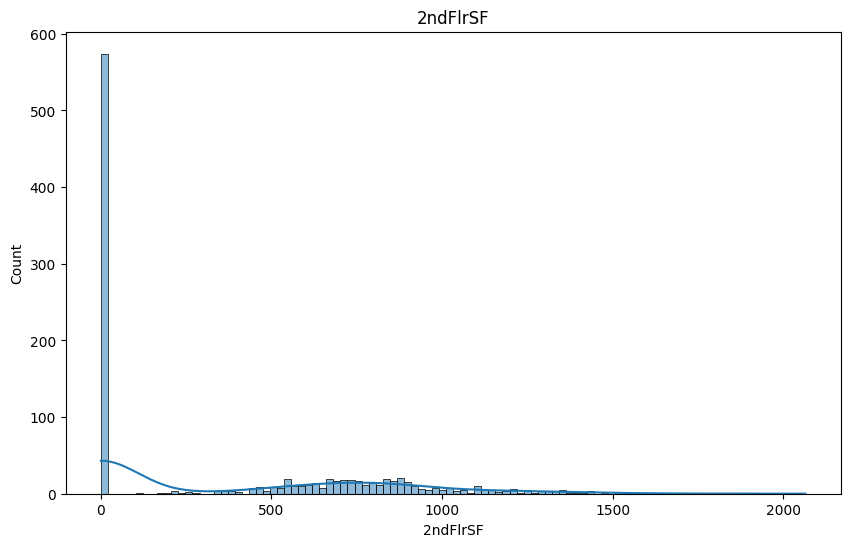

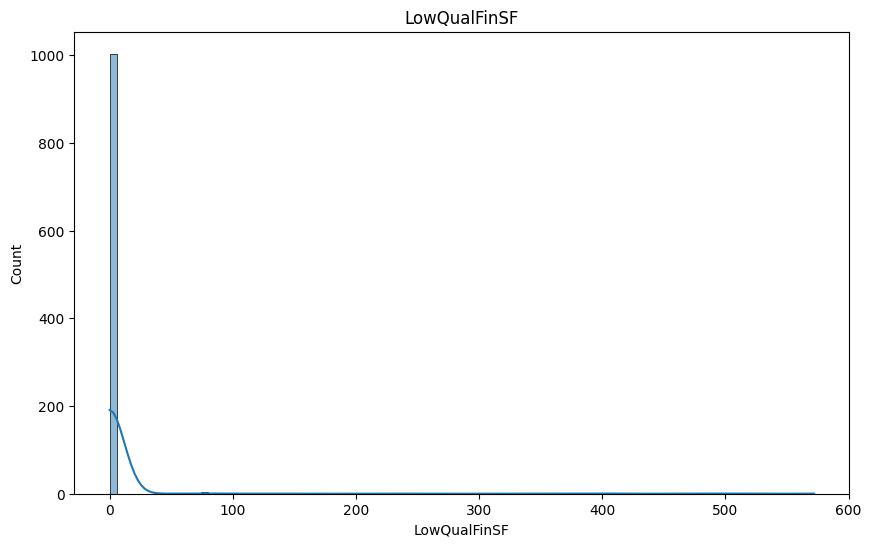

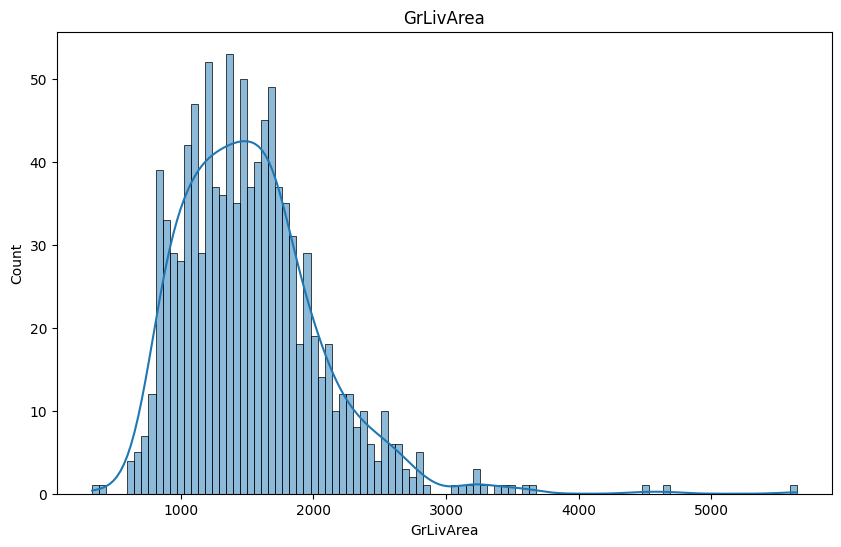

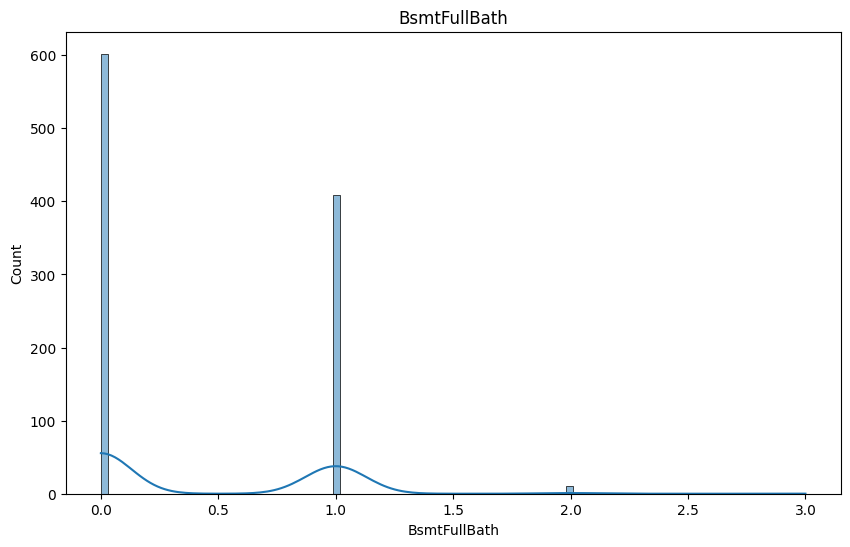

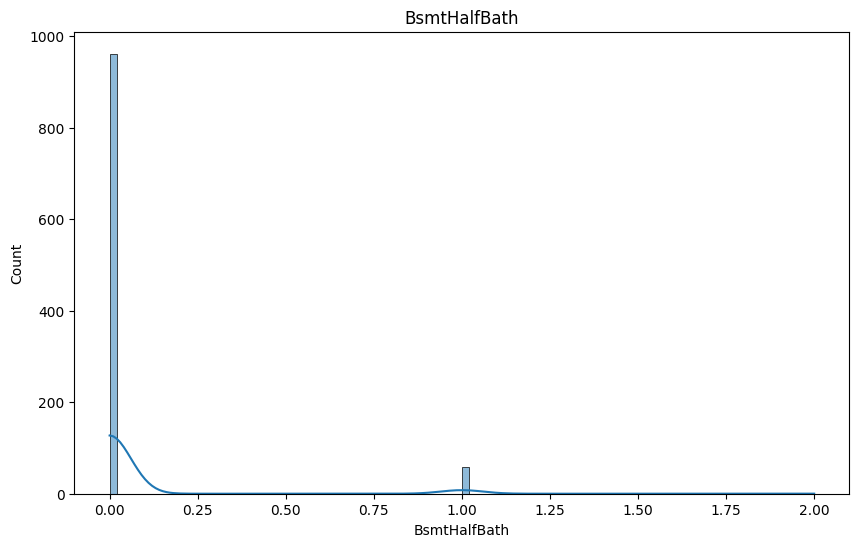

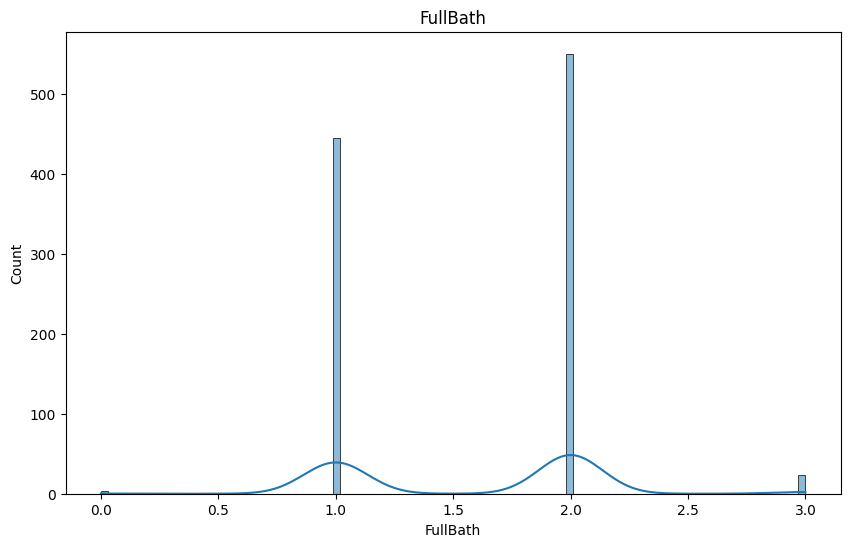

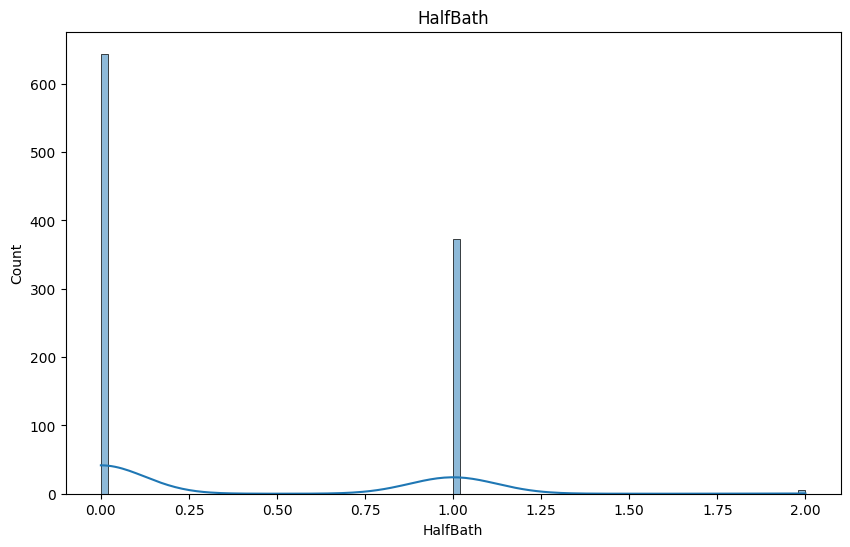

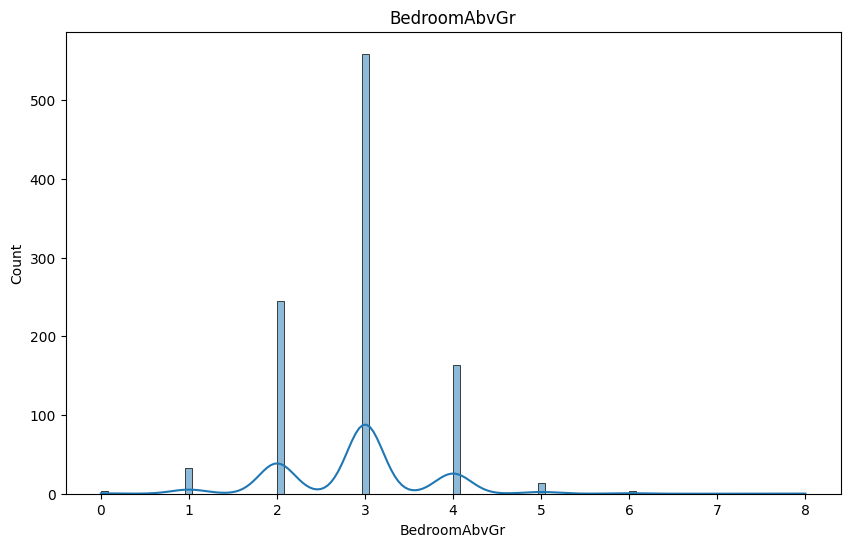

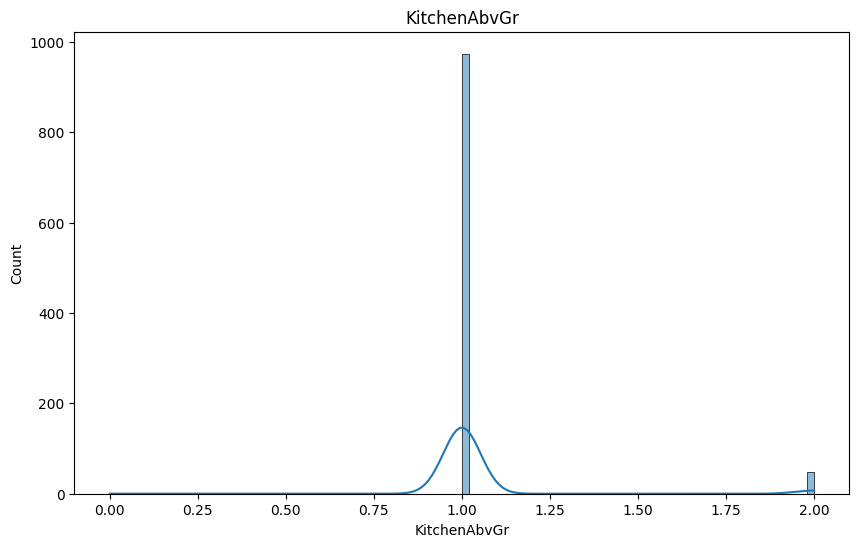

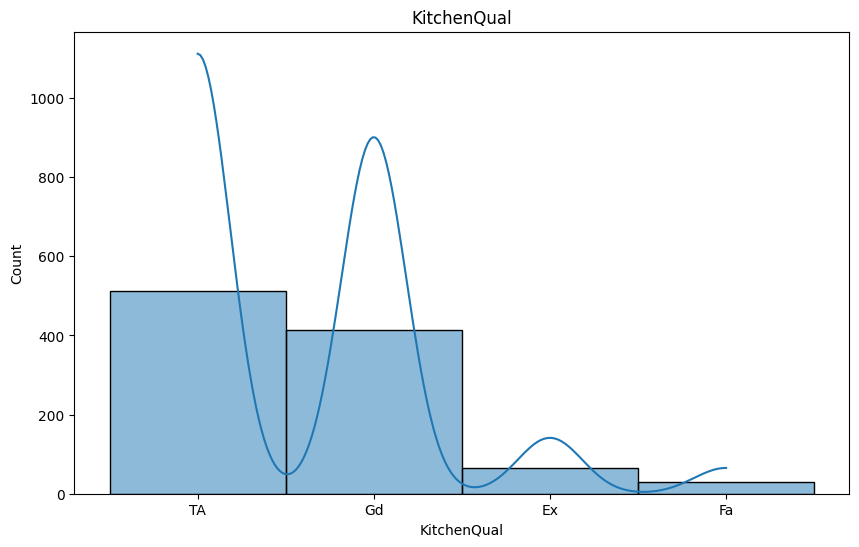

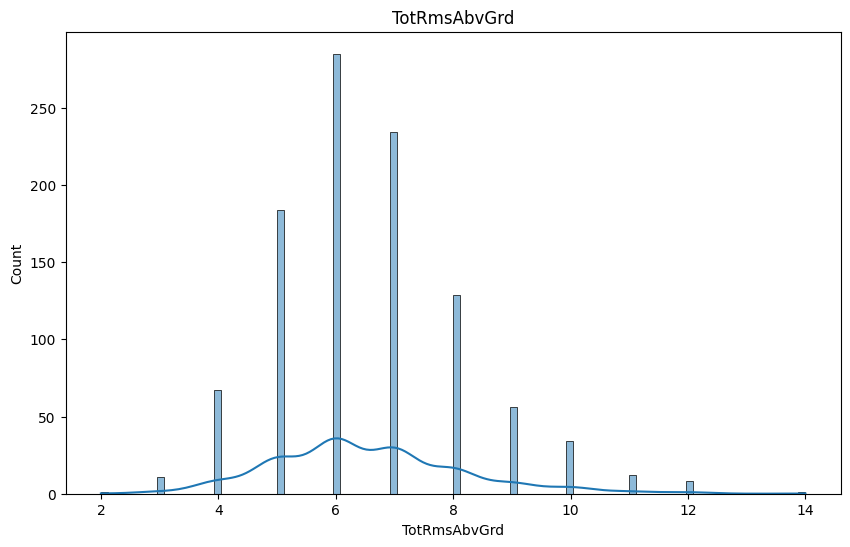

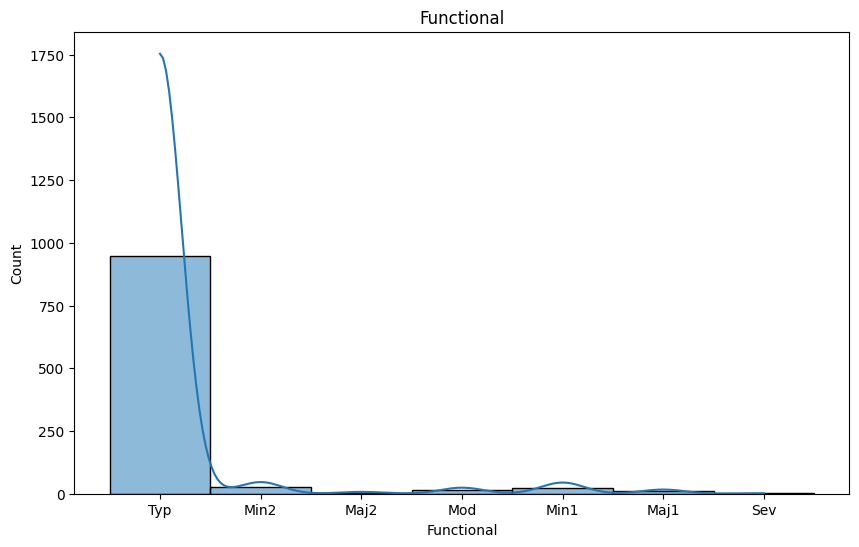

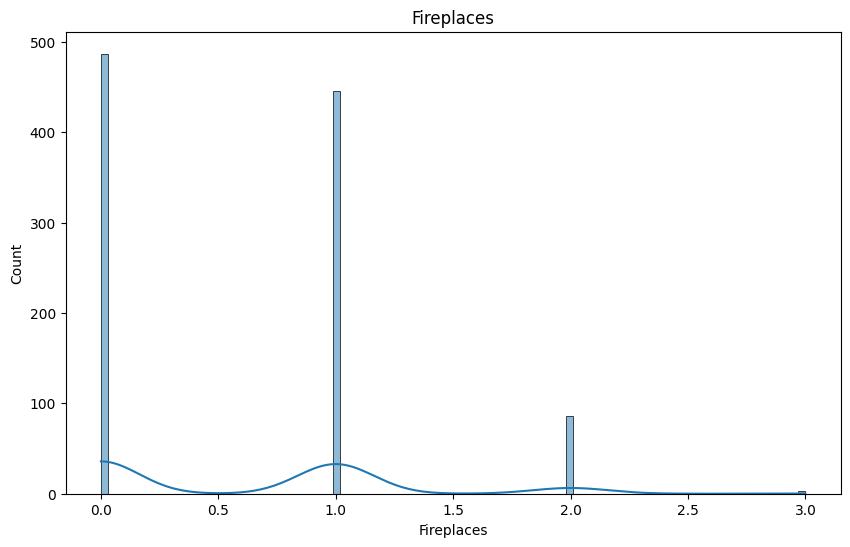

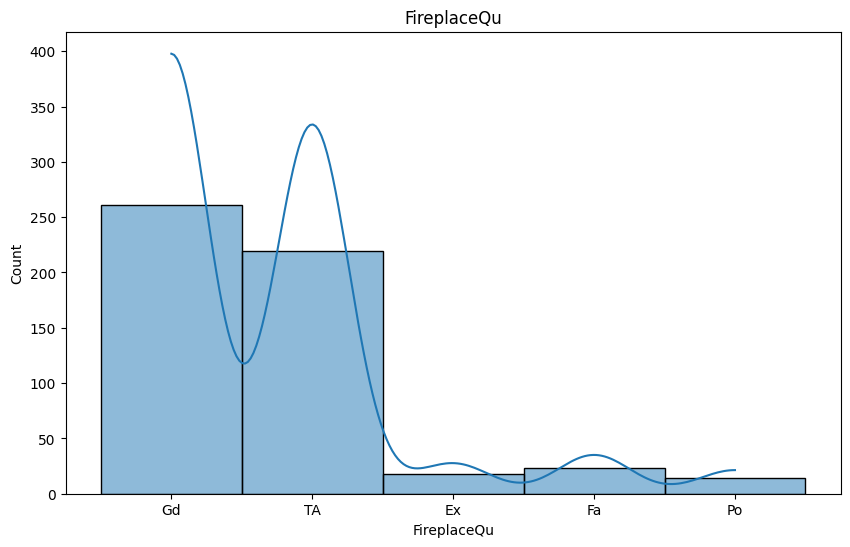

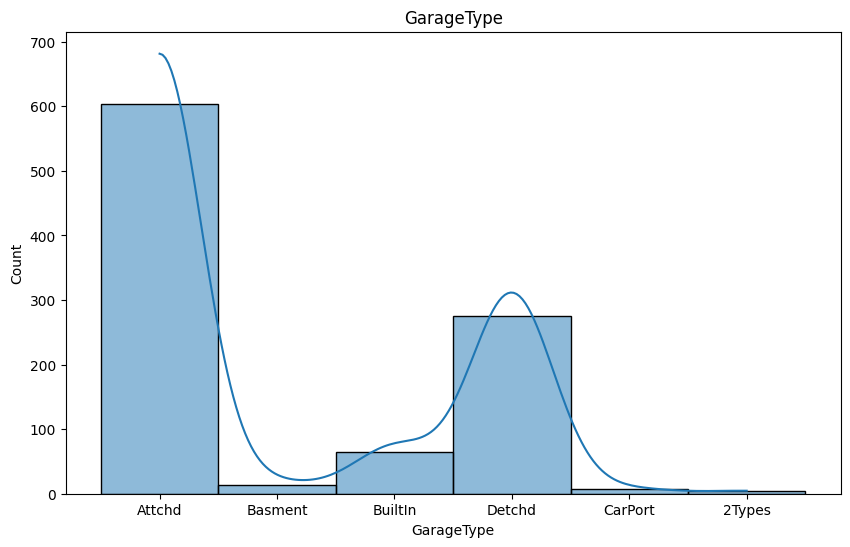

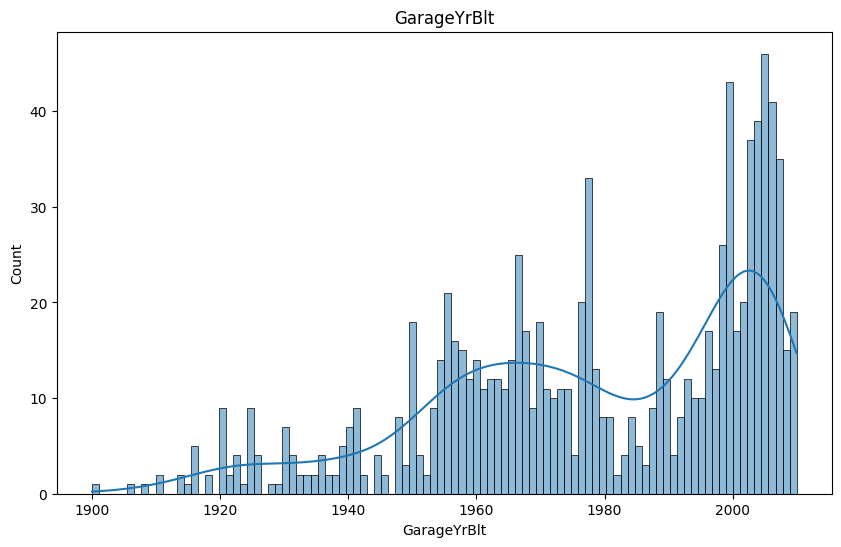

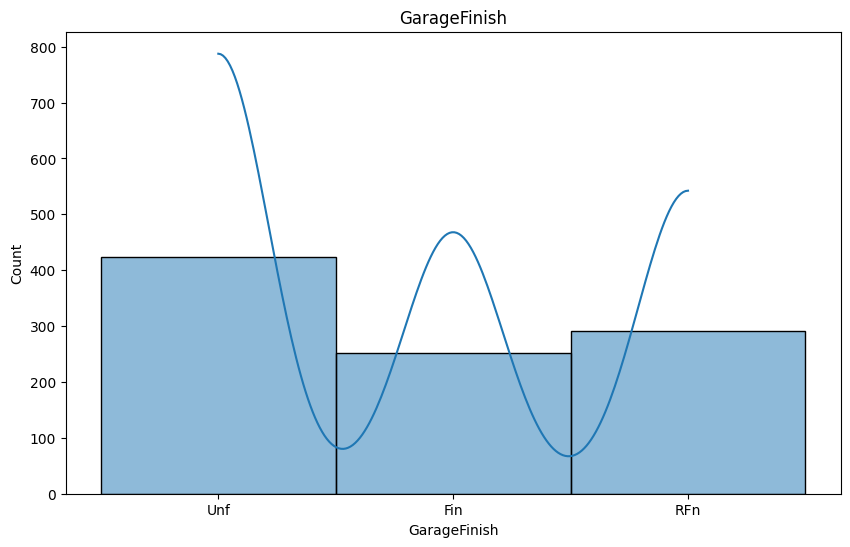

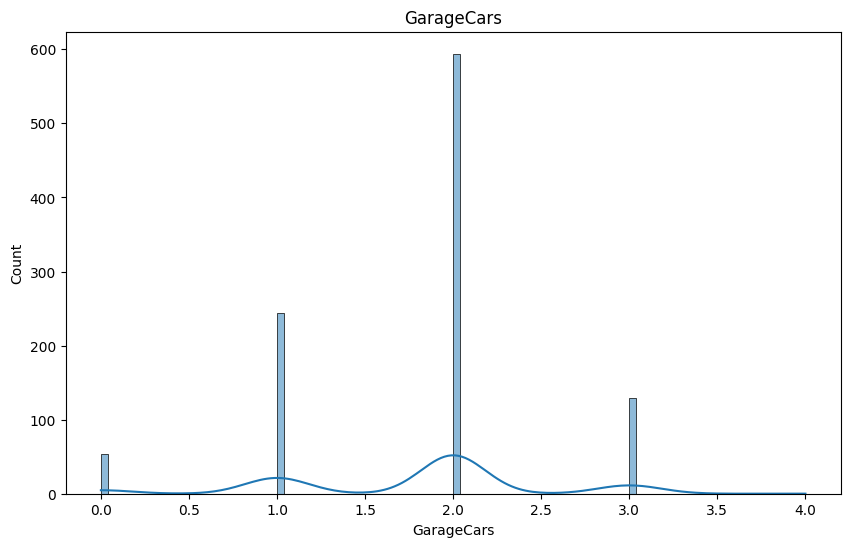

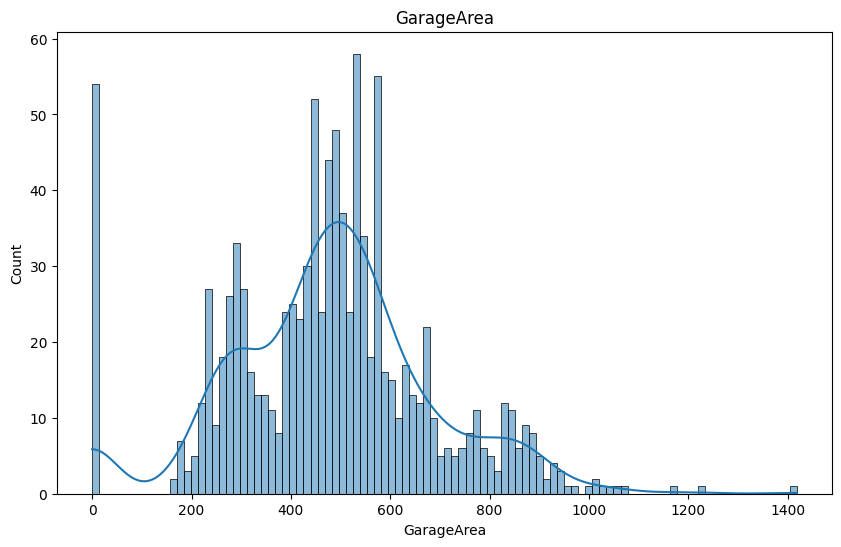

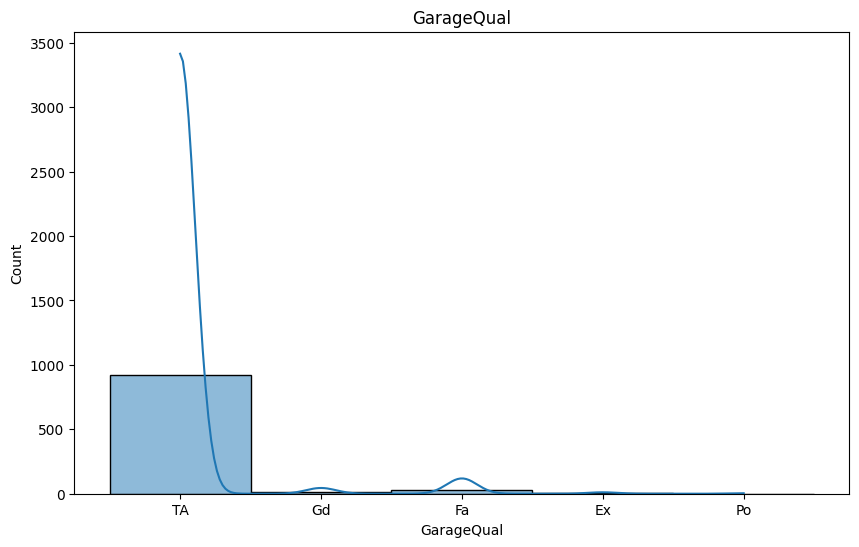

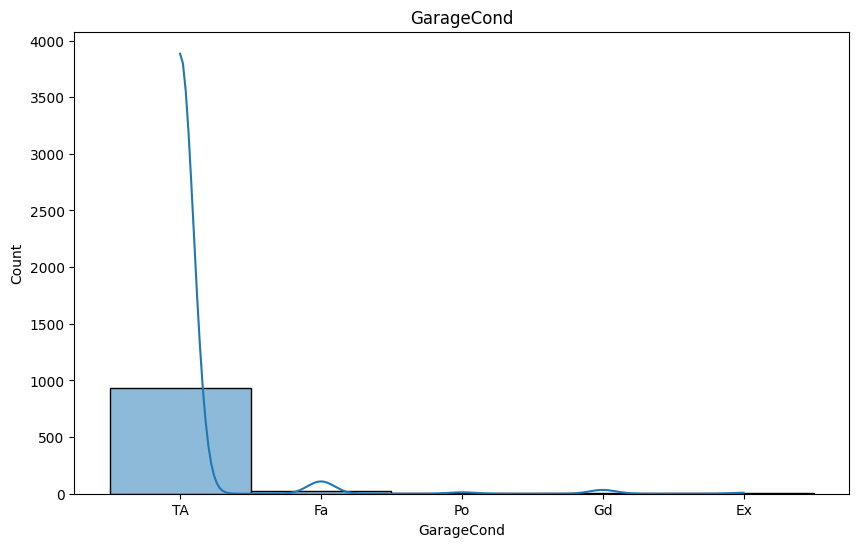

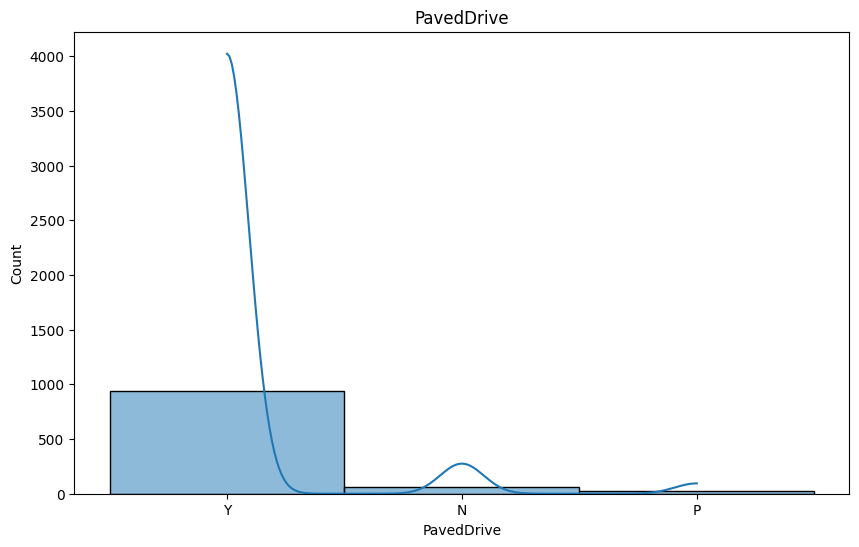

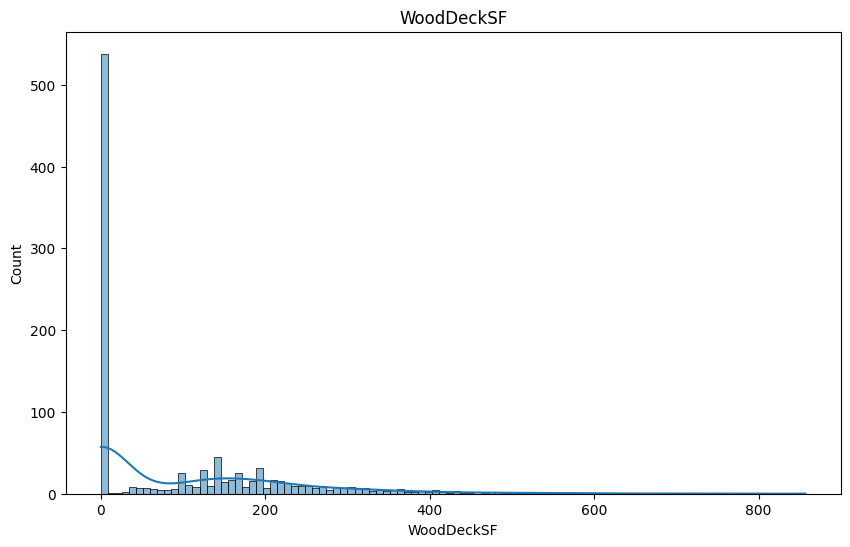

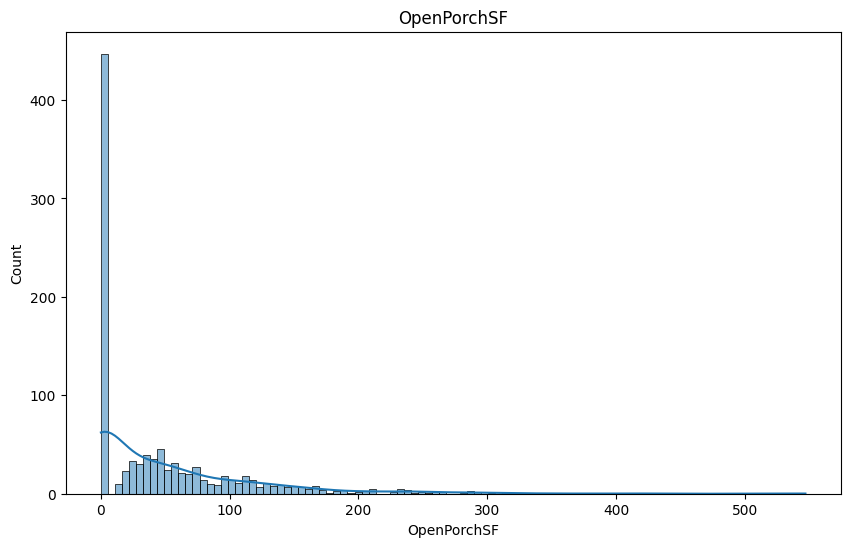

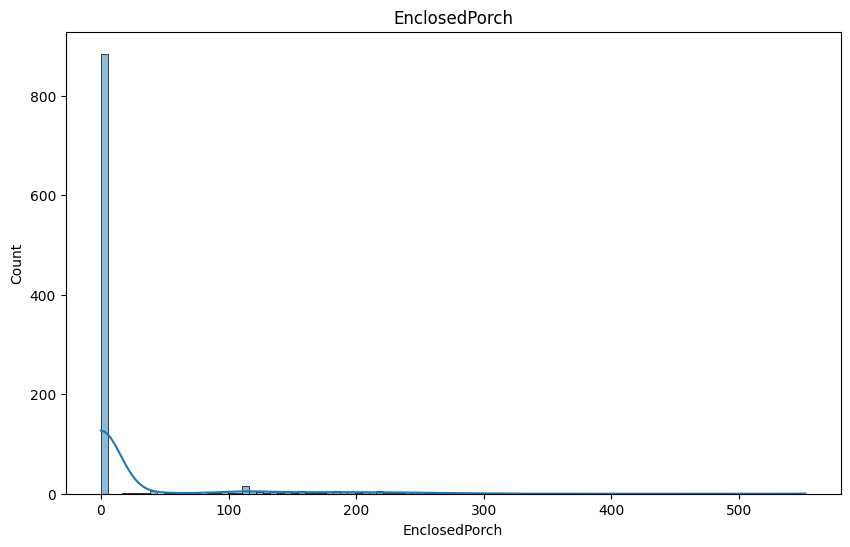

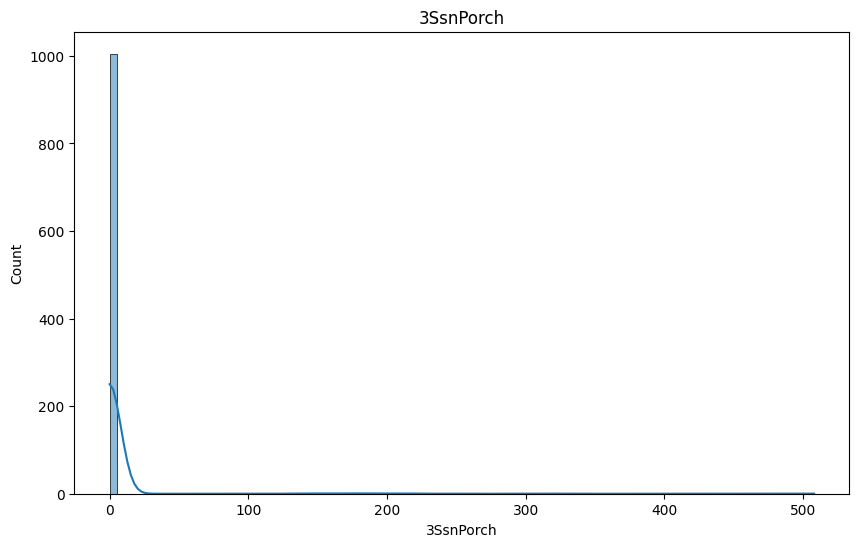

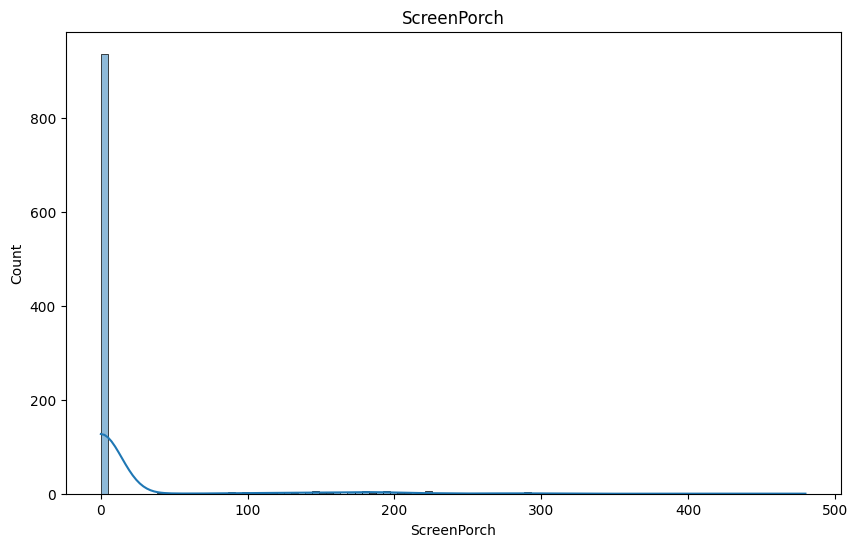

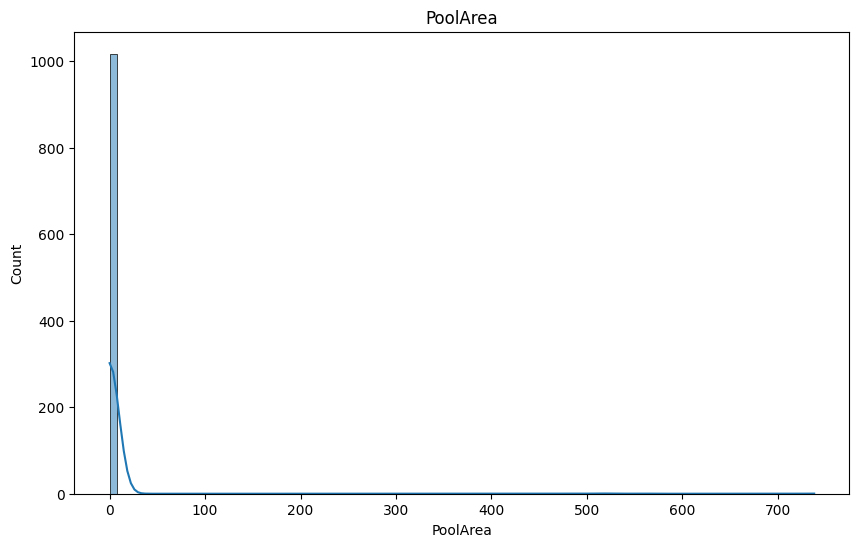

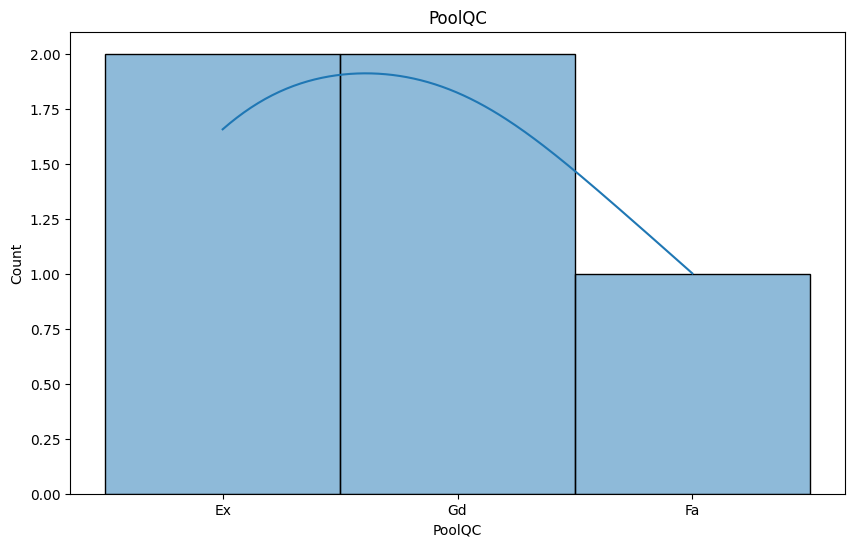

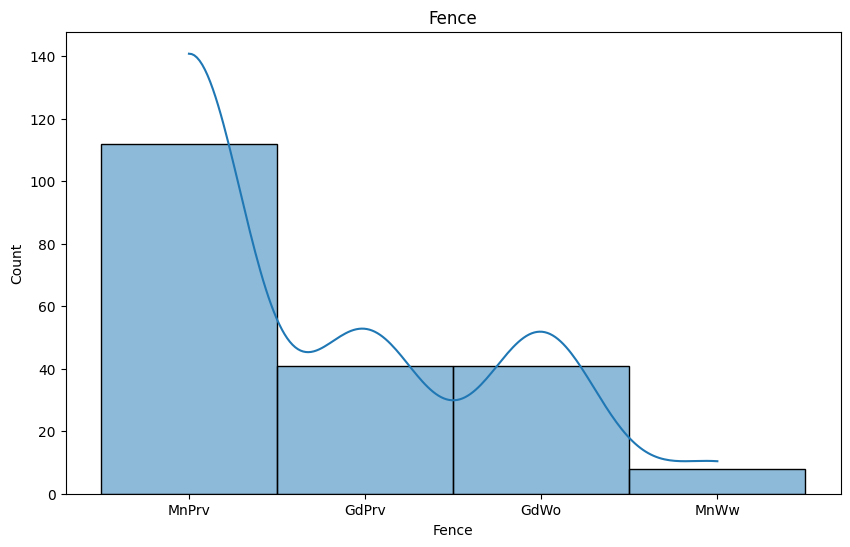

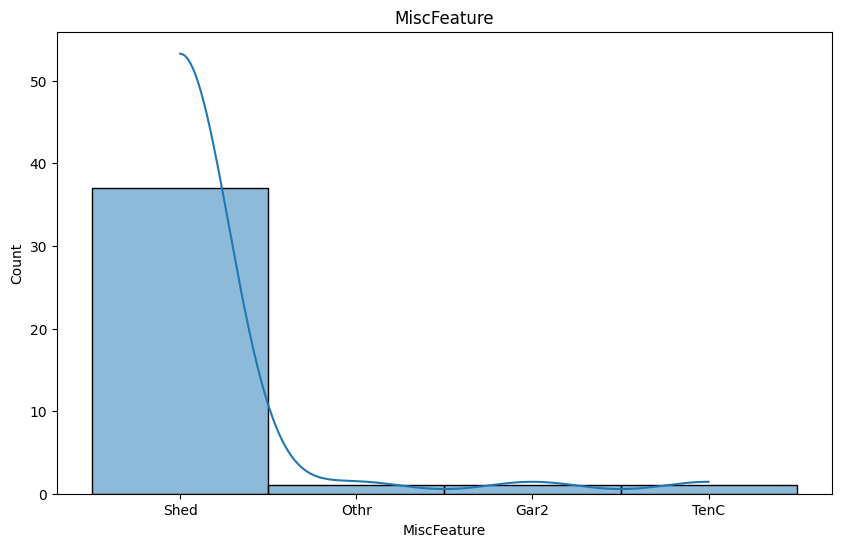

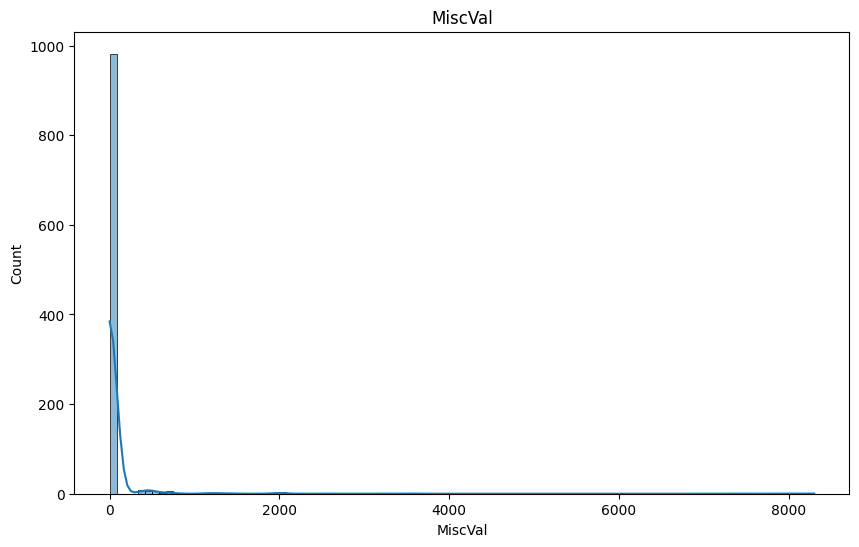

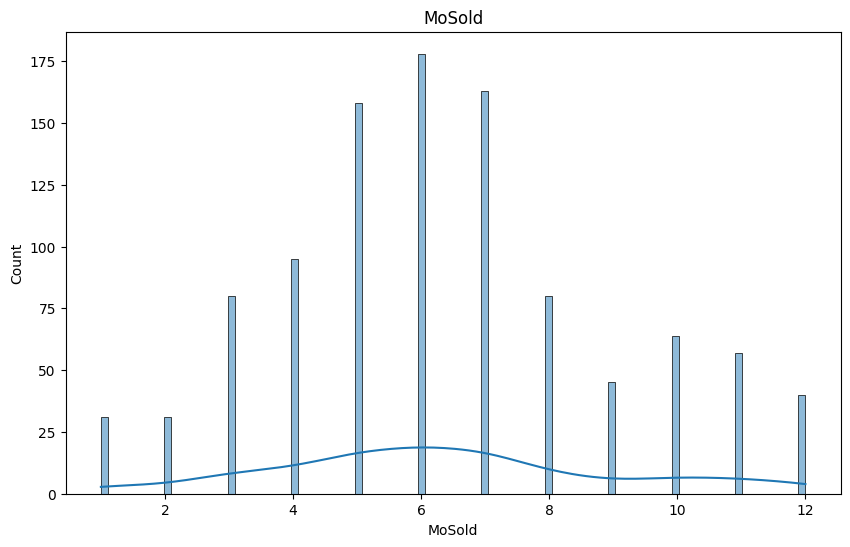

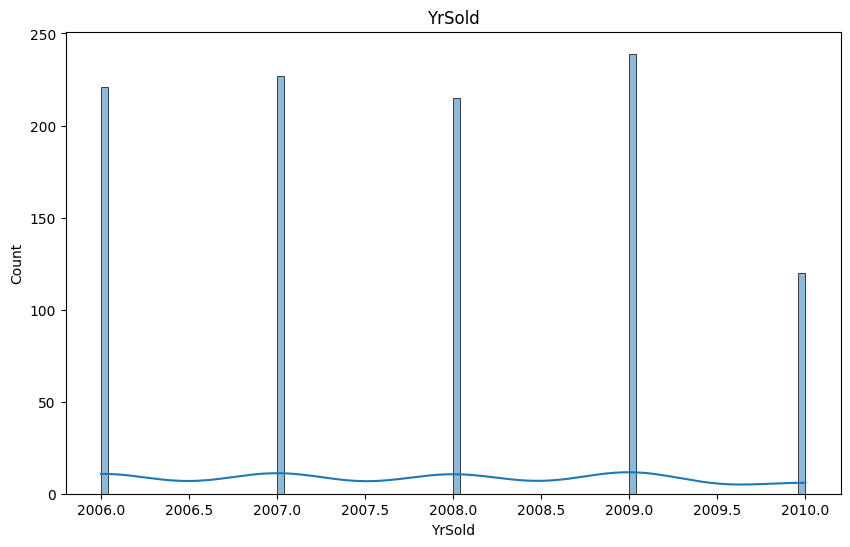

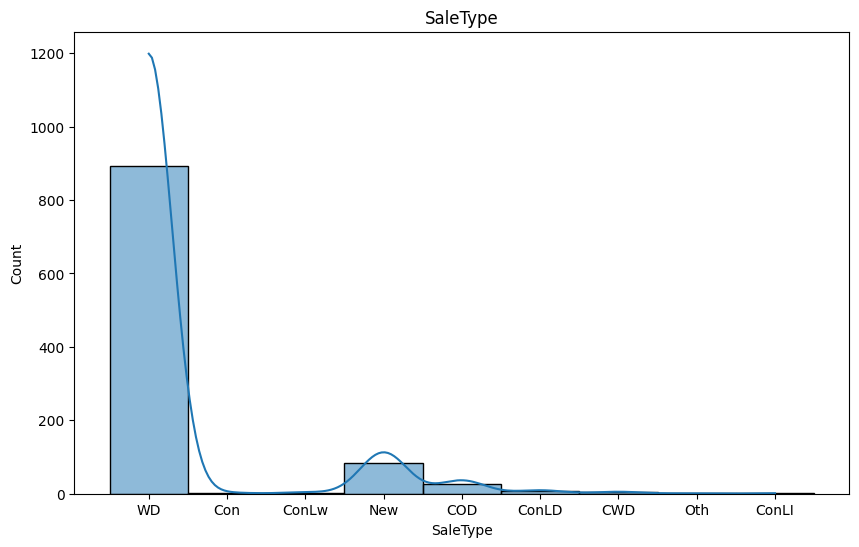

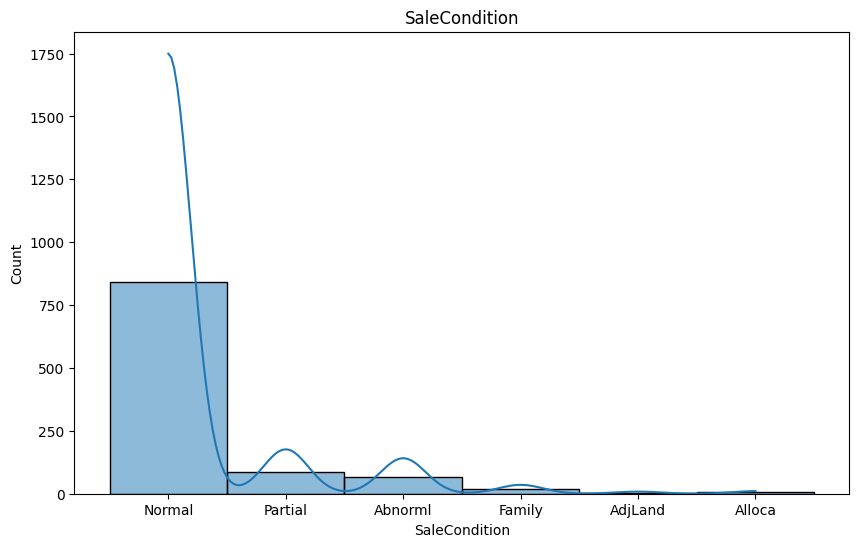

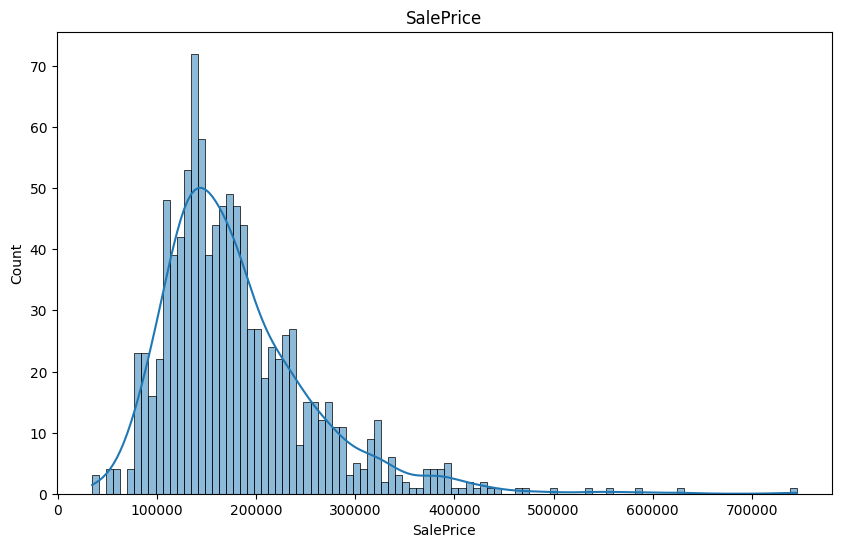

In [12]:
# Display hist plots for numerical features.
for col in train_set.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_set[col], kde=True, bins=100)   
    plt.title(f'{col}')
#     plt.xlabel('Average Monthly Hours')
#     plt.ylabel('Frequency')
plt.show()

## Visualization : Continuous target / Numerical features

In [13]:
#Numerical Features
numerical_features = train_set.select_dtypes(include = 'number').columns.values.tolist()


### Numerical features with LOW number of unique values


<span style="font-family:Comic Sans MS; color:red">If a numerical feature has a relatively low number of unique values, we can "see" it like a pseudo-categorical feature during visualization. </span>



In [14]:
# Max threshold for number of unique values within a column
max_unique = 20

# Numerical features with more than X unique values
numerical_features_small_uniques = []

for col in numerical_features:
    if len(train_set[col].unique()) < max_unique:
        numerical_features_small_uniques.append(col)
numerical_features_small_uniques;

#### Barplot


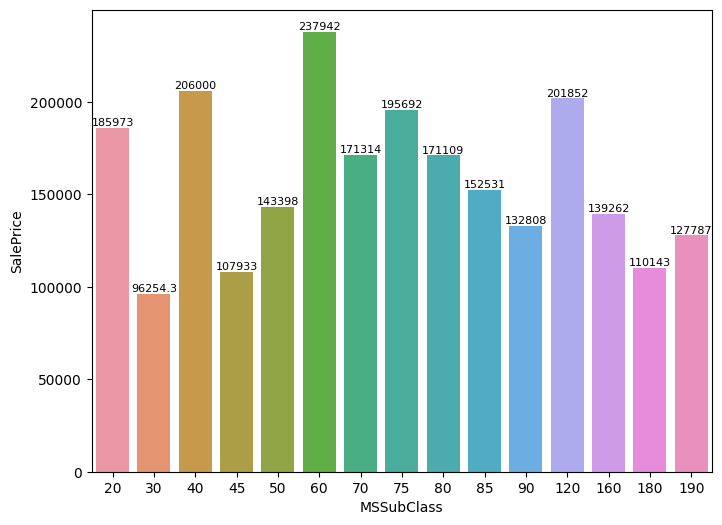

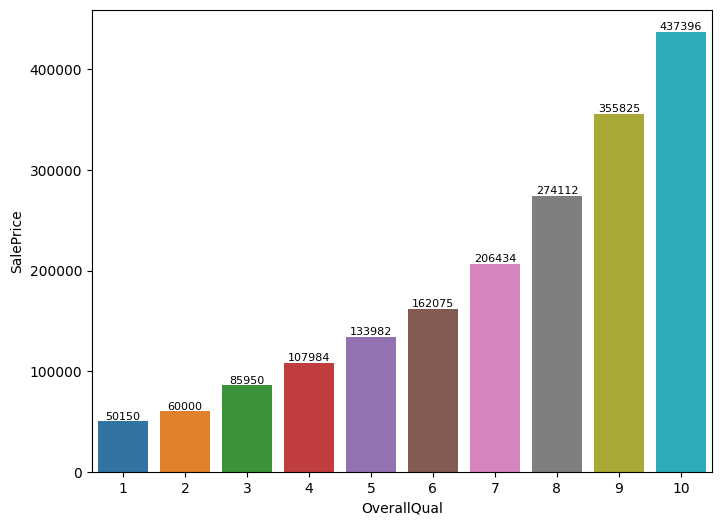

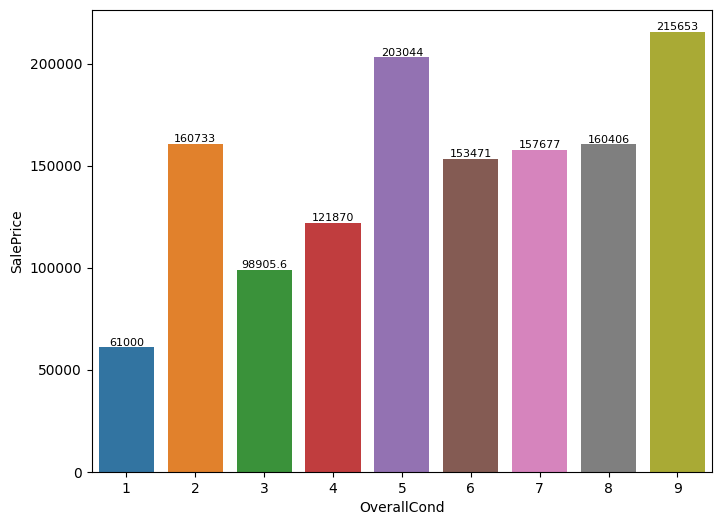

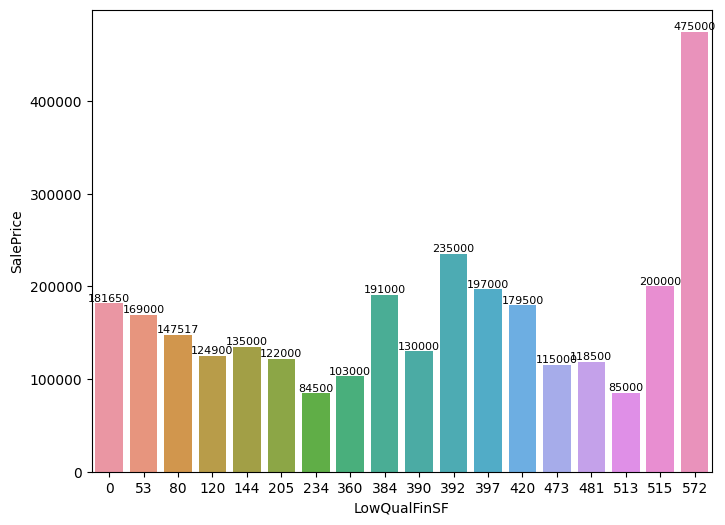

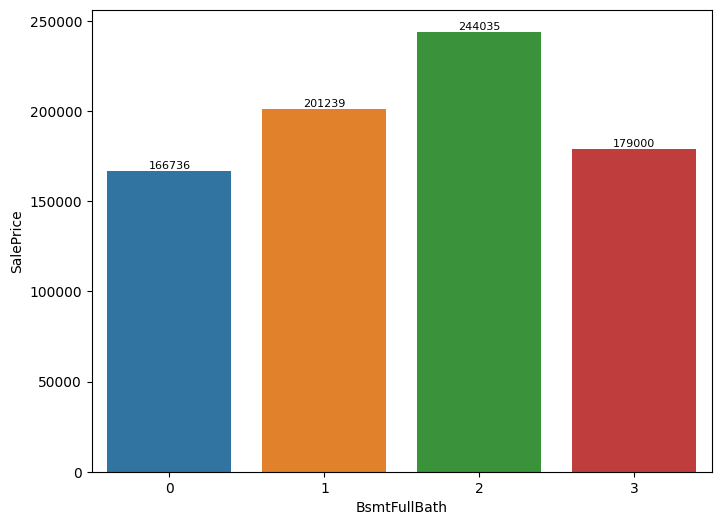

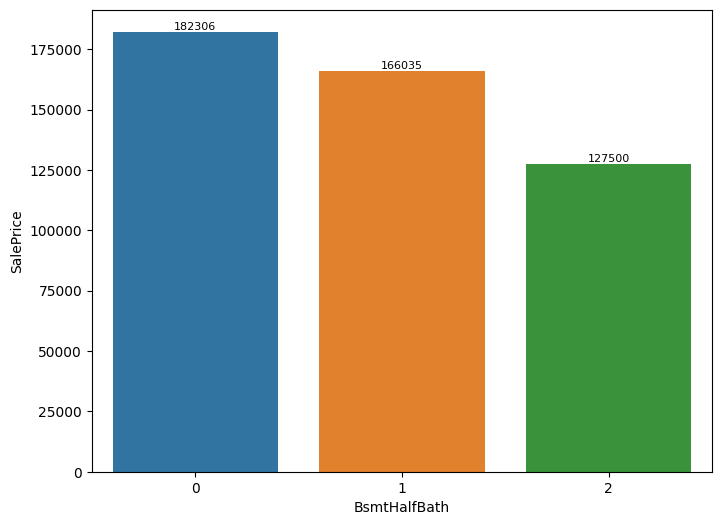

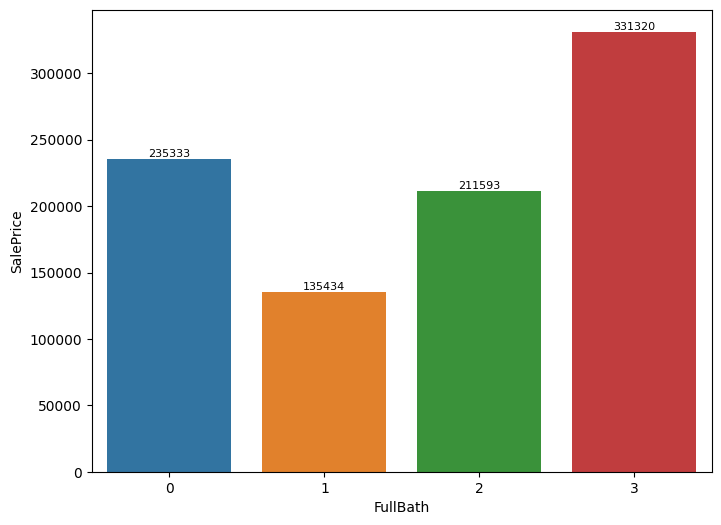

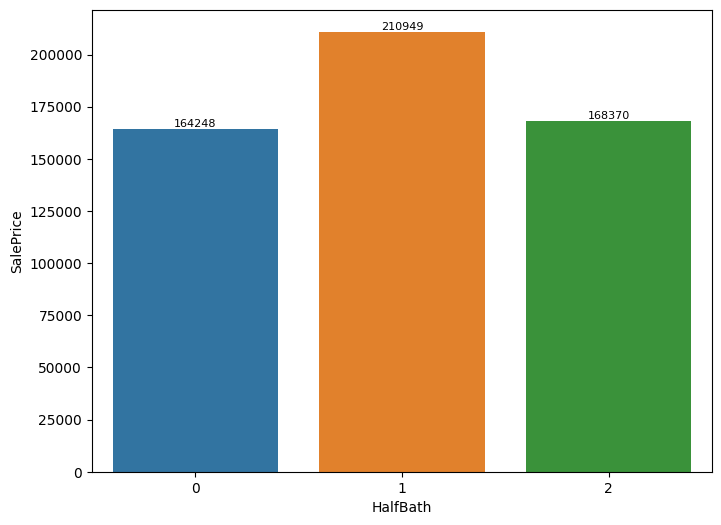

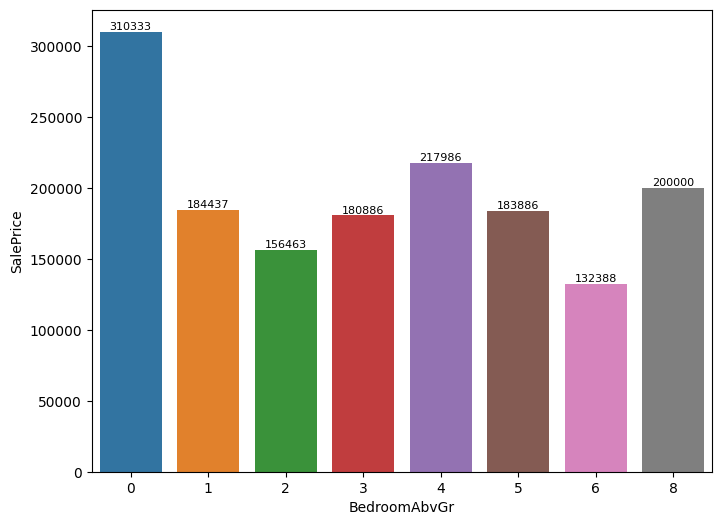

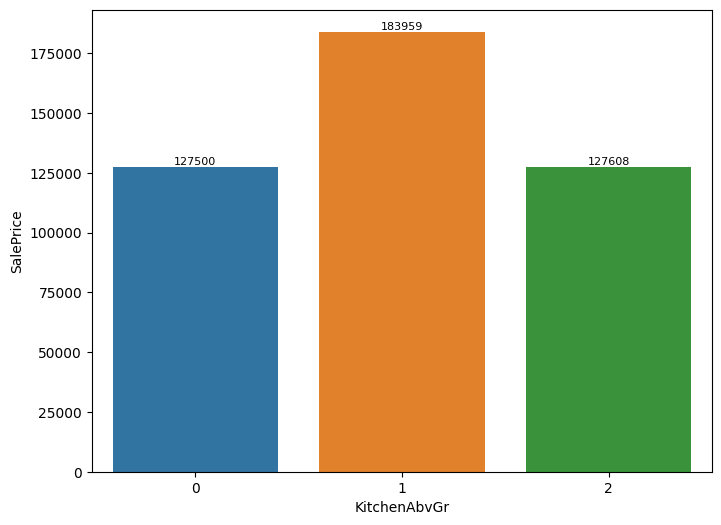

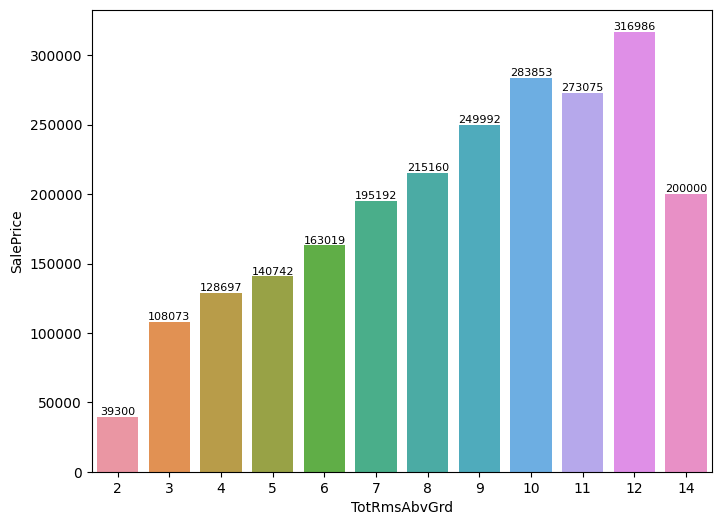

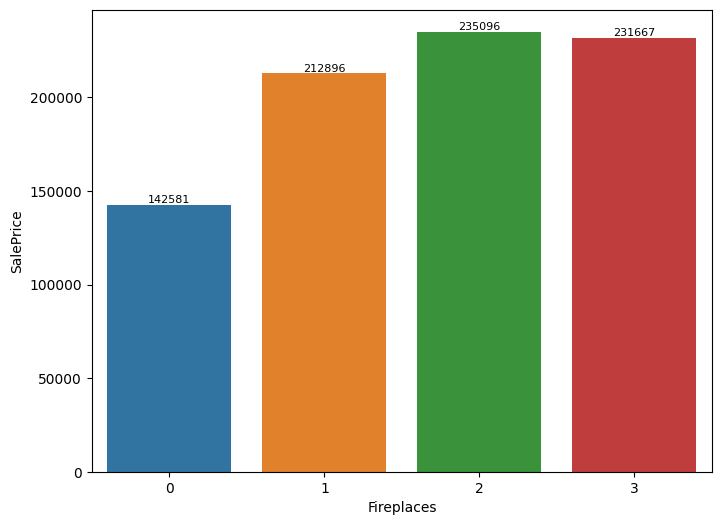

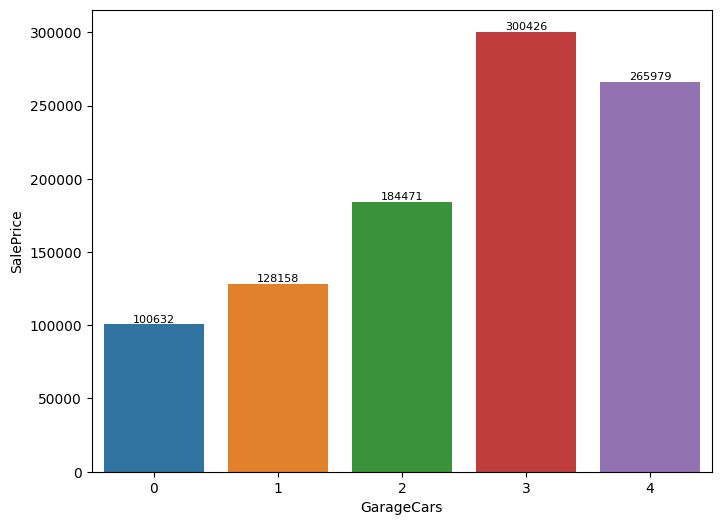

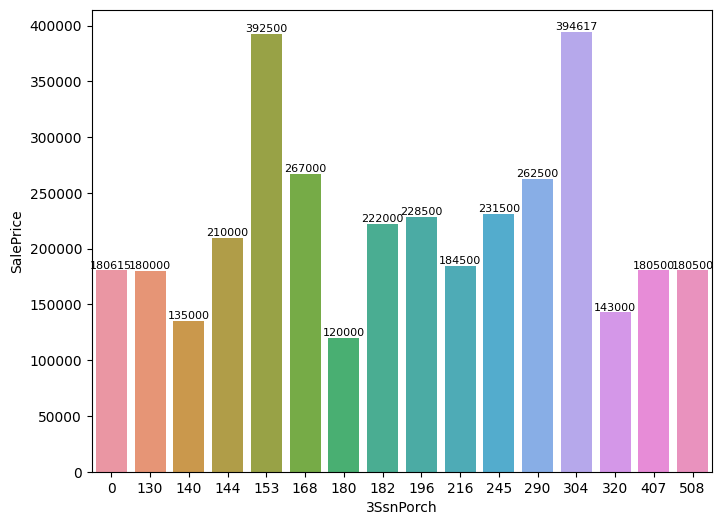

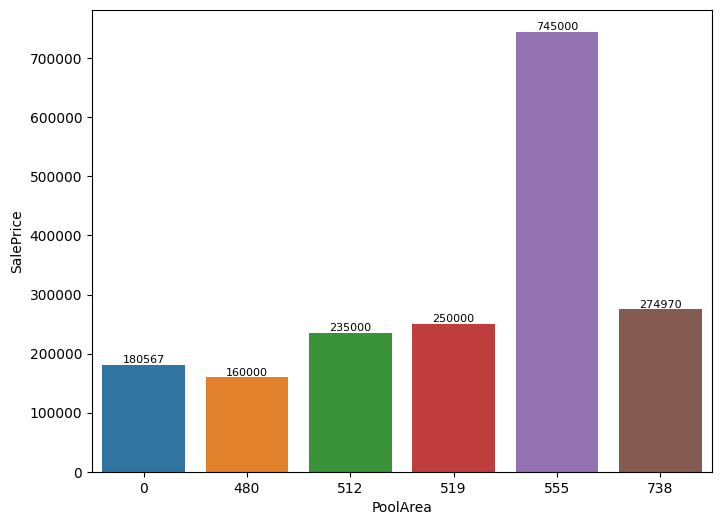

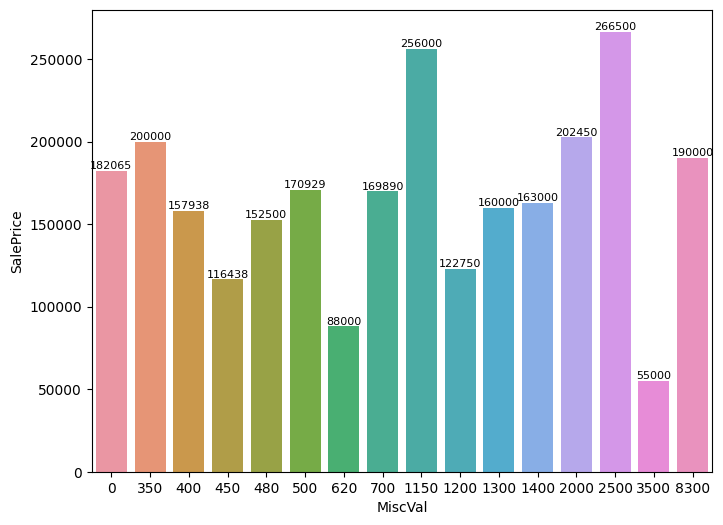

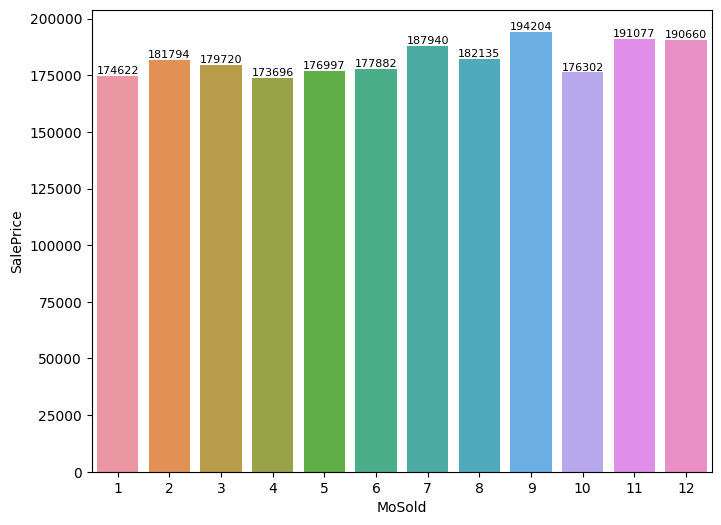

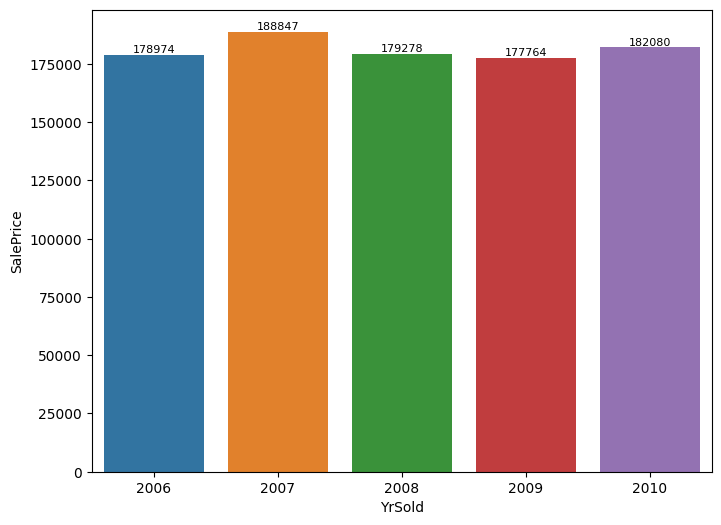

In [15]:
# Display bar plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=train_set,
                    x=col,
                    y=target_name,
                    ci = None) 
    ax.bar_label(ax.containers[0], fontsize=8);
    

#### Violin plots


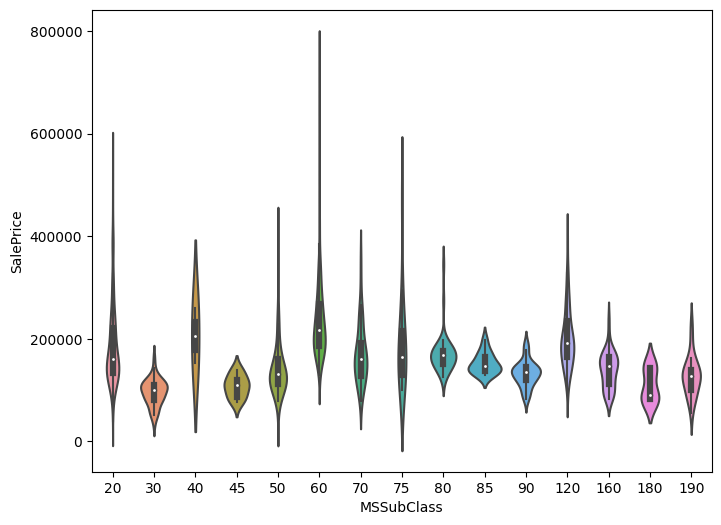

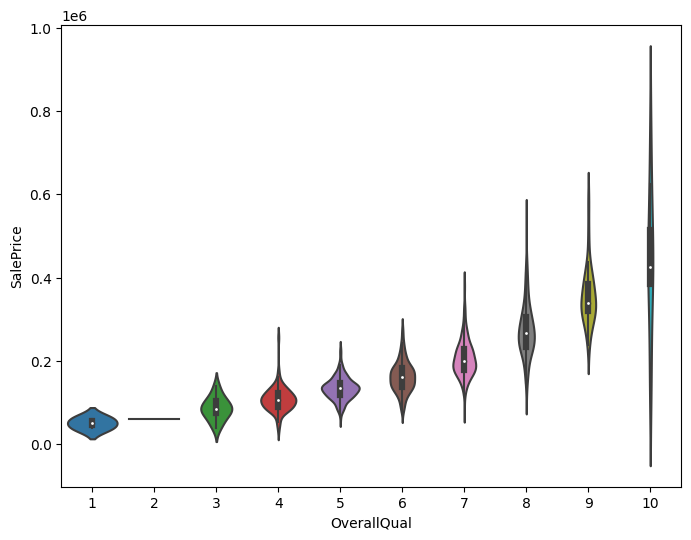

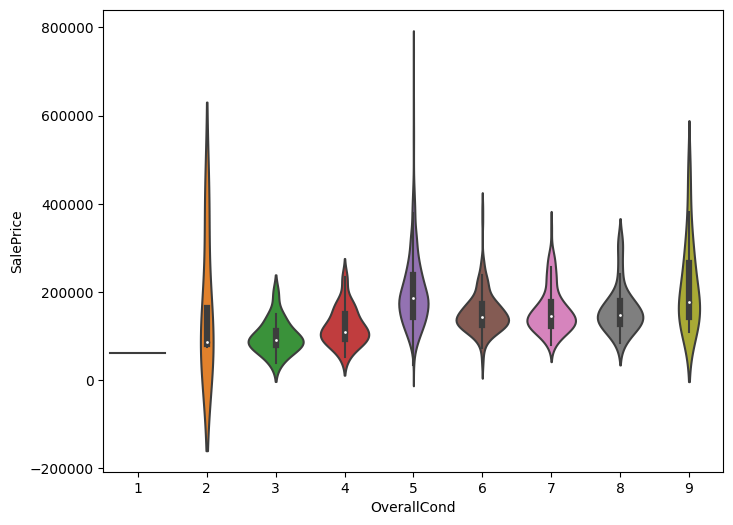

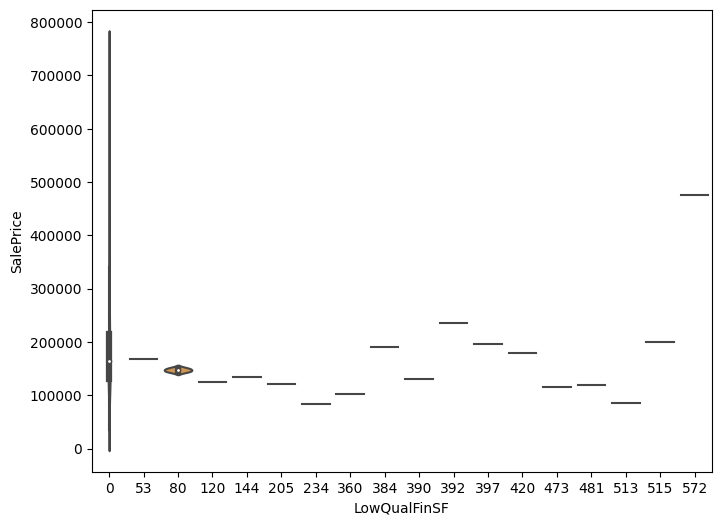

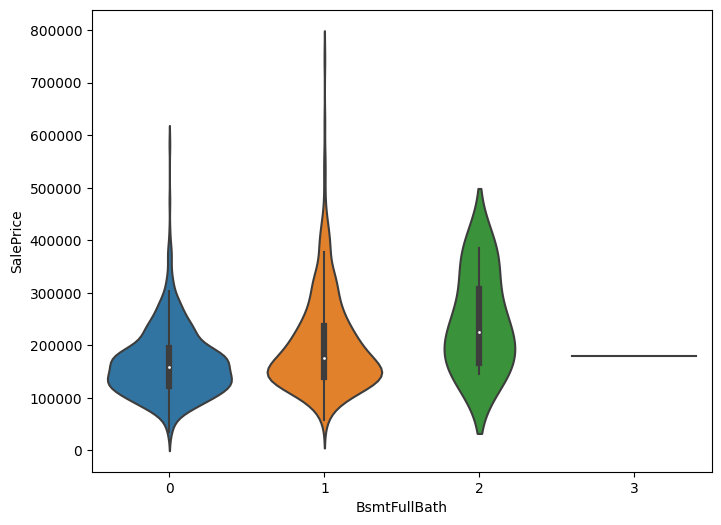

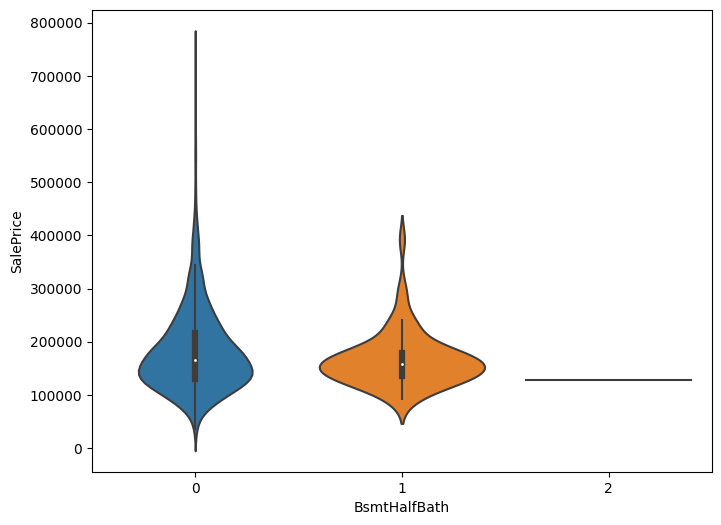

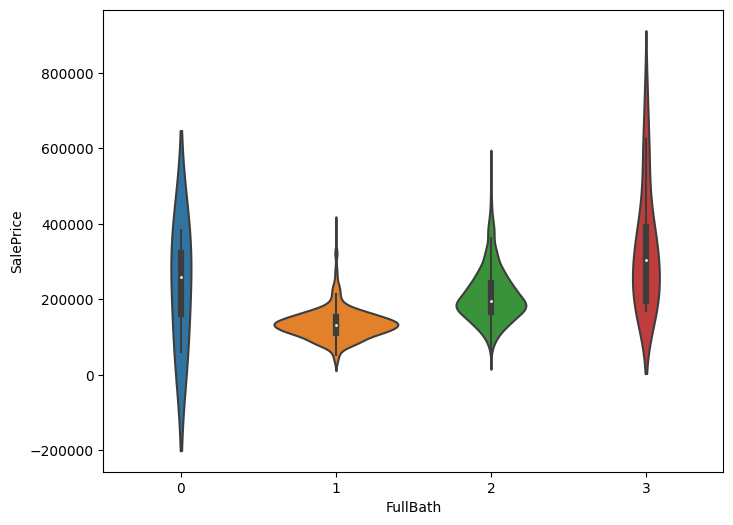

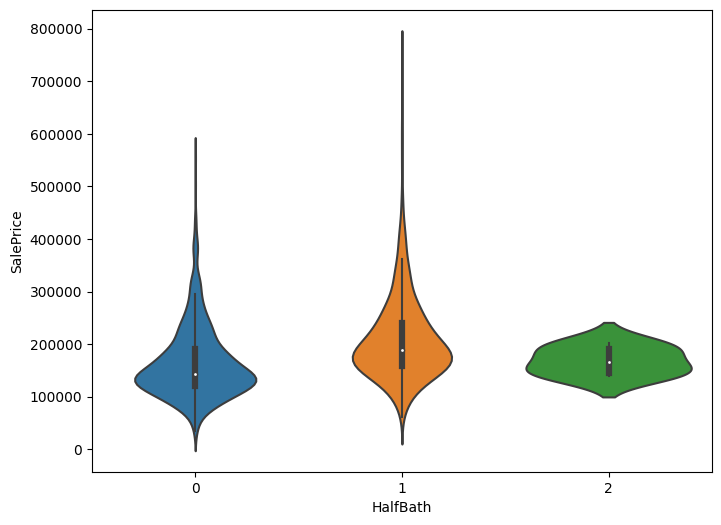

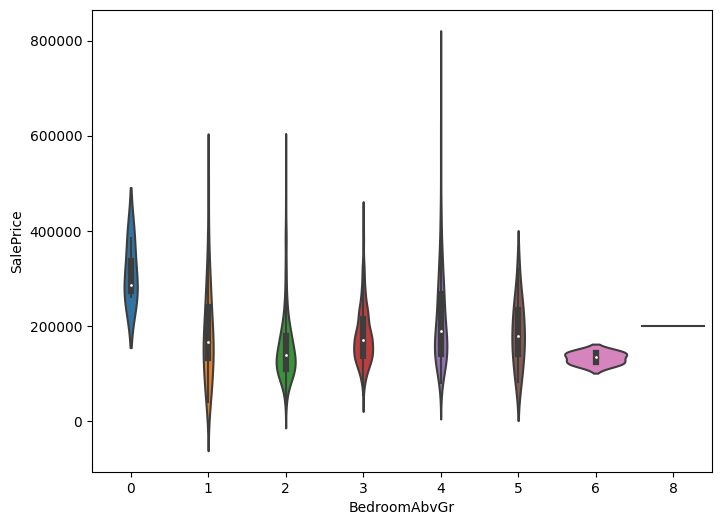

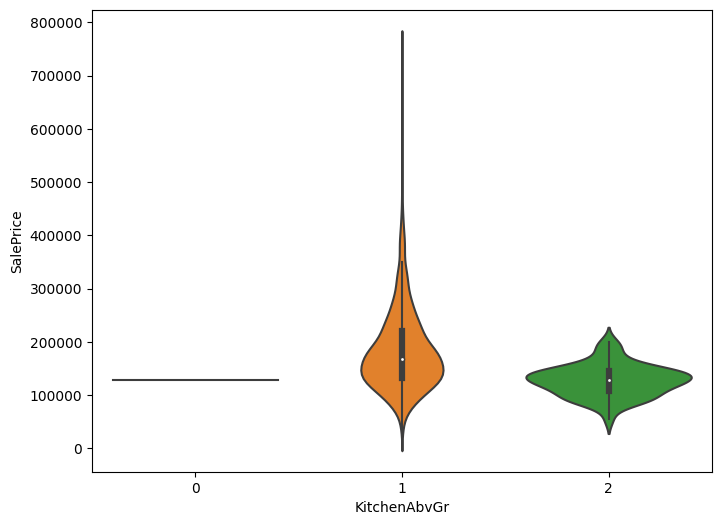

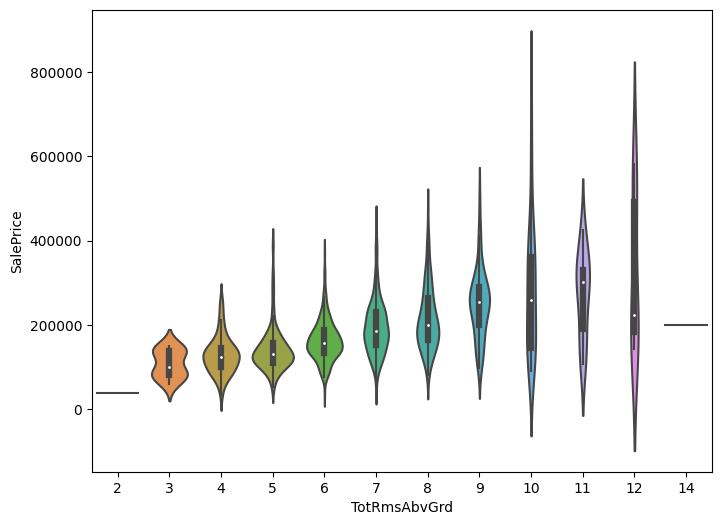

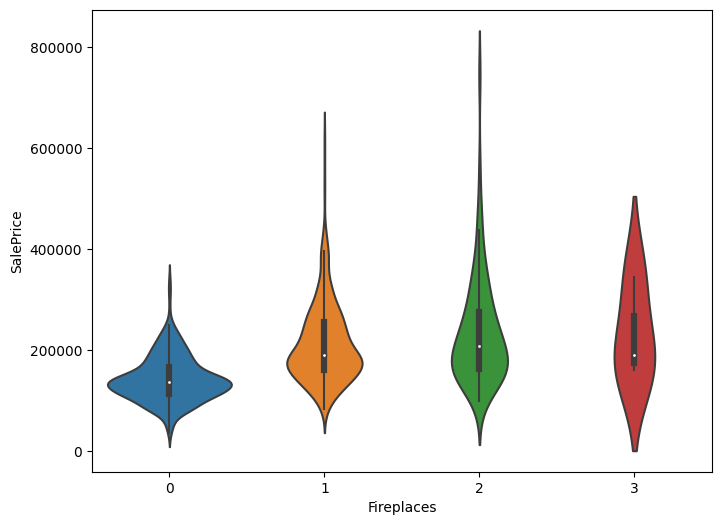

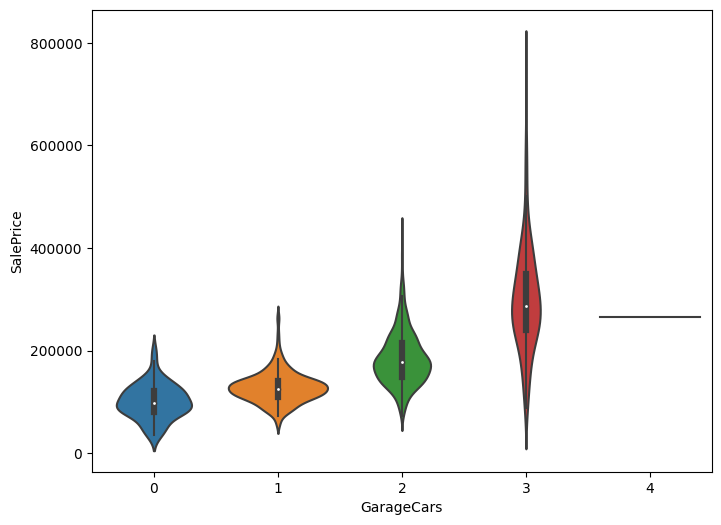

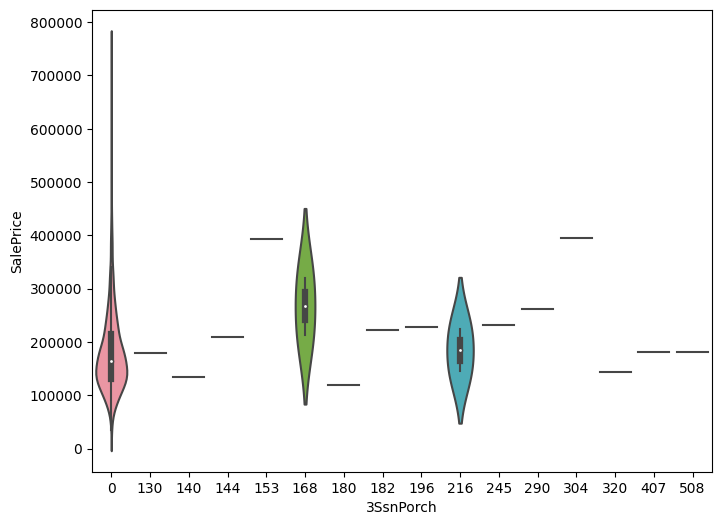

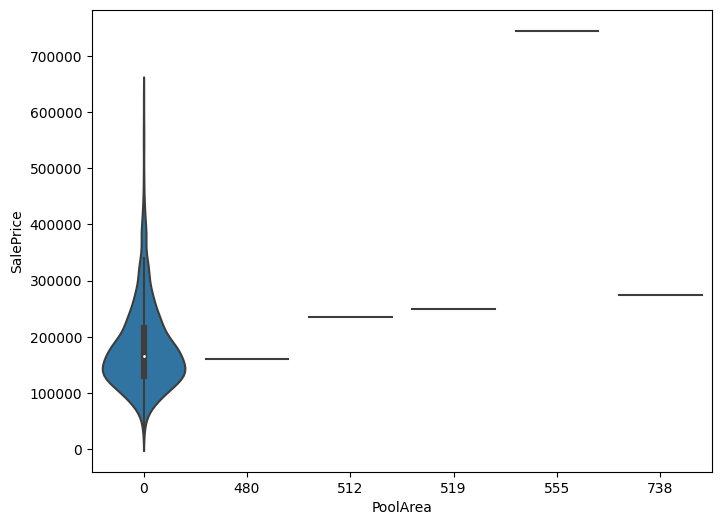

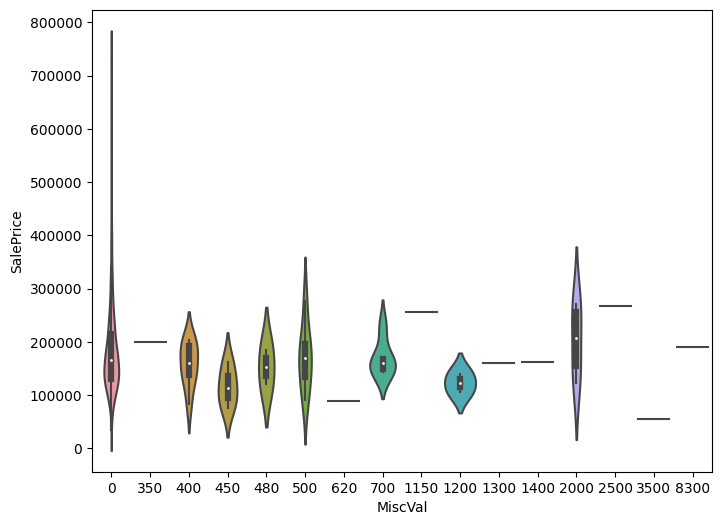

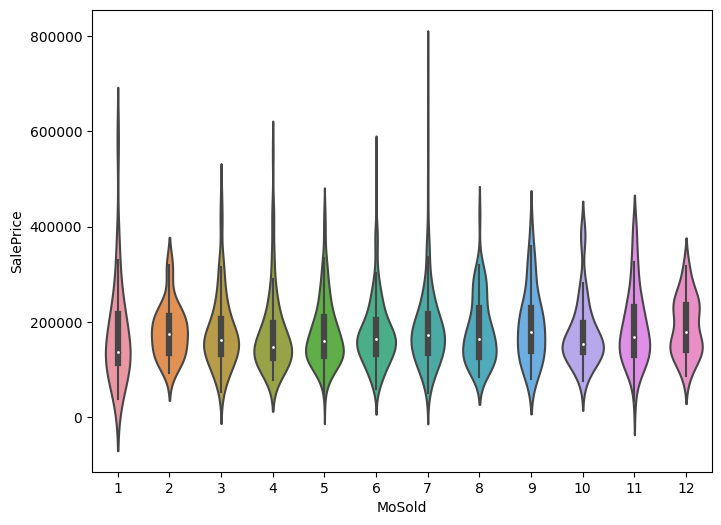

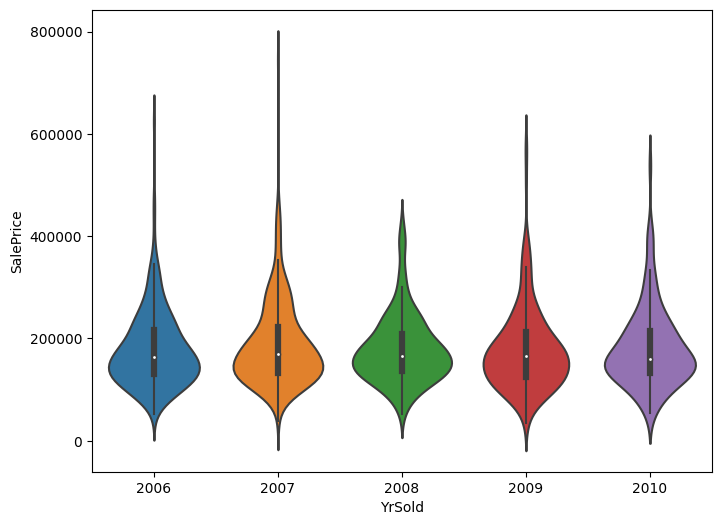

In [16]:
# Display violin plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=col,
           y=target_name,        
           data=train_set)
    

#### Box plots

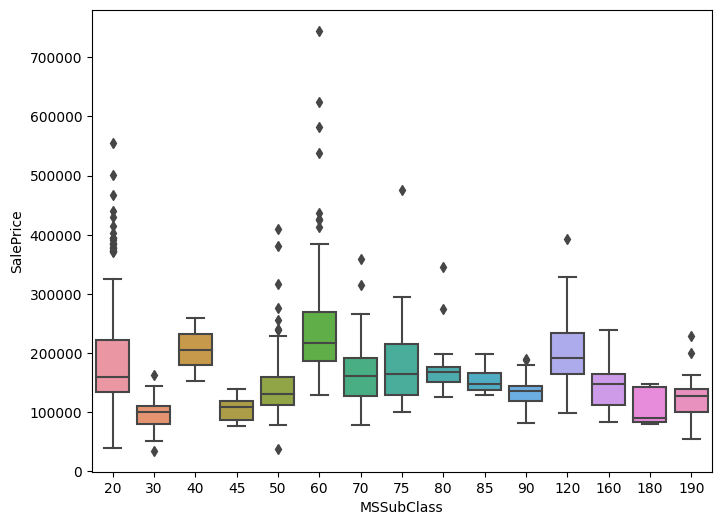

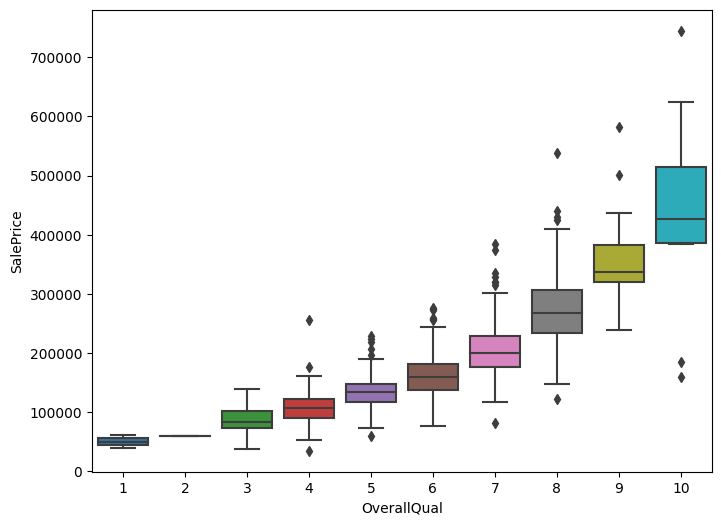

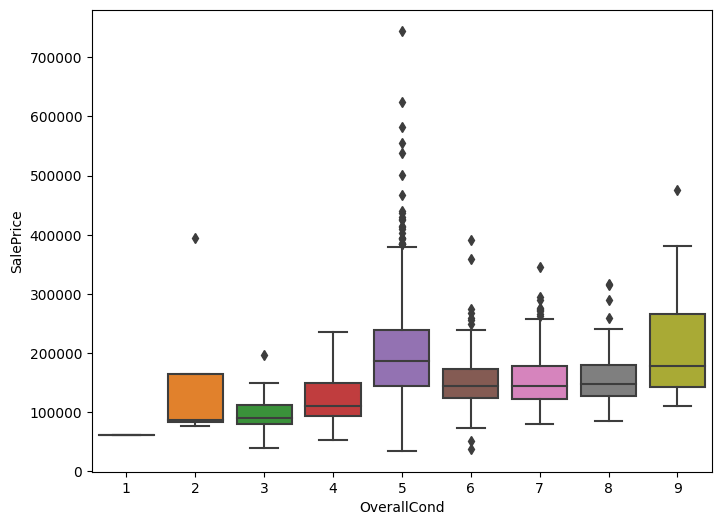

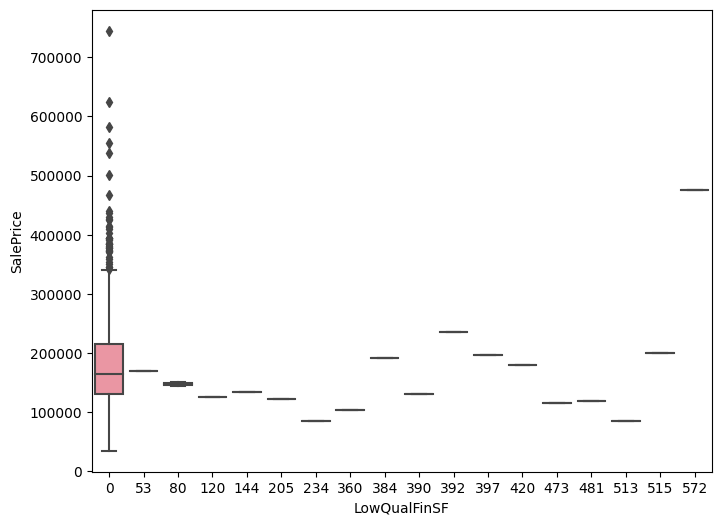

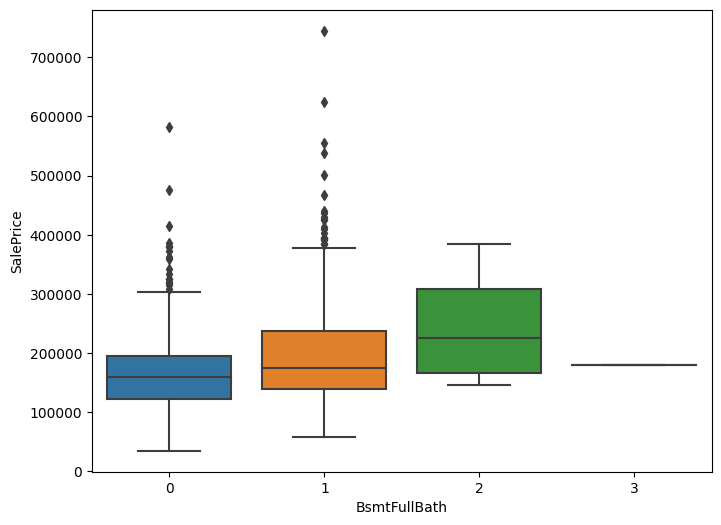

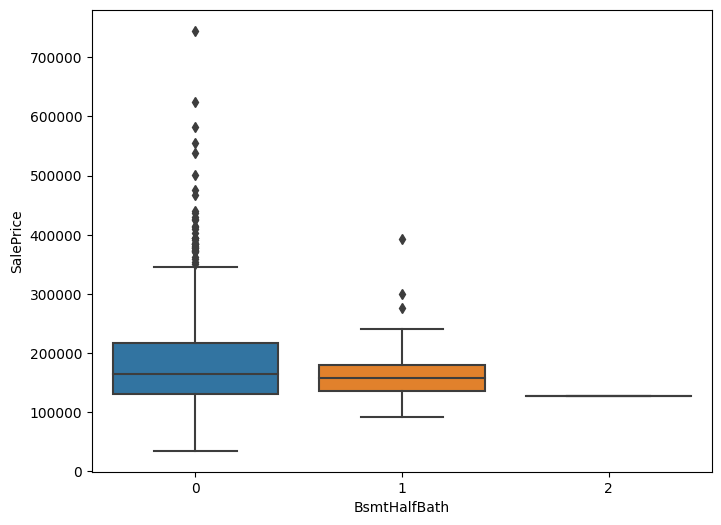

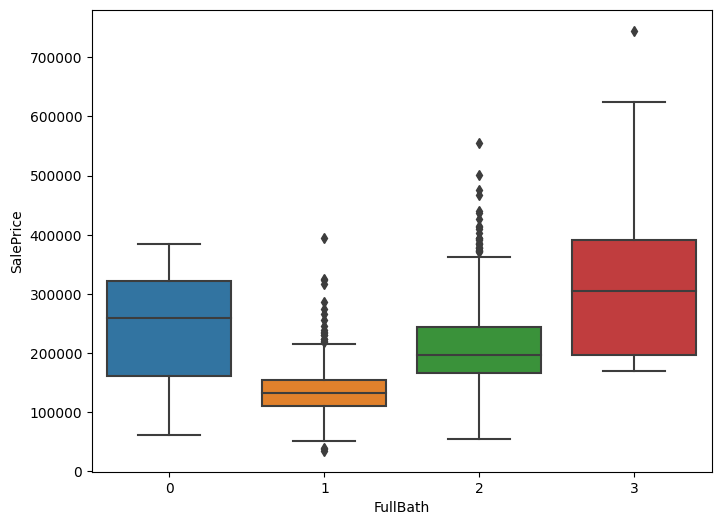

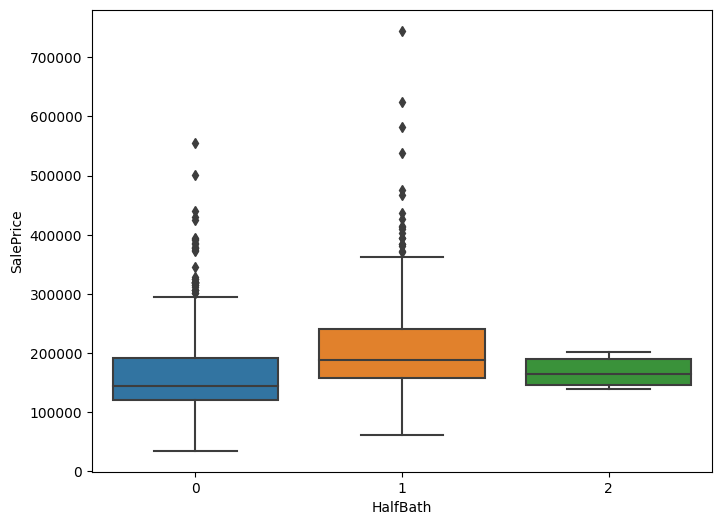

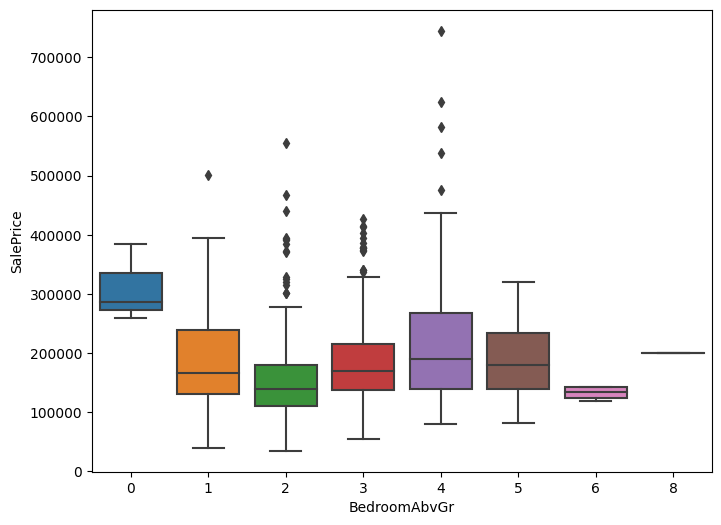

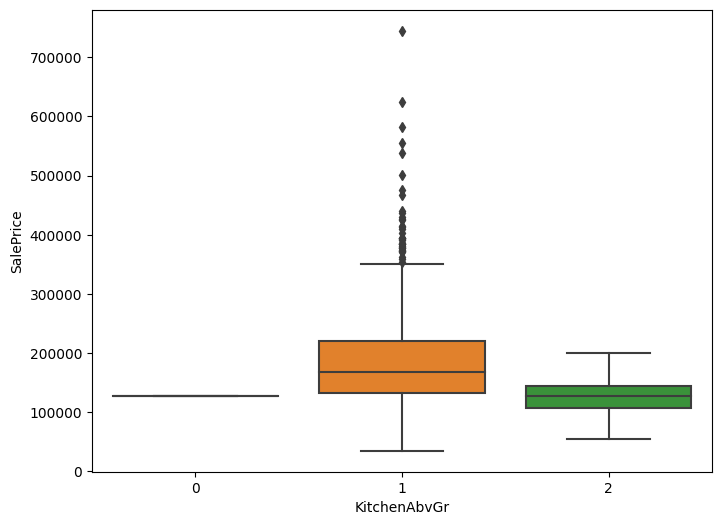

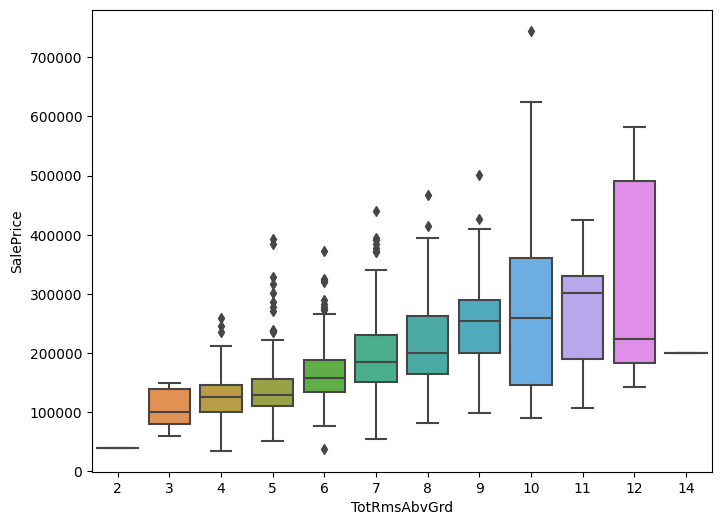

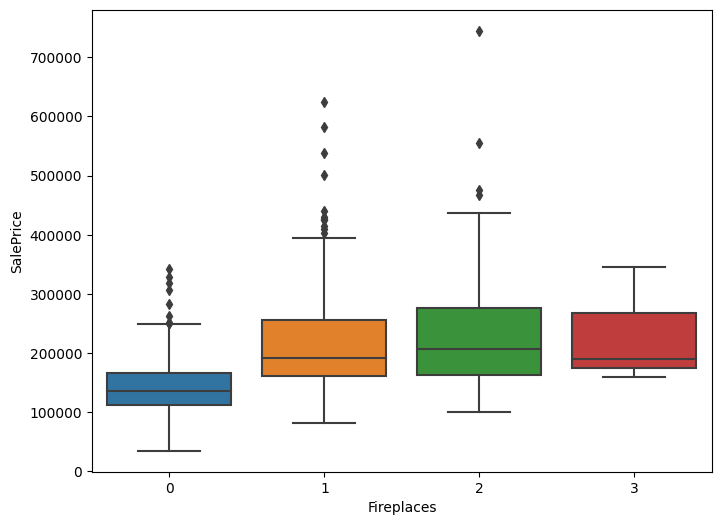

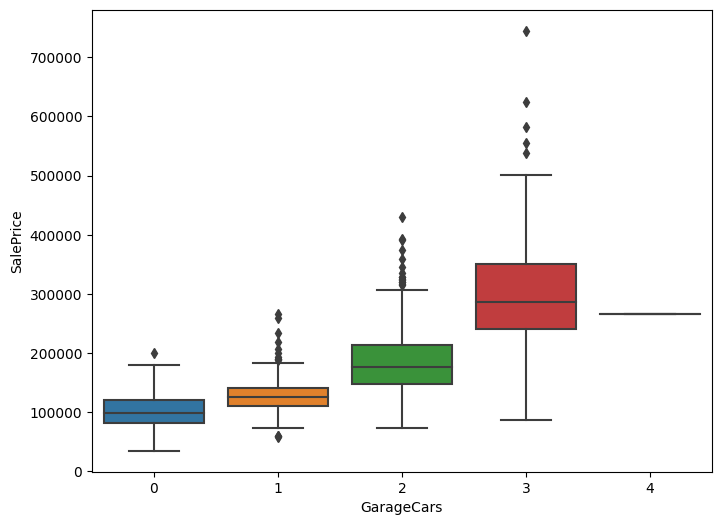

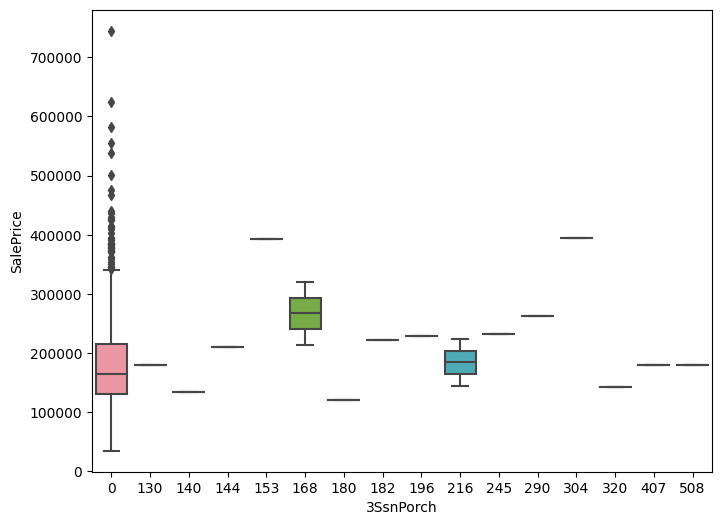

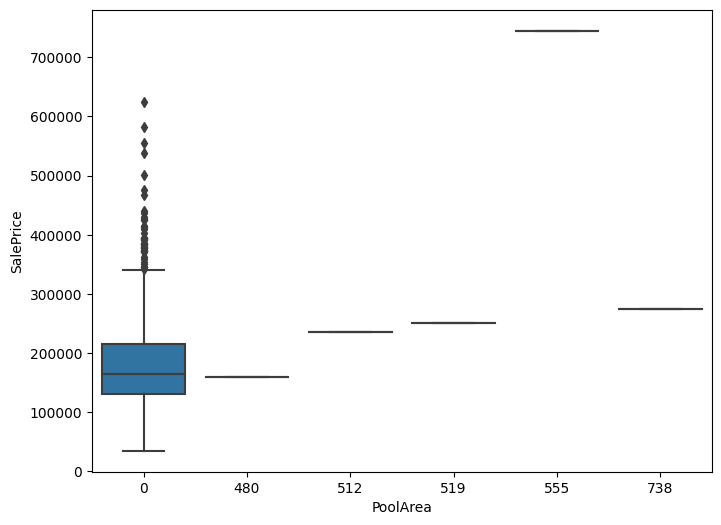

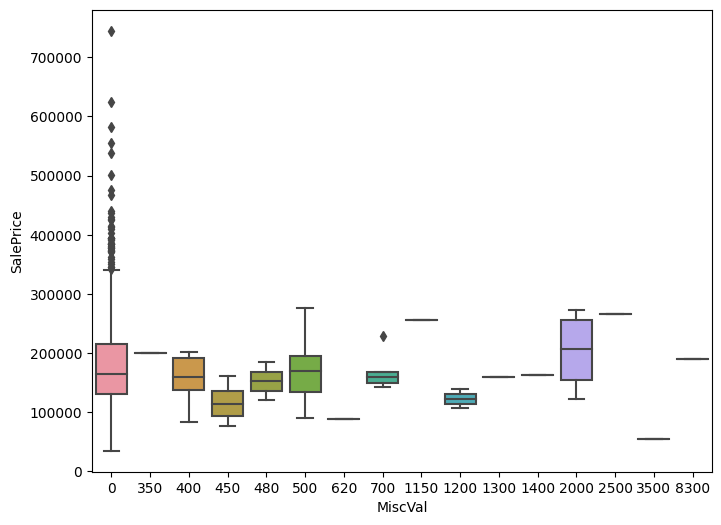

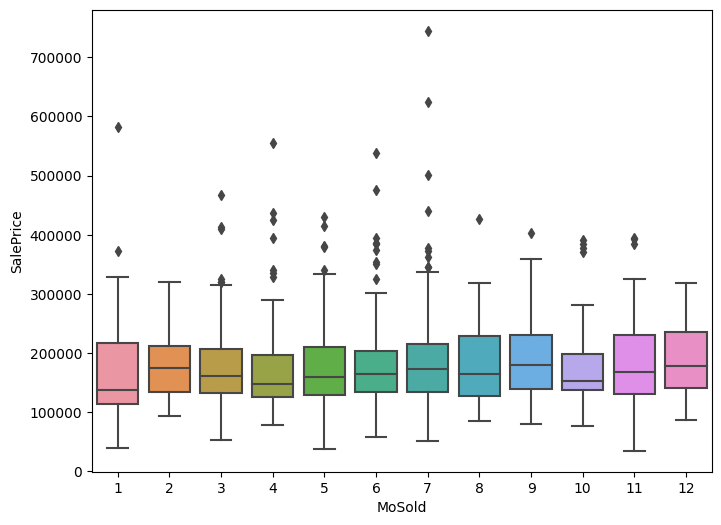

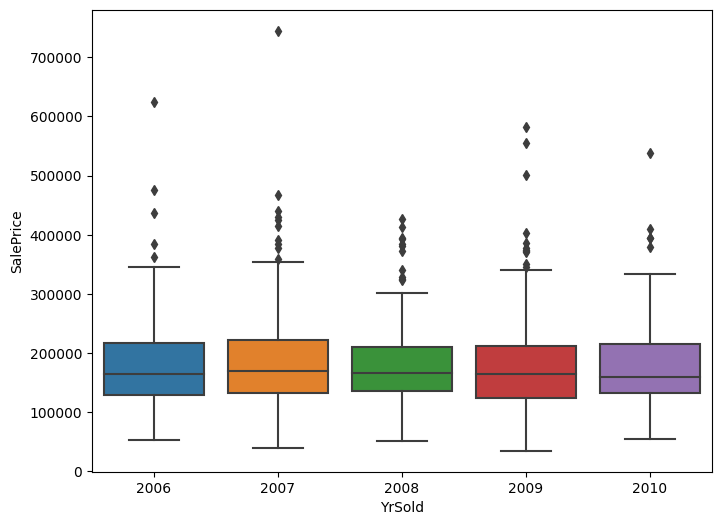

In [17]:
# Display box plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_set,
            x=col, 
            y=target_name)
    

### Numerical features with HIGH number of unique values

In [18]:
# Numerical features with more than X unique values
numerical_features_high_uniques = []

for col in numerical_features:
    if col not in numerical_features_small_uniques:
        numerical_features_high_uniques.append(col)
numerical_features_high_uniques;


#### Scatter plots


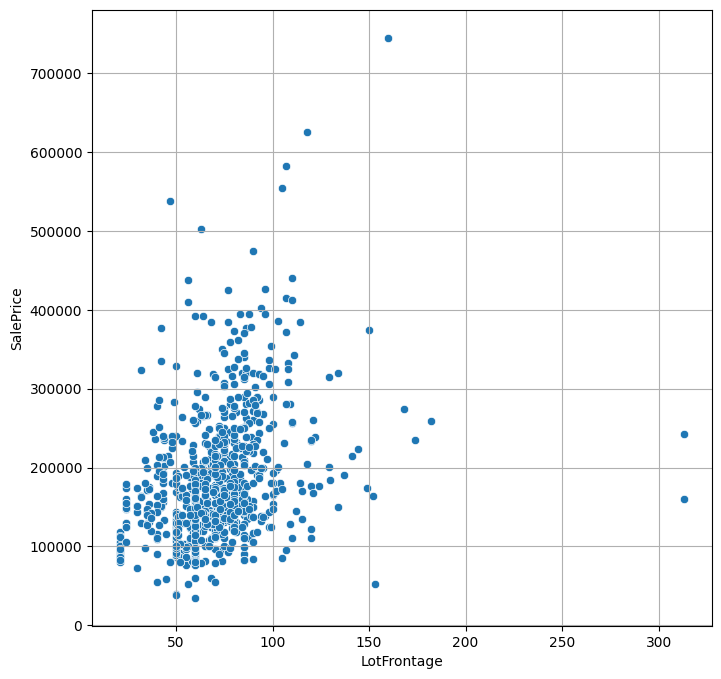

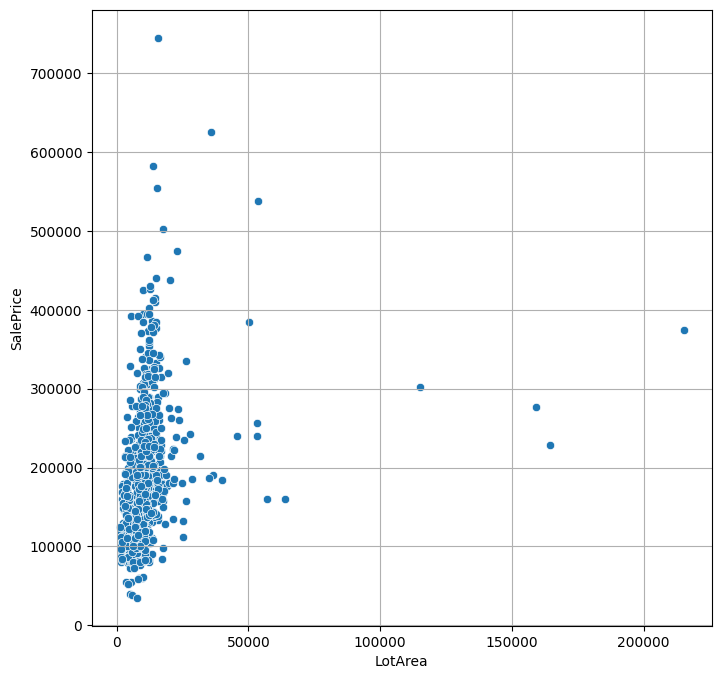

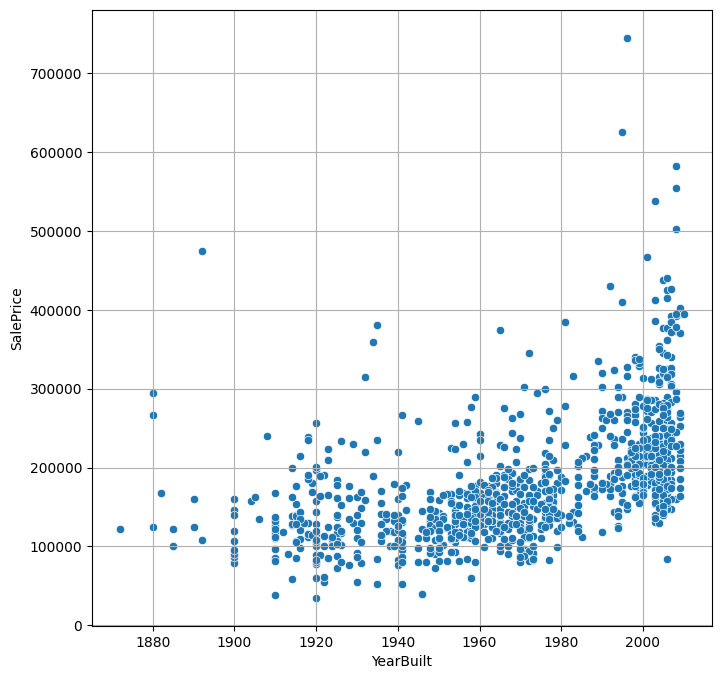

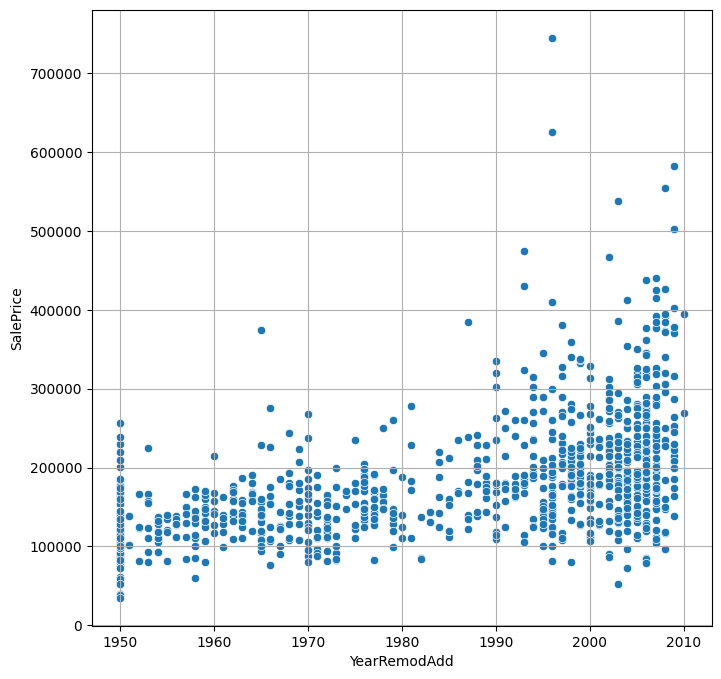

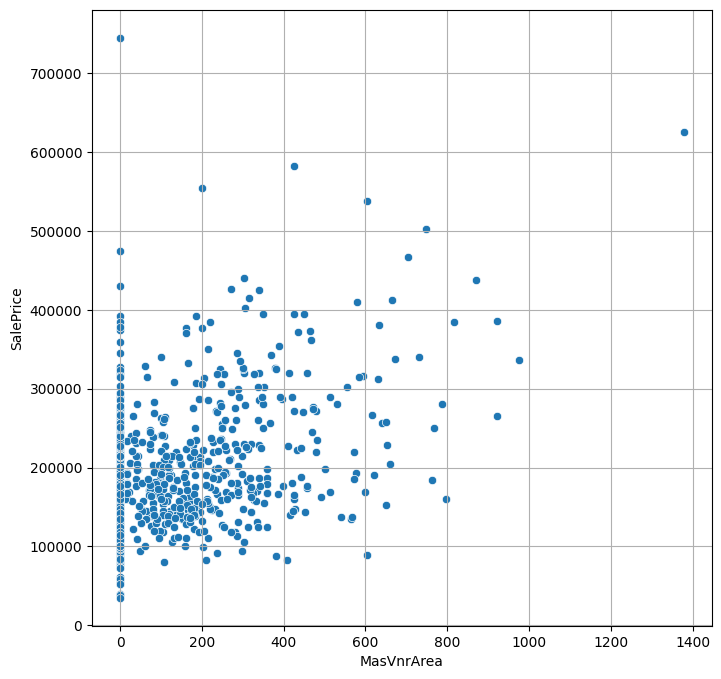

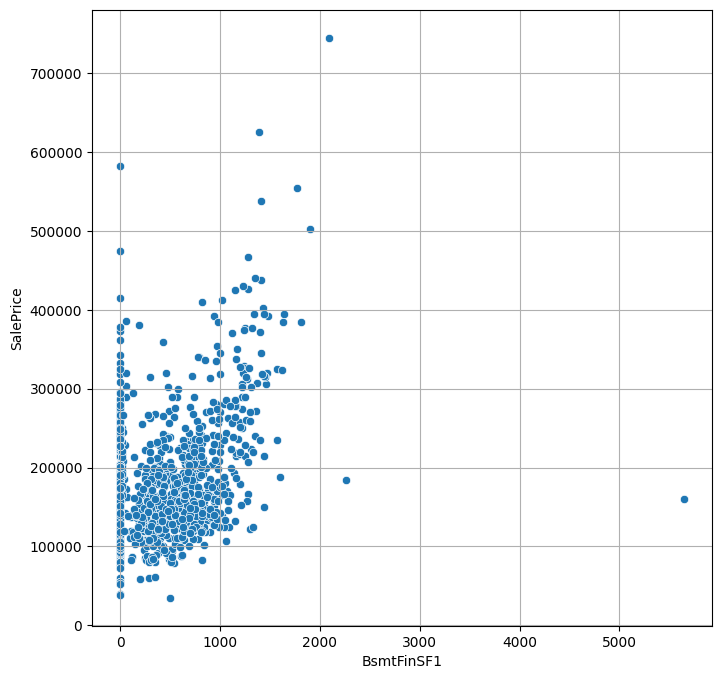

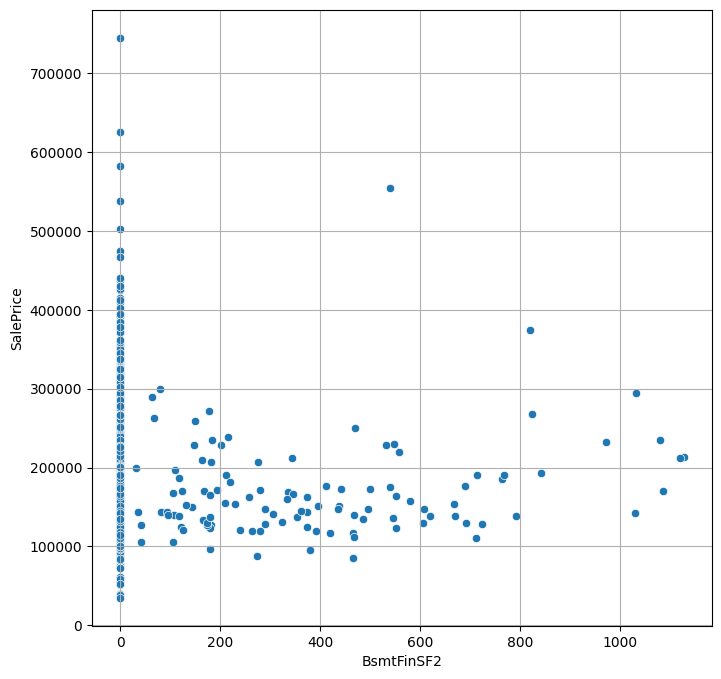

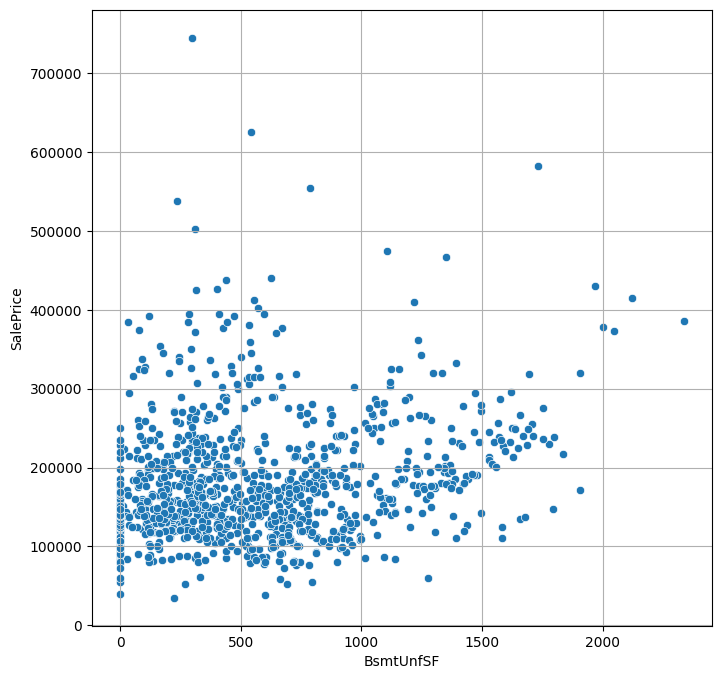

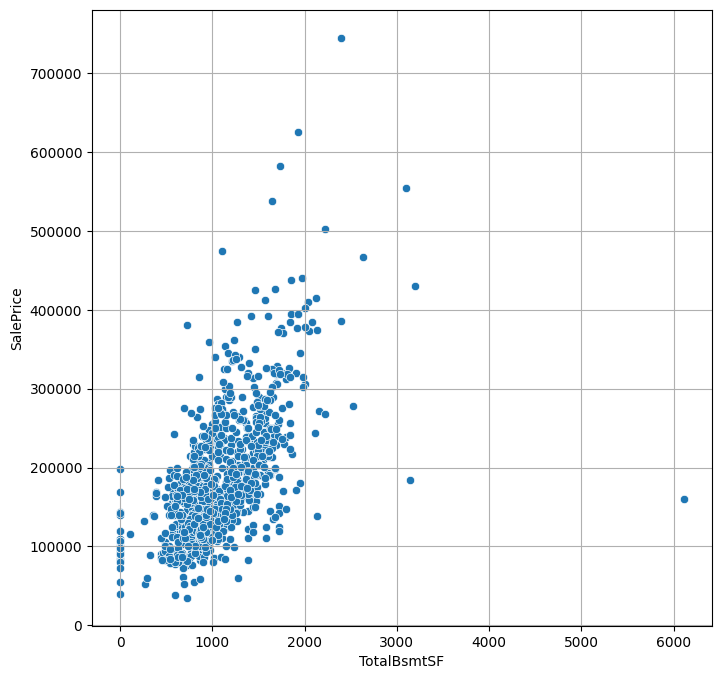

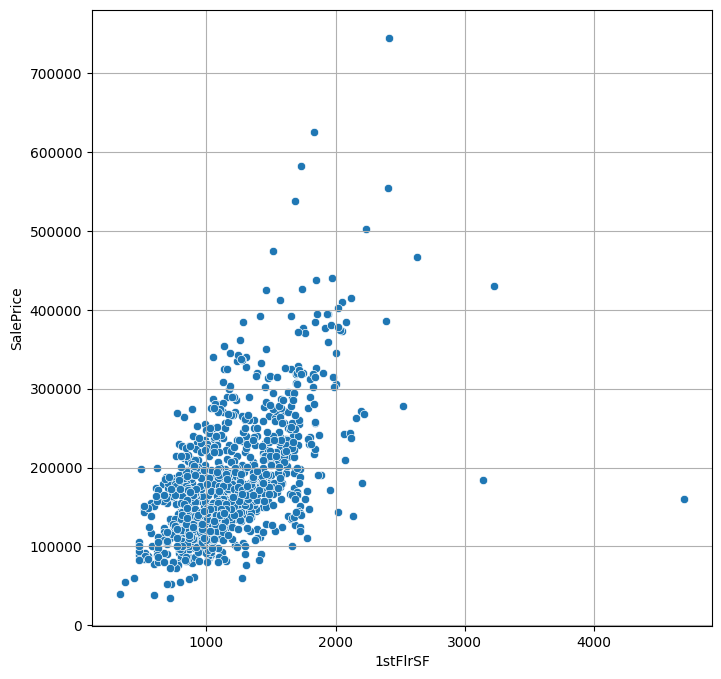

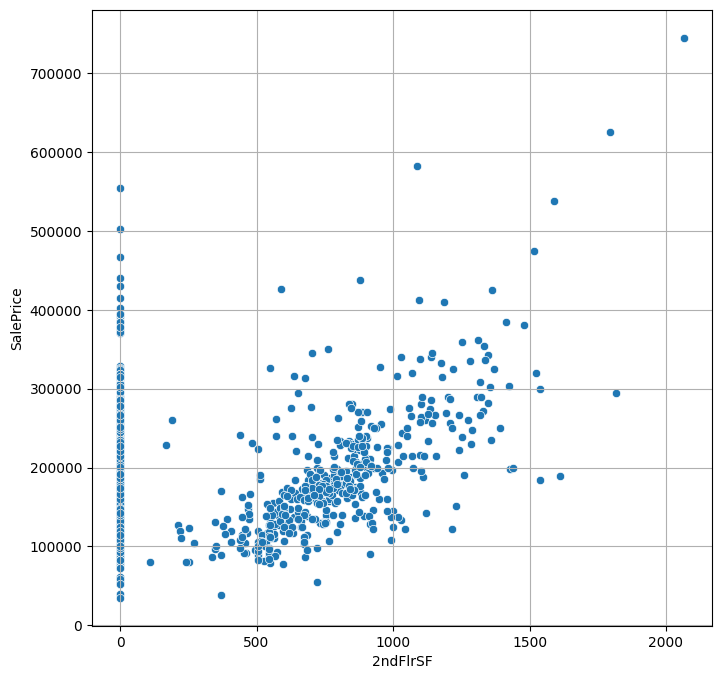

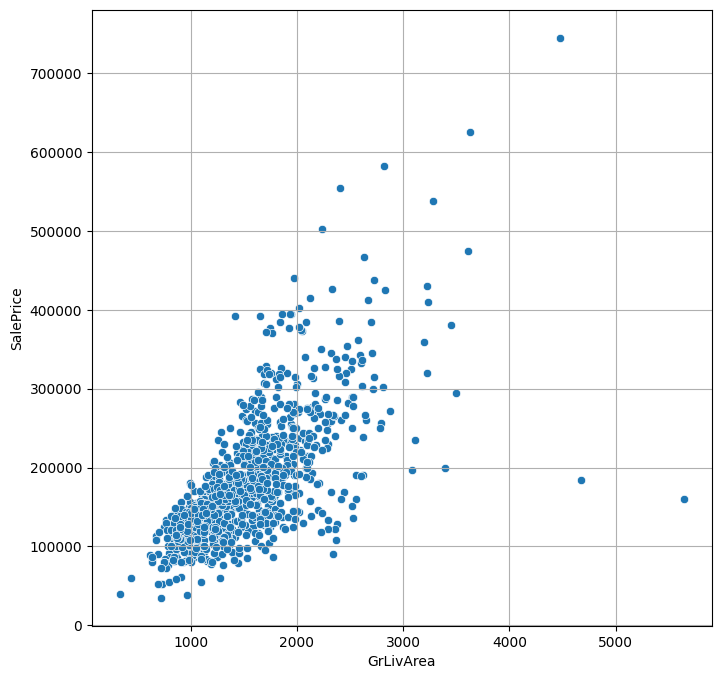

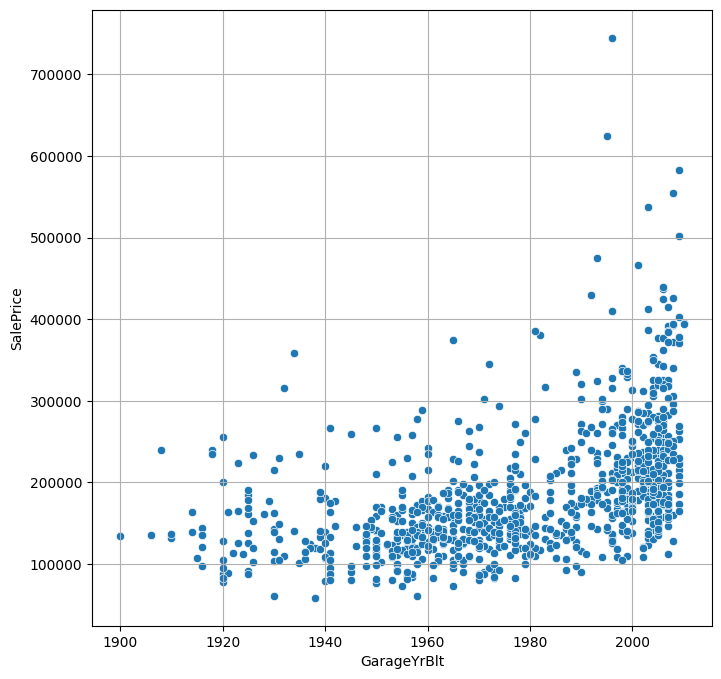

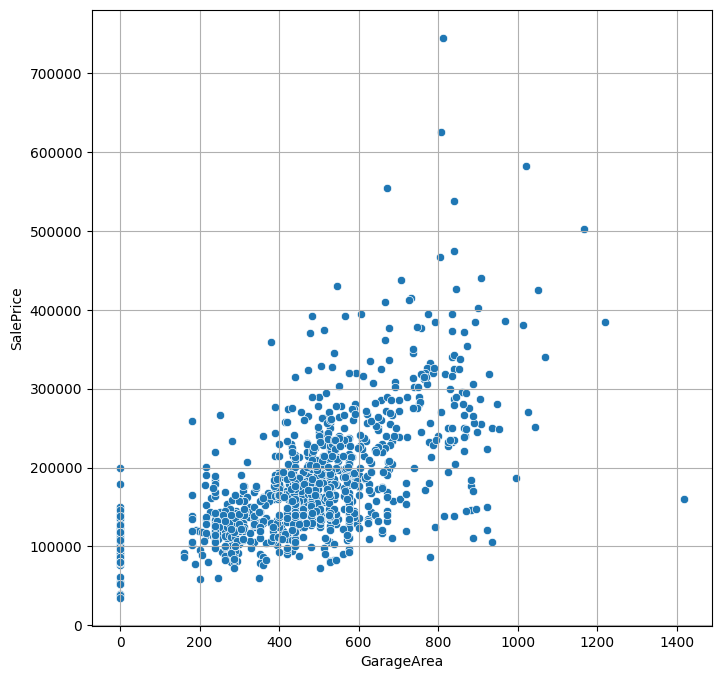

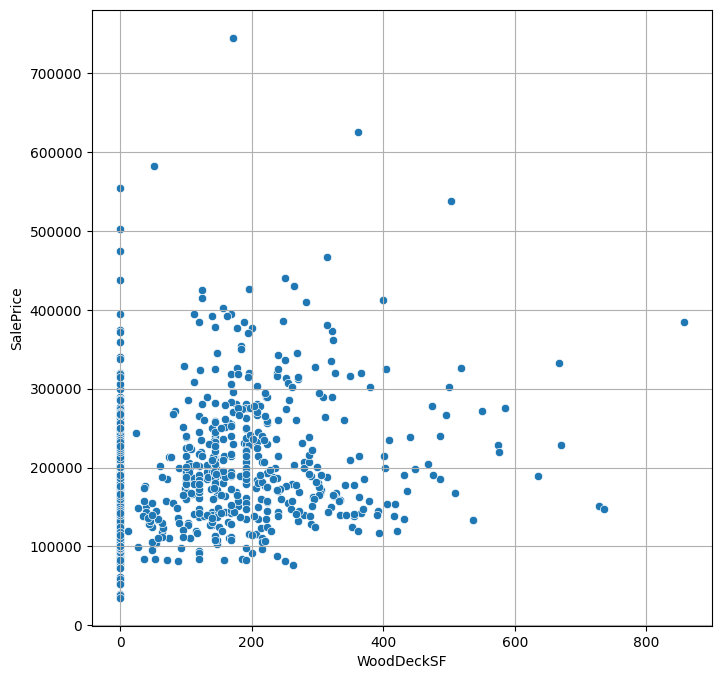

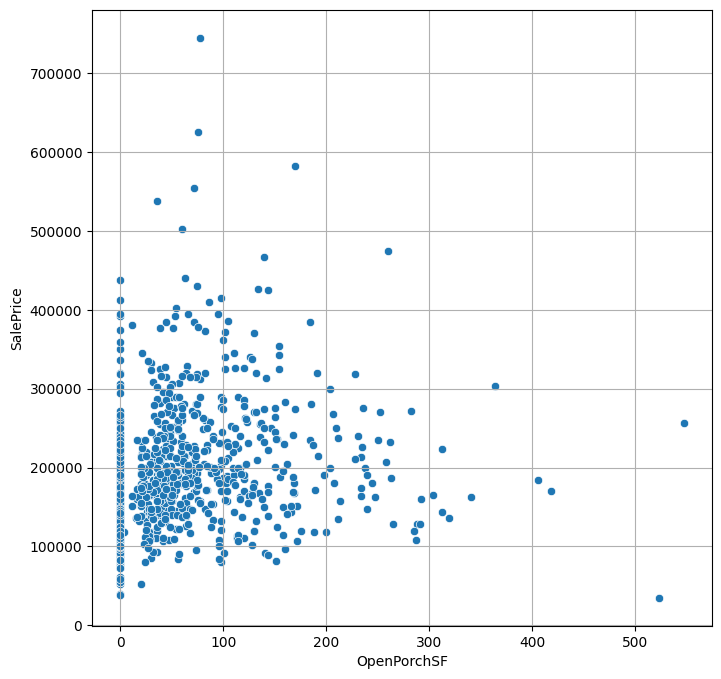

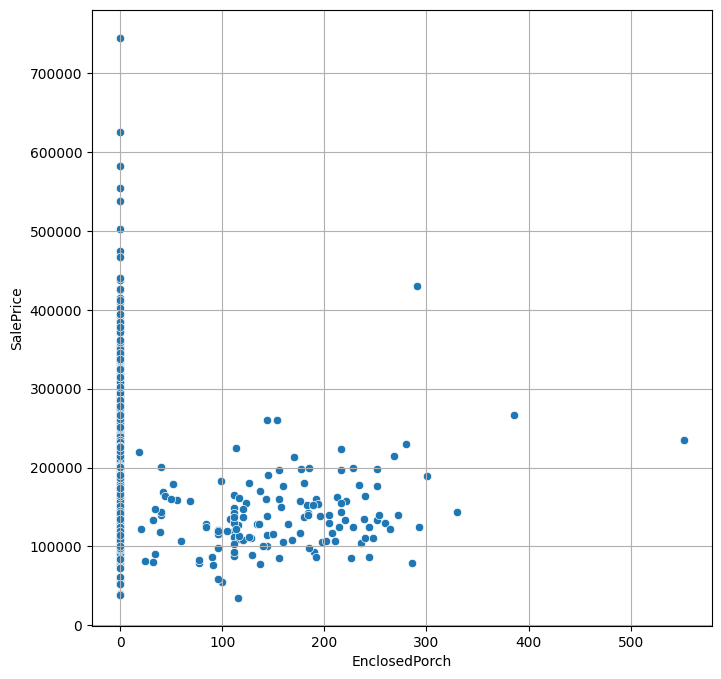

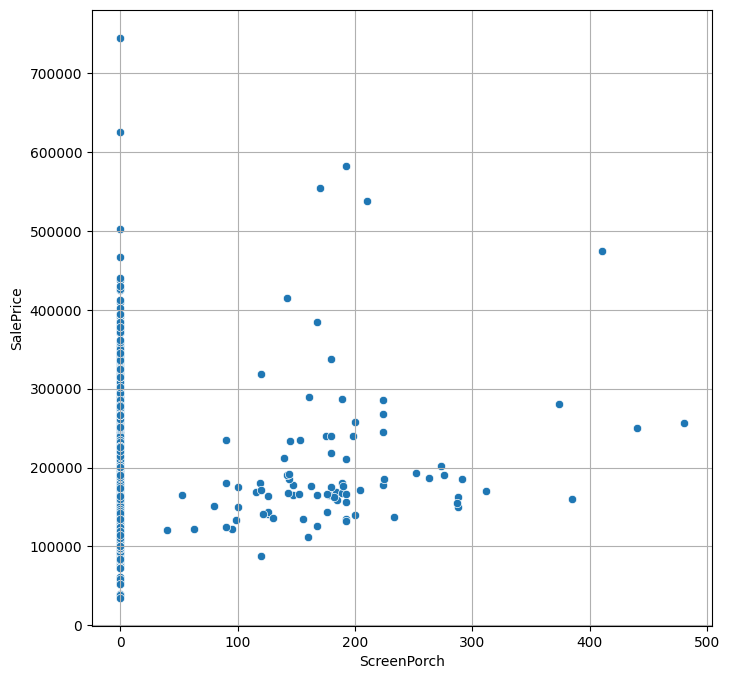

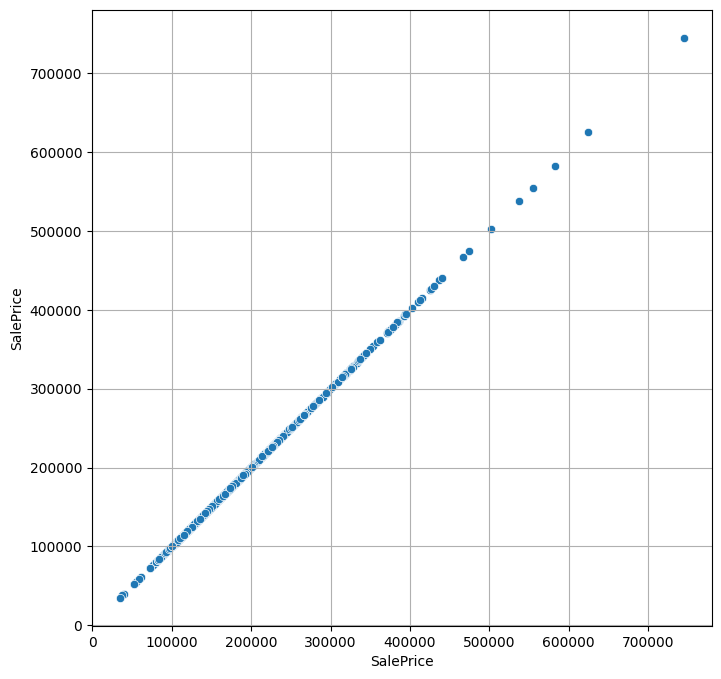

In [19]:
# Display scatter plots for numerical features having a number of unique values greater than a max_threshold.
for col in numerical_features_high_uniques:   
    plt.figure(figsize=(8, 8))    
    sns.scatterplot(data=train_set,
                    x=col,
                    y=target_name)
    plt.grid(visible=None, which='major', axis='both')  

### Correlation between numerical features

#### Correlation heatmap

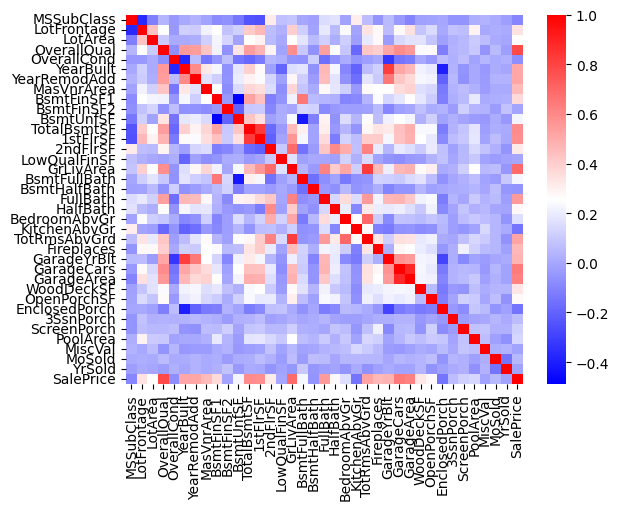

In [20]:
# Heatmap of pairwise correlations
correlation_matrix = train_set.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


#### Correlation matrix 

In [21]:
#Create a dataframe listing pair correlations and absolute correlations
correlation_matrix = train_set.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df


feature_1      feature_2  correlation  absolute_correlation
951      GarageCars     GarageArea     0.881004              0.881004
987      GarageArea     GarageCars     0.881004              0.881004
455        1stFlrSF    TotalBsmtSF     0.826623              0.826623
419     TotalBsmtSF       1stFlrSF     0.826623              0.826623
577       GrLivArea   TotRmsAbvGrd     0.822992              0.822992
...             ...            ...          ...                   ...
737        HalfBath         MoSold    -0.000306              0.000306
66      LotFrontage  EnclosedPorch     0.000299              0.000299
1074  EnclosedPorch    LotFrontage     0.000299              0.000299
171     OverallCond     Fireplaces     0.000012              0.000012
855      Fireplaces    OverallCond     0.000012              0.000012

[1332 rows x 4 columns]

In [22]:
#Create a dataframe listing correlations between a feature and the target and absolute correlations
corr_df[corr_df["feature_1"] == target_name].head(10)


feature_1     feature_2  correlation  absolute_correlation
1335  SalePrice   OverallQual     0.784720              0.784720
1347  SalePrice     GrLivArea     0.689238              0.689238
1357  SalePrice    GarageCars     0.642689              0.642689
1358  SalePrice    GarageArea     0.621937              0.621937
1343  SalePrice   TotalBsmtSF     0.590017              0.590017
1344  SalePrice      1stFlrSF     0.583132              0.583132
1350  SalePrice      FullBath     0.549164              0.549164
1354  SalePrice  TotRmsAbvGrd     0.519634              0.519634
1337  SalePrice     YearBuilt     0.512206              0.512206
1338  SalePrice  YearRemodAdd     0.512190              0.512190

#### Scatter matrix with high correlated features with the target value



In [23]:
#Retrieve a list of the most correlated features to the target (max = threshold)
high_corr_feats = 6

high_corr_feats_serie = corr_df[corr_df["feature_1"] == target_name]['feature_2']
high_corr_feats_list = high_corr_feats_serie[:high_corr_feats].values.tolist()

# Add target name to the list of high correlated features (relatively to the target)
high_corr_feats_list.append(target_name)


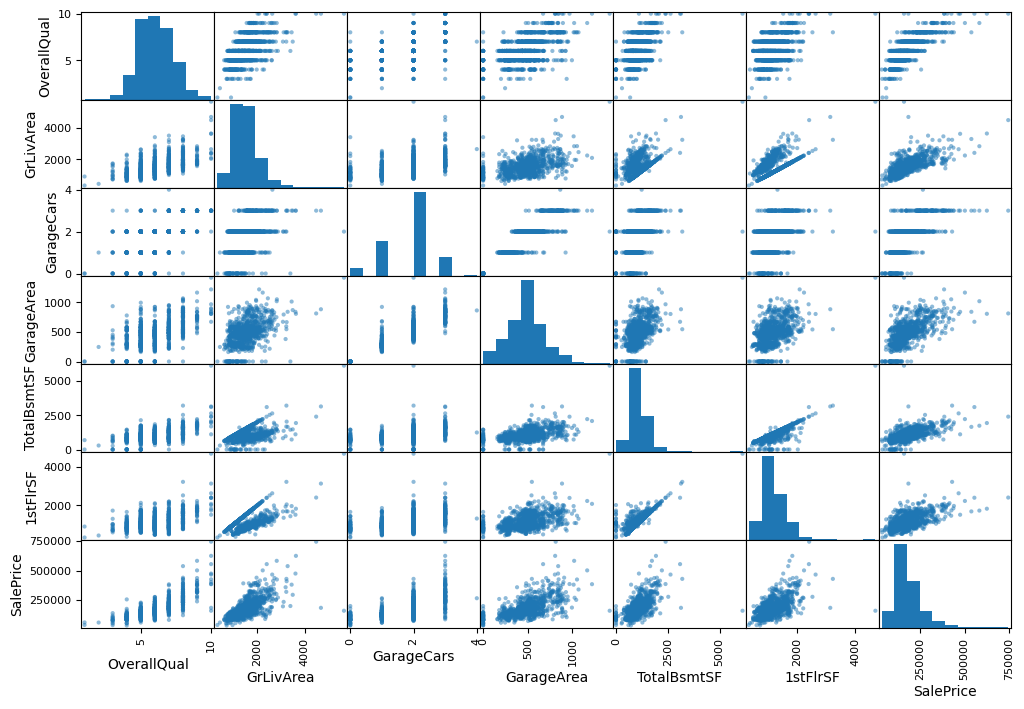

In [24]:
# Display scatter matrix for numerical
scatter_matrix(train_set[high_corr_feats_list], figsize= (12,8))
plt.show()


## Visualization : Continuous target / Categorical features

In [25]:
#Categorical Features
categorical_features = train_set.select_dtypes(exclude = 'number').columns.values.tolist()


### Bar plot

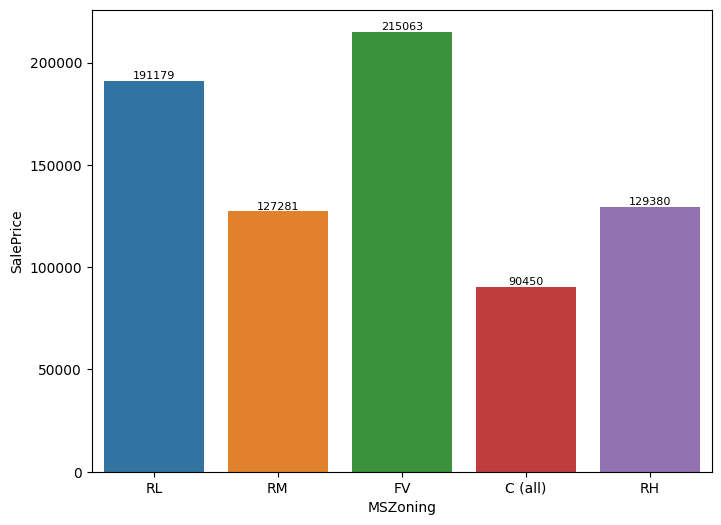

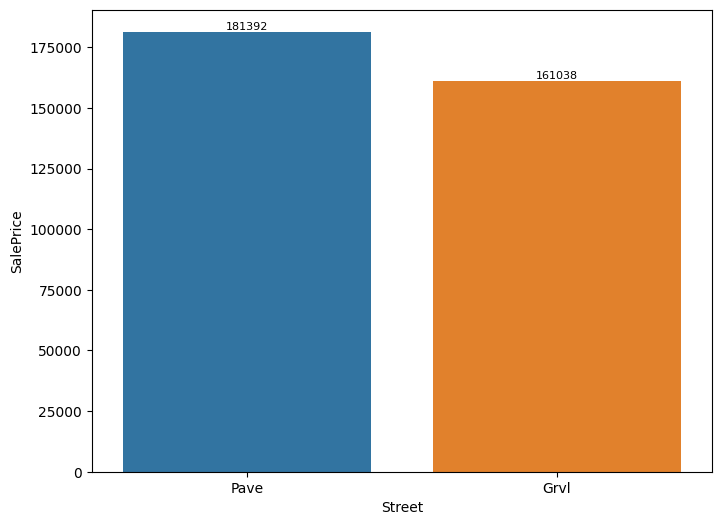

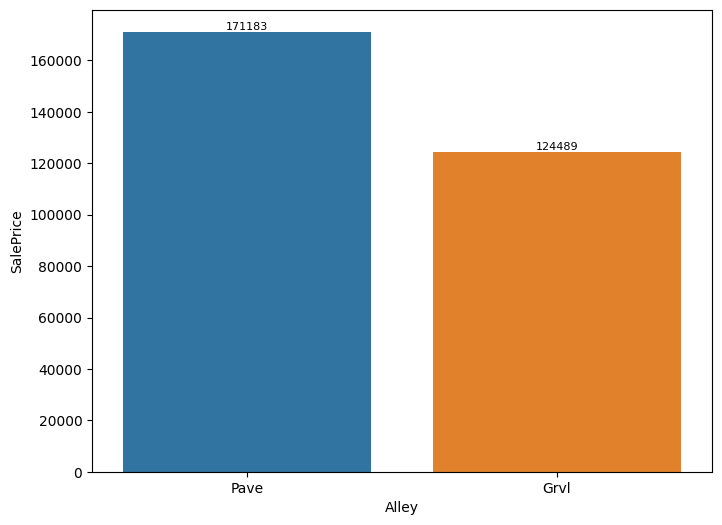

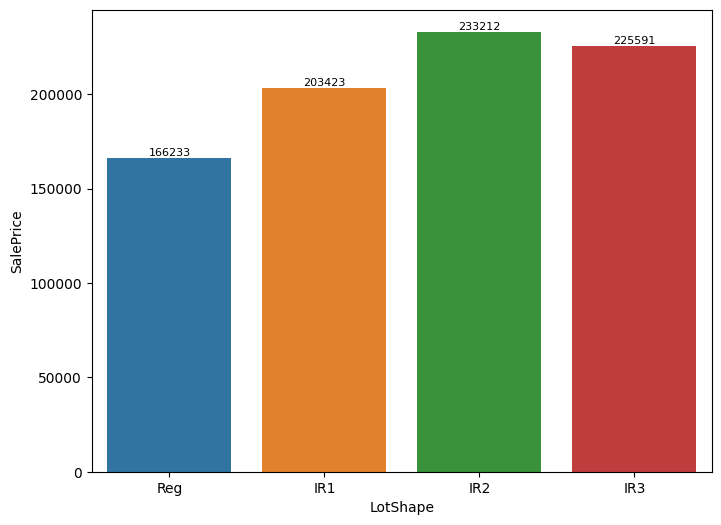

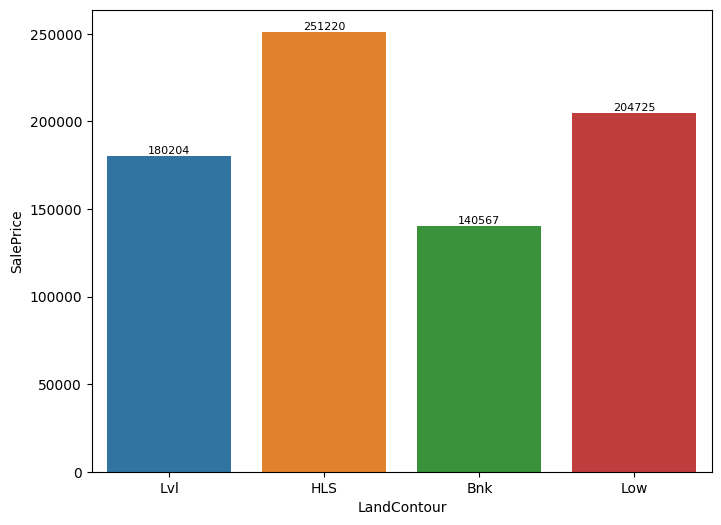

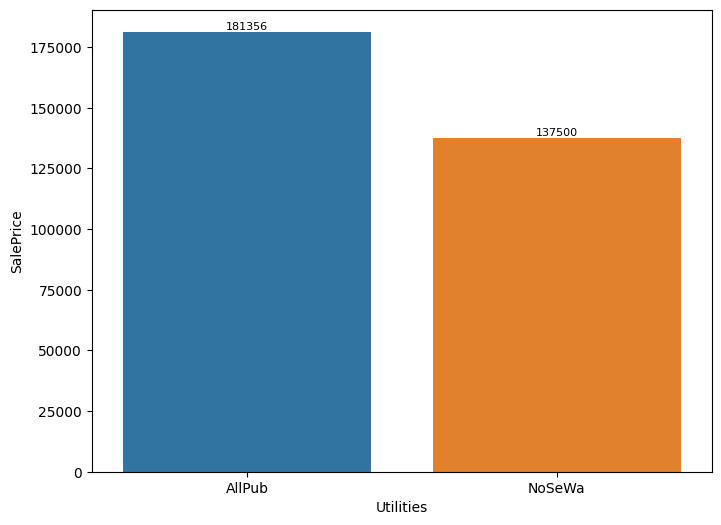

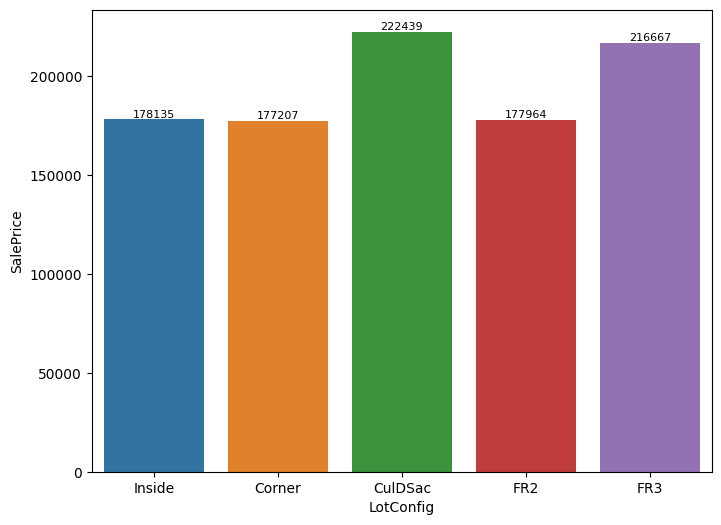

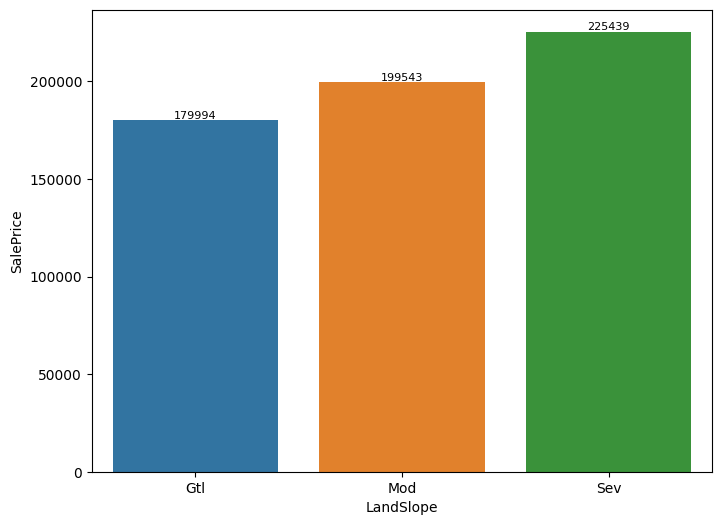

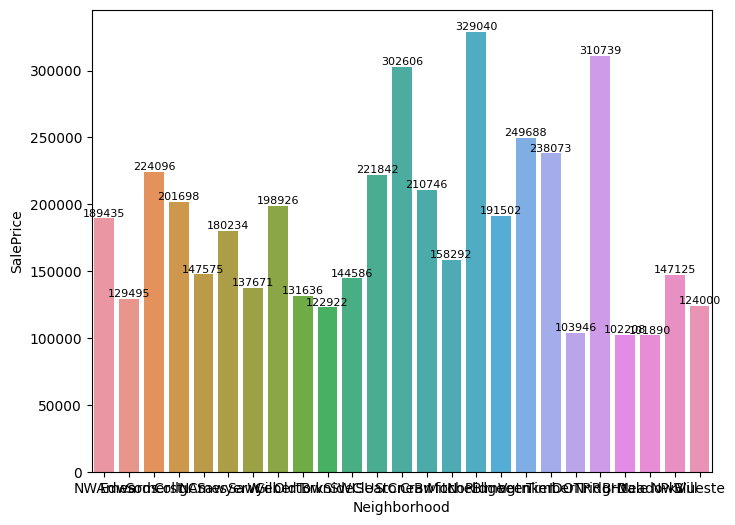

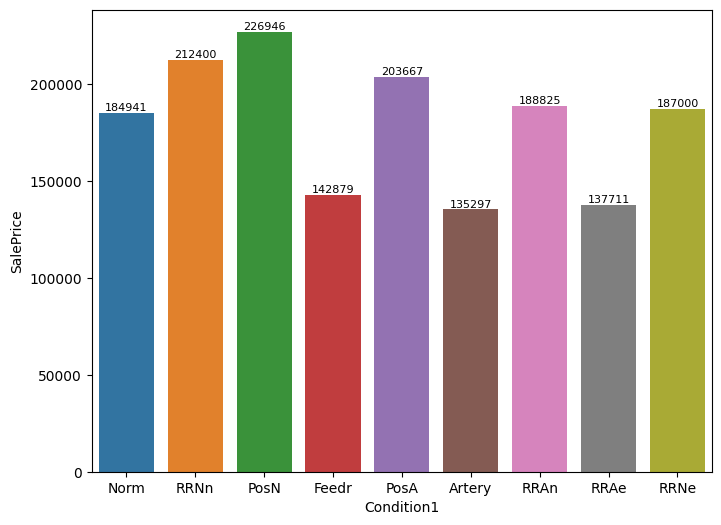

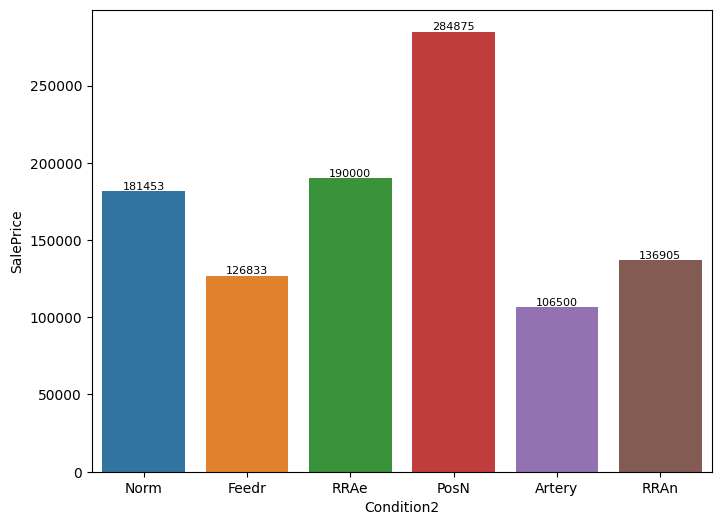

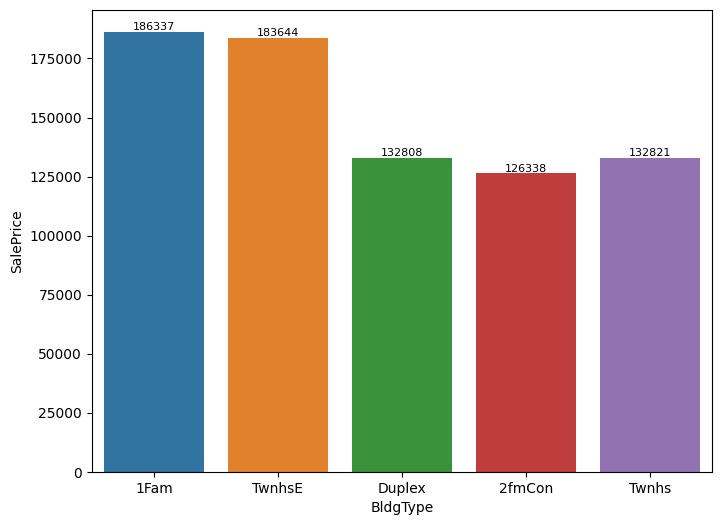

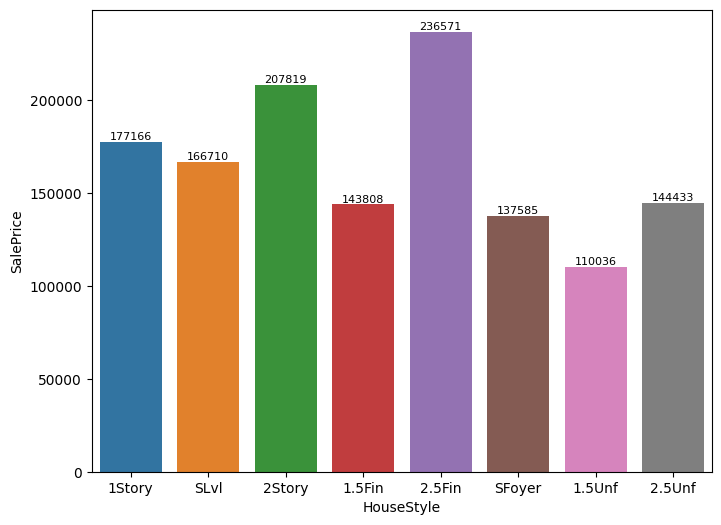

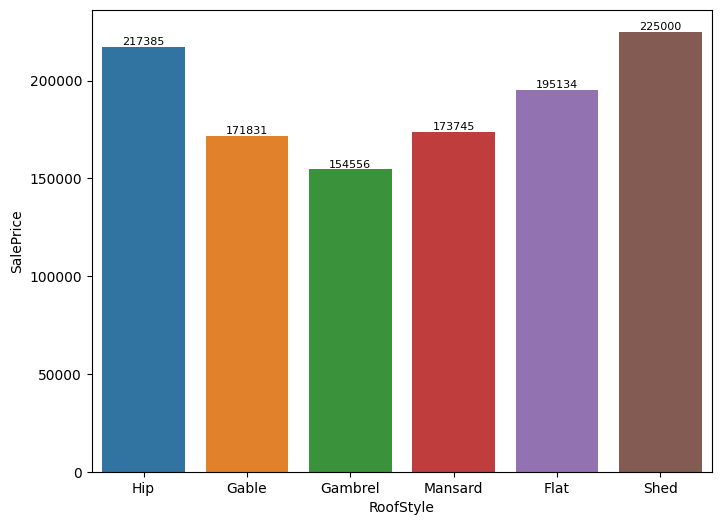

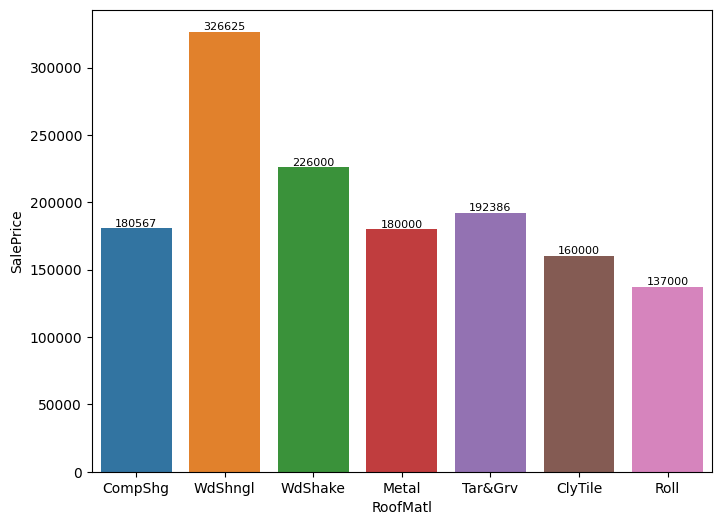

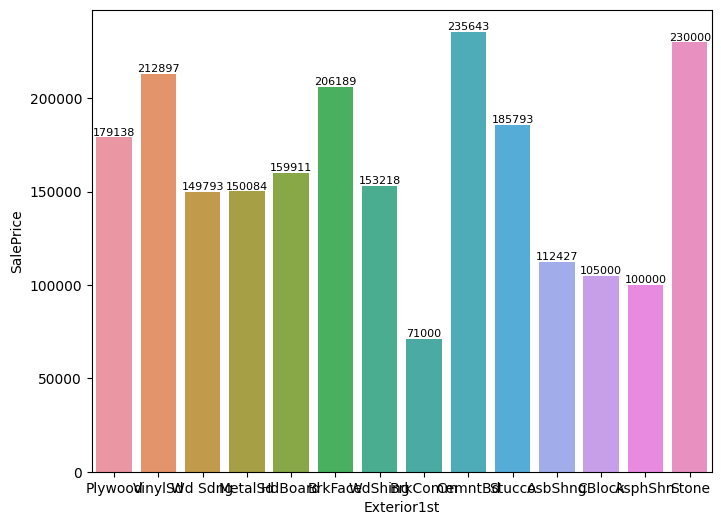

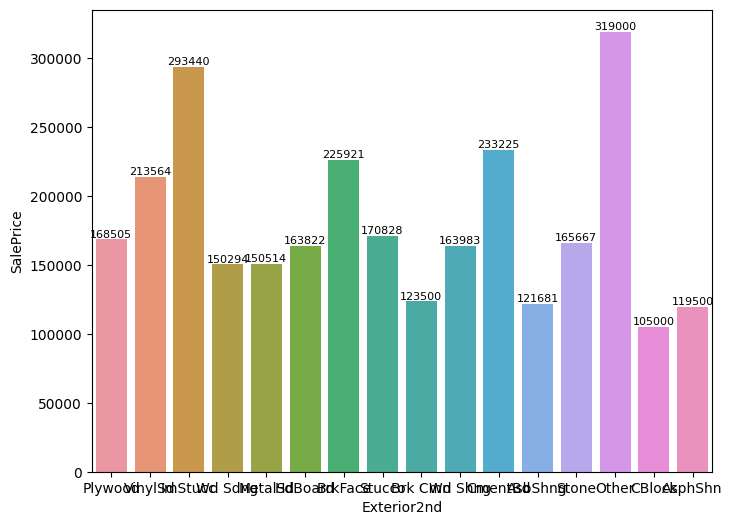

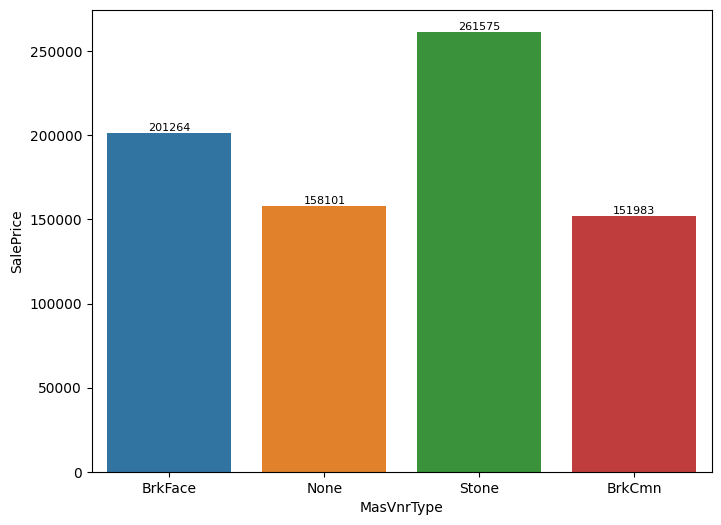

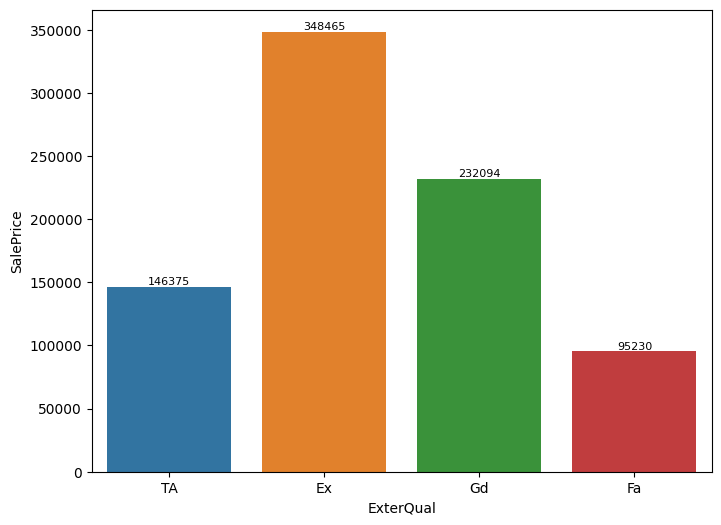

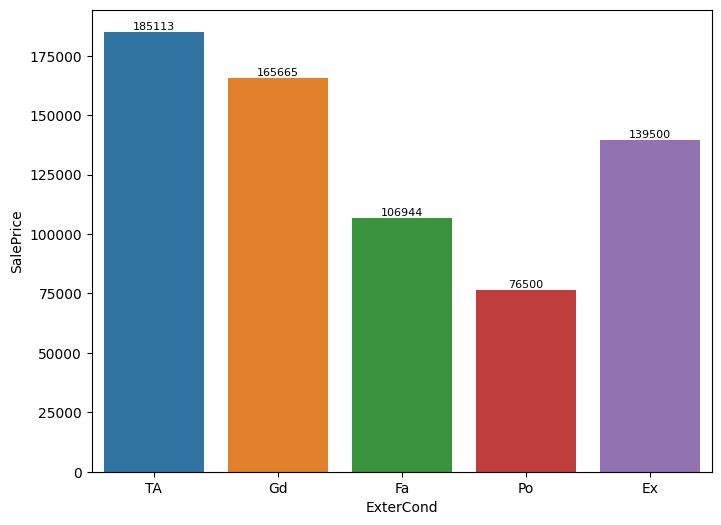

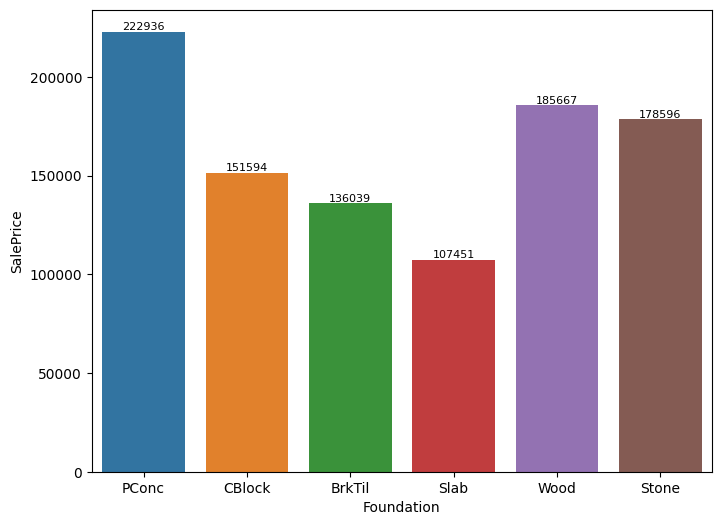

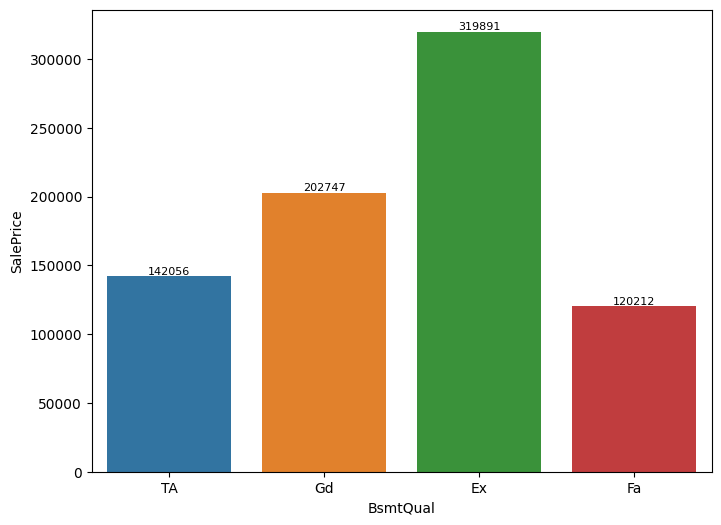

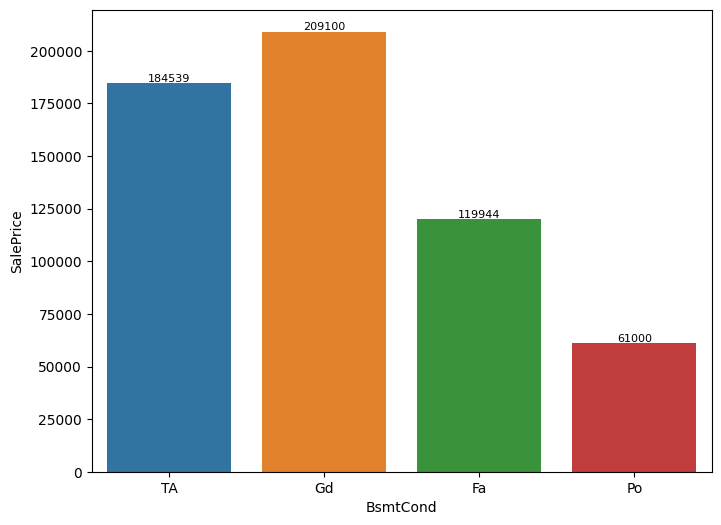

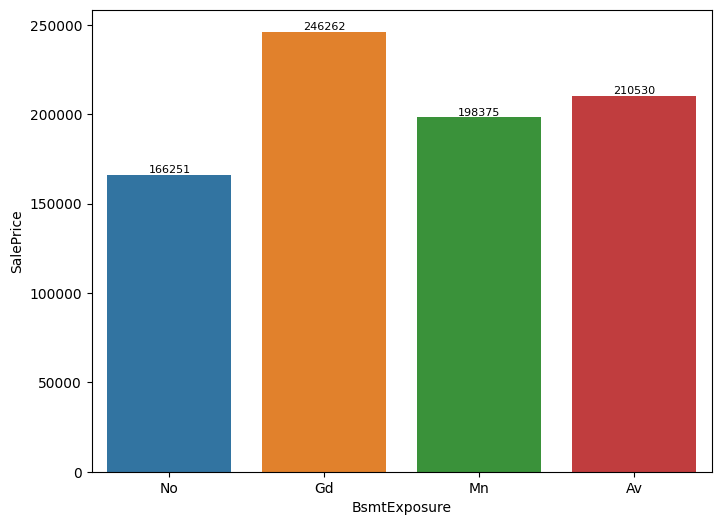

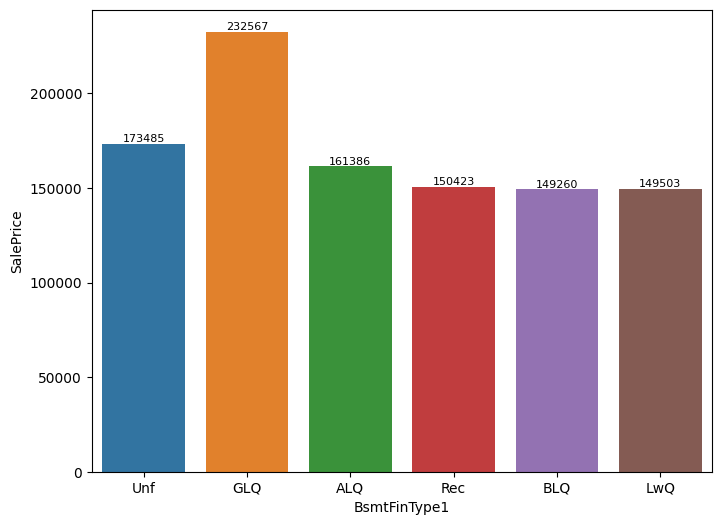

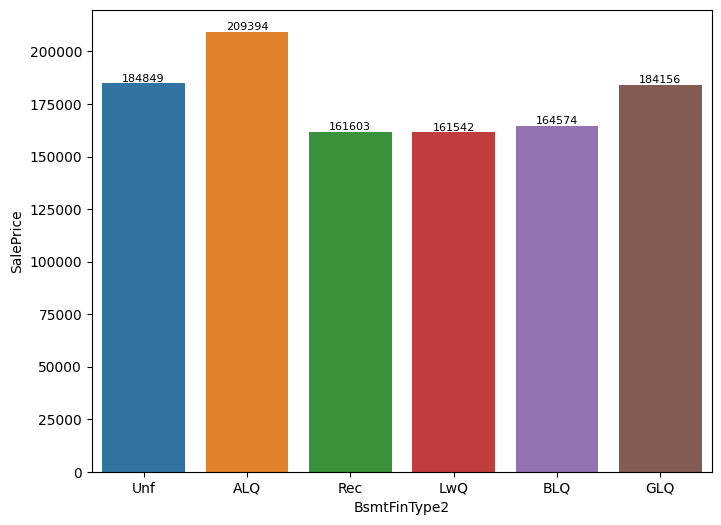

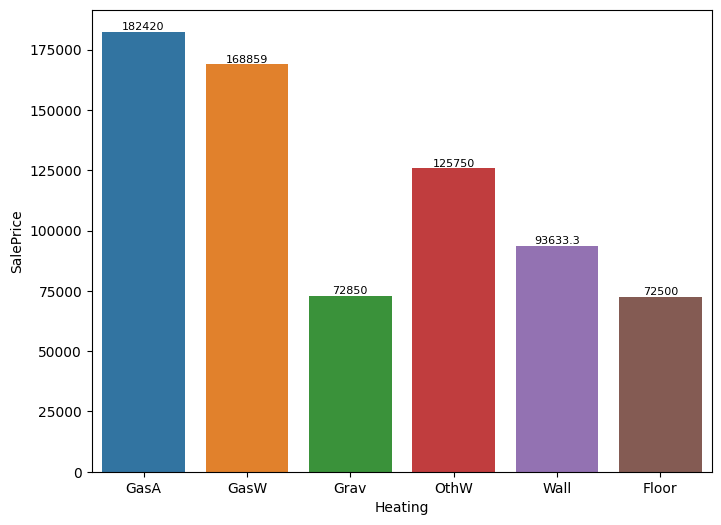

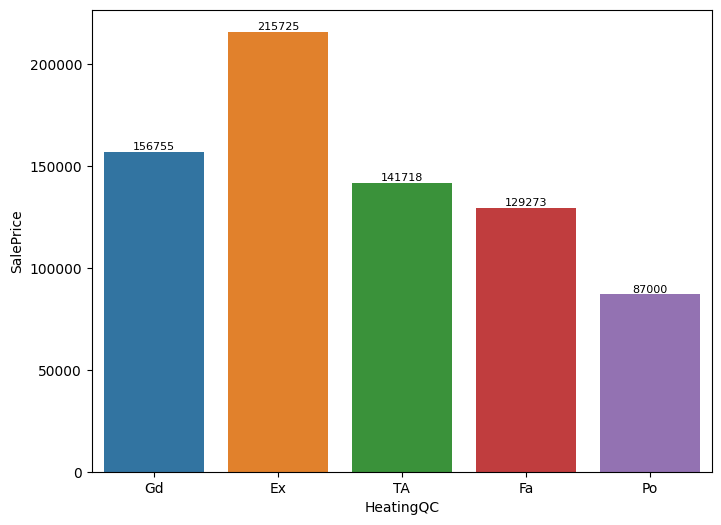

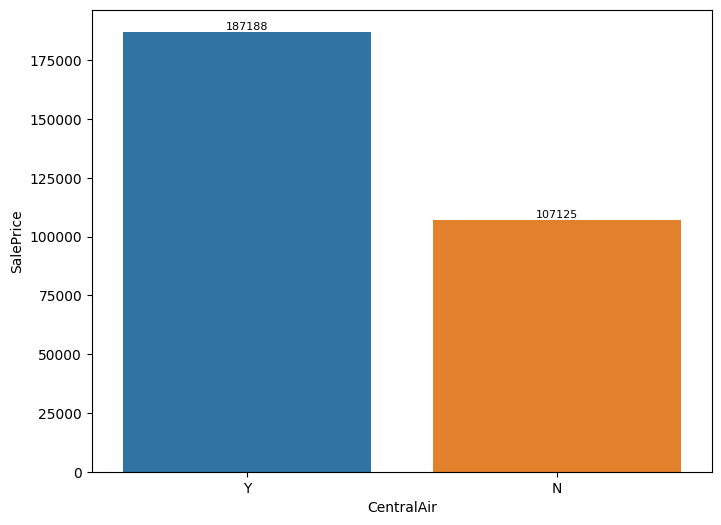

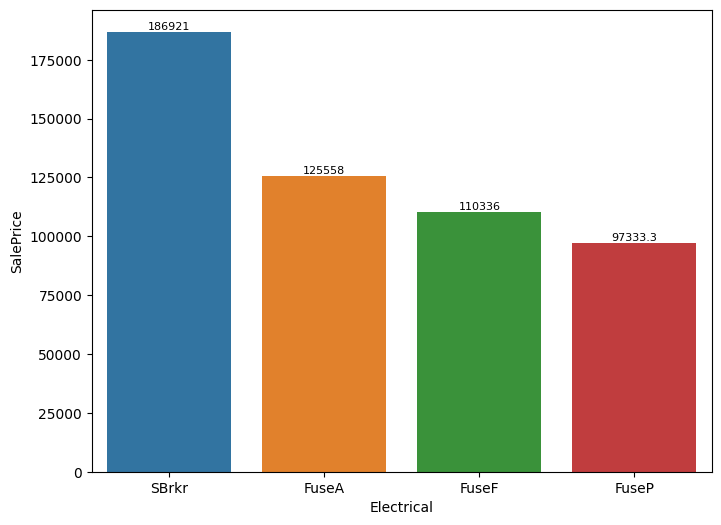

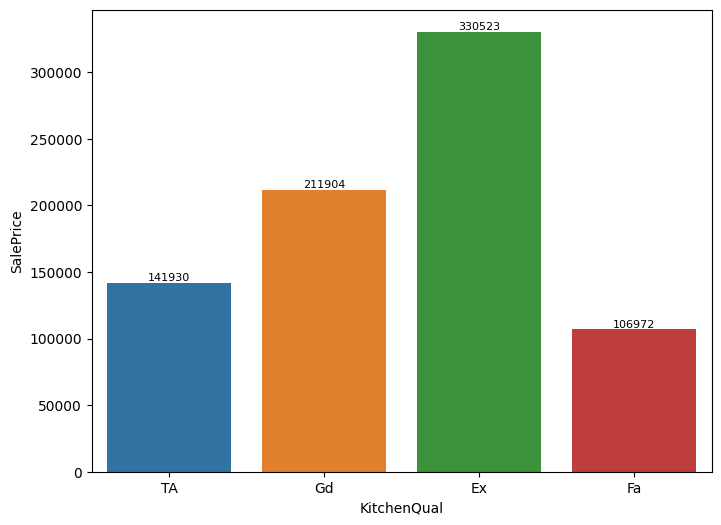

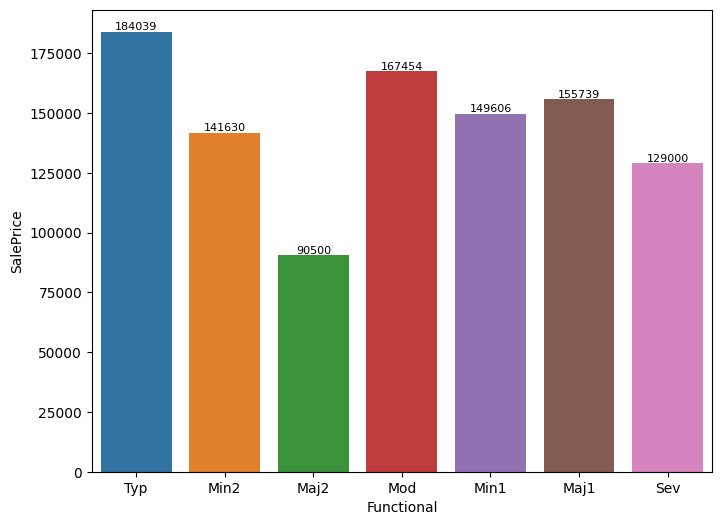

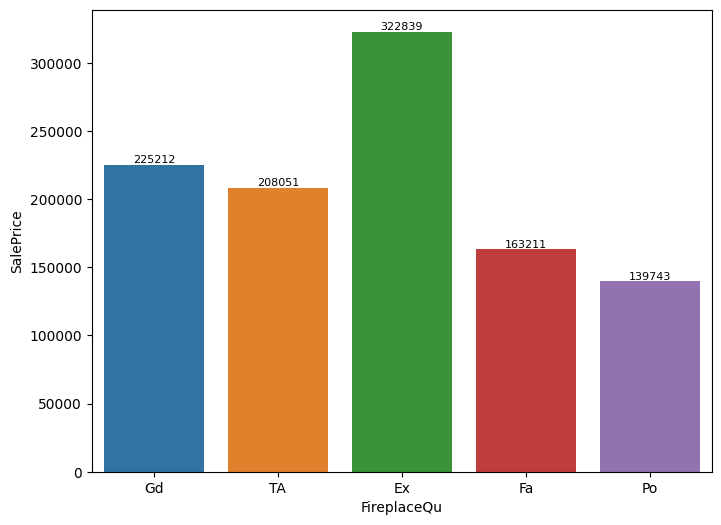

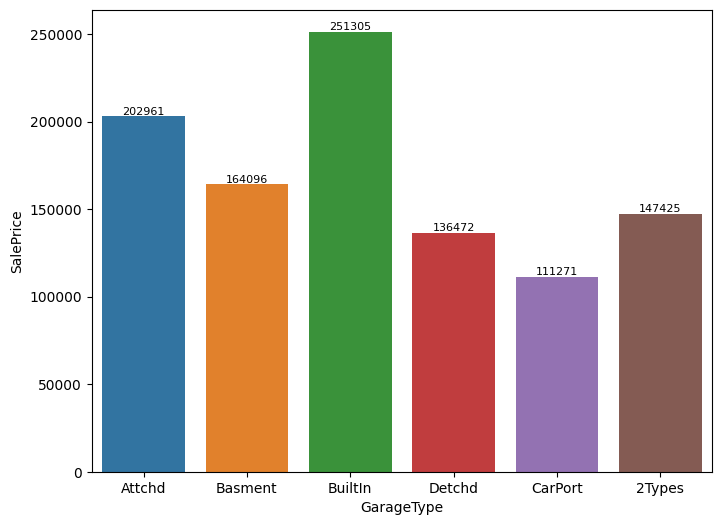

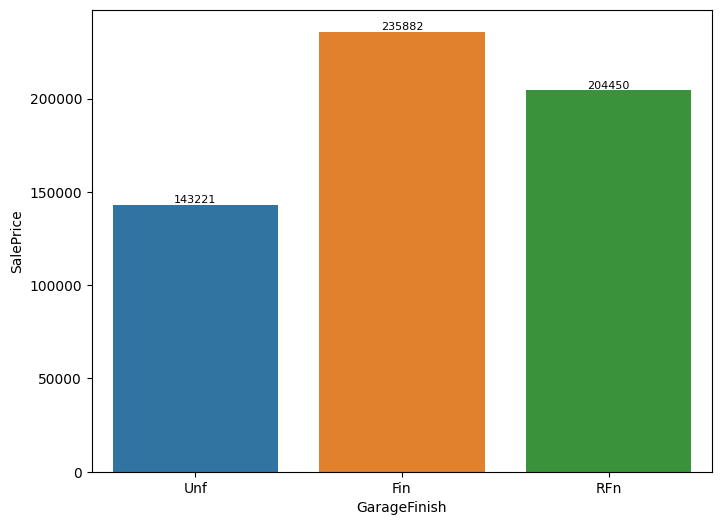

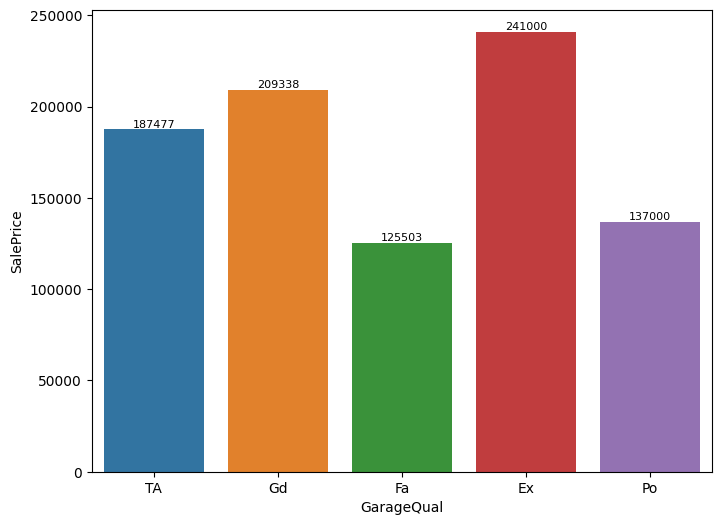

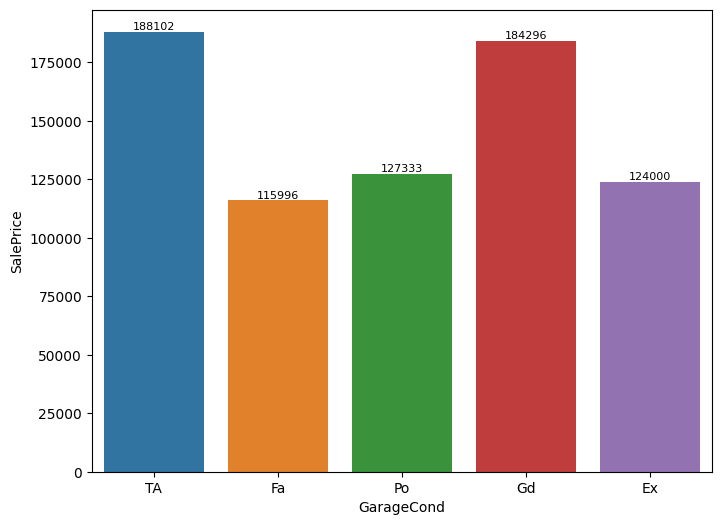

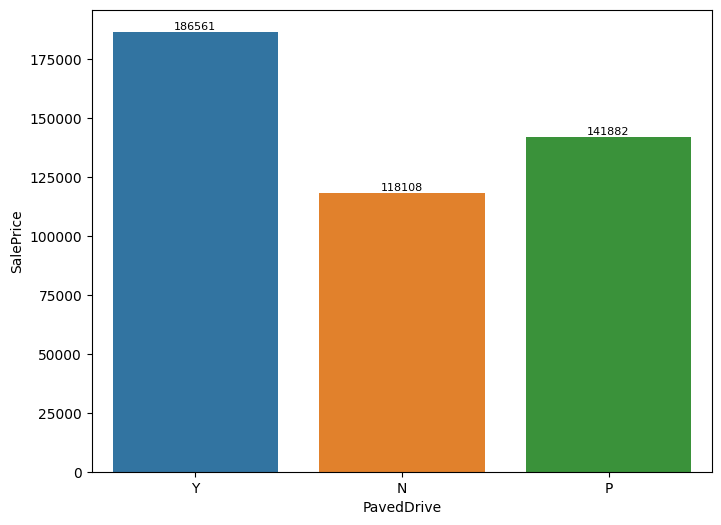

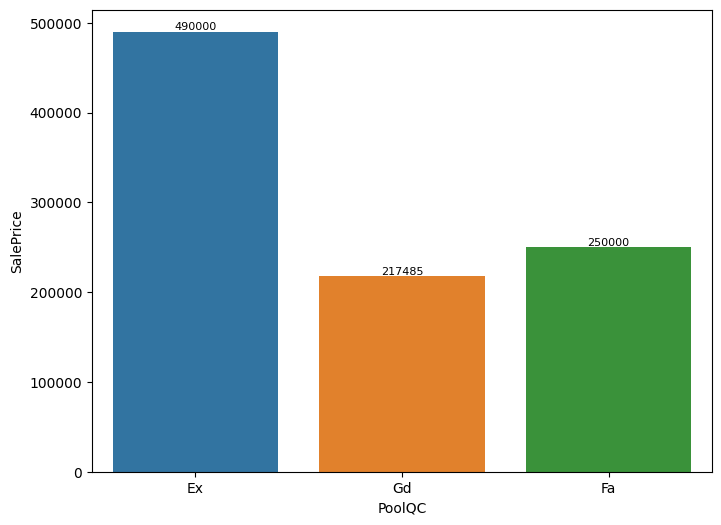

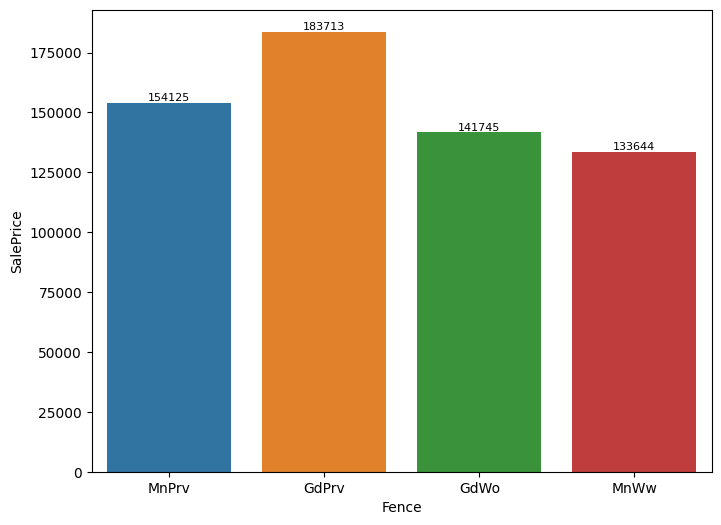

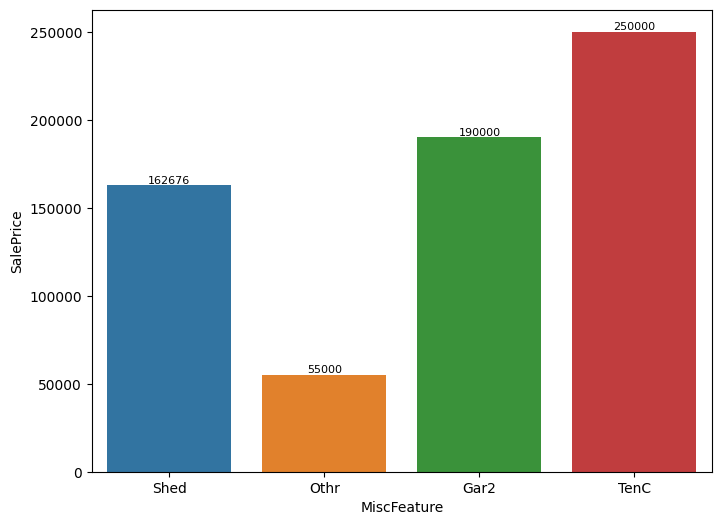

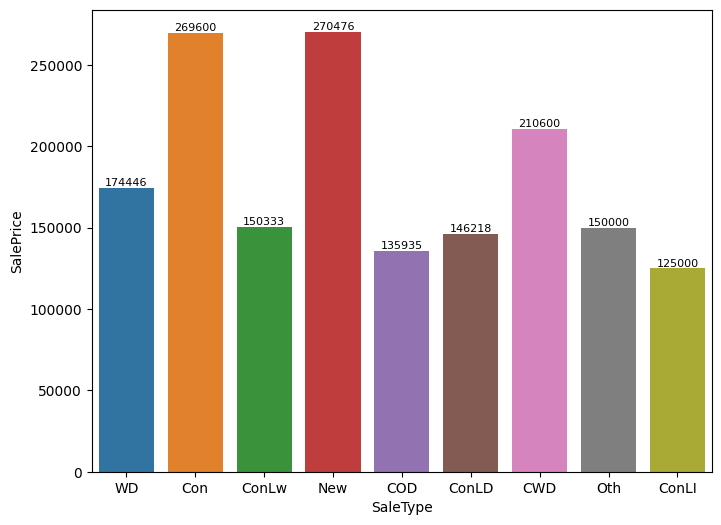

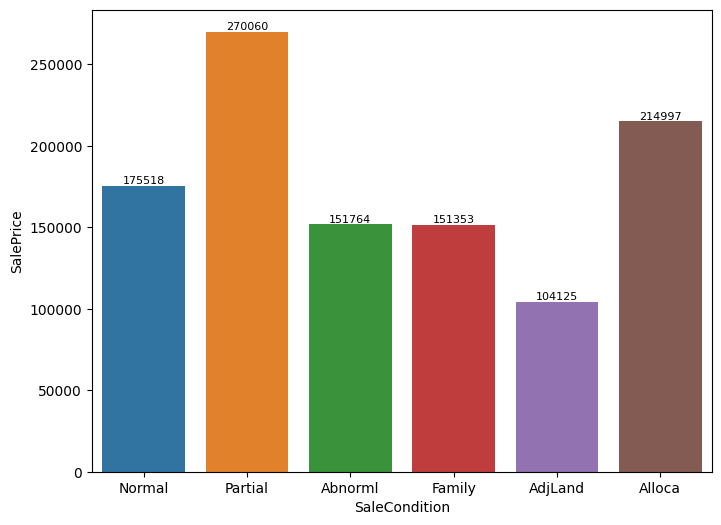

In [26]:
# Display bar plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=train_set,
                    x=col,
                    y=target_name,
                    ci = None)
    ax.bar_label(ax.containers[0], fontsize=8);

<span style="font-family:Comic Sans MS; color:red">Plot a specific barplot. Insert column name below : </span>



In [27]:
specific_column = 'Neighborhood'

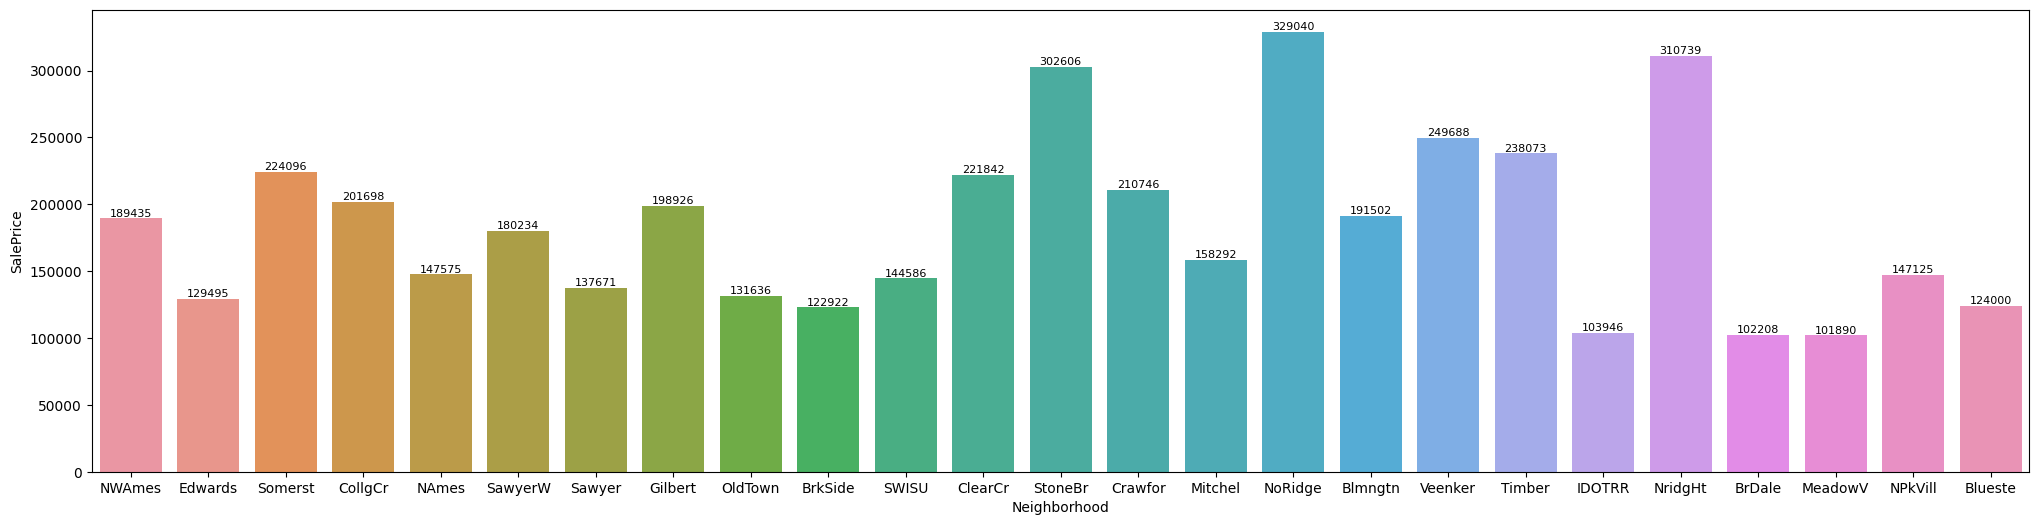

In [28]:
# Plot specific barplot
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=train_set,
                x=specific_column,
                y=target_name,
                ci = None)
ax.bar_label(ax.containers[0], fontsize=8);